In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# ---
# –ò–º–ø–æ—Ä—Ç —Å–∏—Å—Ç–µ–º–Ω—ã—Ö –∏ —É—Ç–∏–ª–∏—Ç–∞—Ä–Ω—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
import os                                           # –†–∞–±–æ—Ç–∞ —Å —Ñ–∞–π–ª–æ–≤–æ–π —Å–∏—Å—Ç–µ–º–æ–π
import time                                         # –ó–∞—Å–µ—á–∫–∏ –≤—Ä–µ–º–µ–Ω–∏
from datetime import datetime                       # –§–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫
import json                                         # –†–∞–±–æ—Ç–∞ —Å JSON-—Ñ–∞–π–ª–∞–º–∏
import re                                           # –†–µ–≥—É–ª—è—Ä–Ω—ã–µ –≤—ã—Ä–∞–∂–µ–Ω–∏—è
import joblib                                       # –°–µ—Ä–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–µ–π –∏ –æ–±—ä–µ–∫—Ç–æ–≤
from collections import defaultdict                 # –†–∞—Å—à–∏—Ä–µ–Ω–Ω—ã–µ —Å–ª–æ–≤–∞—Ä–∏
from typing import Tuple                            # –ê–Ω–Ω–æ—Ç–∞—Ü–∏–∏ —Ç–∏–ø–æ–≤

# –ò–º–ø–æ—Ä—Ç –±–∞–∑–æ–≤—ã—Ö –Ω–∞—É—á–Ω—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
import numpy as np                                  # –ú–∞—Å—Å–∏–≤—ã –∏ —á–∏—Å–ª–µ–Ω–Ω—ã–µ –æ–ø–µ—Ä–∞—Ü–∏–∏
import pandas as pd                                 # –†–∞–±–æ—Ç–∞ —Å —Ç–∞–±–ª–∏—Ü–∞–º–∏ –∏ DataFrame

# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
import matplotlib.pyplot as plt                     # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
import seaborn as sns                               # –†–∞—Å—à–∏—Ä–µ–Ω–Ω—ã–µ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏

# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫ –¥–ª—è –≤–µ–±-—Å–∫—Ä–∞–ø–∏–Ω–≥–∞
import requests                                     # HTTP-–∑–∞–ø—Ä–æ—Å—ã
from bs4 import BeautifulSoup                       # –ü–∞—Ä—Å–∏–Ω–≥ HTML

# –ò–º–ø–æ—Ä—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–≤
from scipy.stats import pearsonr                    # –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

# –ò–º–ø–æ—Ä—Ç –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–≤ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è (sklearn)
from sklearn.model_selection import train_test_split, KFold                     # –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è
from sklearn.ensemble import RandomForestRegressor                              # –ú–æ–¥–µ–ª—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, MultiLabelBinarizer  # –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ
from sklearn.feature_selection import chi2                                      # –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
from sklearn.feature_extraction.text import TfidfVectorizer                     # –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
from sklearn.feature_extraction import text                                     # –°—Ç–æ–ø-—Å–ª–æ–≤–∞ –∏ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ —É—Ç–∏–ª–∏—Ç—ã
from sklearn.cluster import KMeans                                              # –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error  # –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞
from sklearn import metrics                                                     # –û–±—â–∏–µ –º–µ—Ç—Ä–∏–∫–∏
from statsmodels.stats.outliers_influence import variance_inflation_factor      # VIF –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ–ª—å

from sklearn.feature_selection import VarianceThreshold                         # –ü–æ—Ä–æ–≥–æ–≤—ã–π VIF
from sklearn.preprocessing import StandardScaler                                # –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
import shap                                                                     # –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å –º–æ–¥–µ–ª–µ–π


# –ò–º–ø–æ—Ä—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞
from category_encoders import TargetEncoder  # –¶–µ–ª–µ–≤–æ–π –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

# –ò–º–ø–æ—Ä—Ç –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–≤ –∞–Ω–∞–ª–∏–∑–∞ —Ç–µ–∫—Å—Ç–∞
from textblob import TextBlob  # –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ –∏ –∞–Ω–∞–ª–∏–∑ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏

# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫ –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å PyTorch
import torch                                                        # –û—Å–Ω–æ–≤–Ω–æ–π —Ñ—Ä–µ–π–º–≤–æ—Ä–∫
import torch.nn as nn                                               # –ù–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–ª–æ–∏ –∏ —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏
from torch.utils.data import TensorDataset, DataLoader              # –û–±—ë—Ä—Ç–∫–∏ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –±–∞—Ç—á–µ–π
from torchmetrics.regression import MeanAbsolutePercentageError     # –ú–µ—Ç—Ä–∏–∫–∞ MAPE –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏


In [4]:
# Define a basic feedforward regression model
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø—Ä–æ—Å—Ç—É—é –Ω–µ–π—Ä–æ—Å–µ—Ç—å –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
class HotelRegressor(nn.Module):
    def __init__(self, input_dim):
        super(HotelRegressor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)


## –¶–µ–ª—å –ø—Ä–æ–µ–∫—Ç–∞

–ö–æ–º–ø–∞–Ω–∏—è —Å—Ç–∞–ª–∫–∏–≤–∞–µ—Ç—Å—è —Å –ø—Ä–æ–±–ª–µ–º–æ–π –Ω–µ–¥–æ–±—Ä–æ—Å–æ–≤–µ—Å—Ç–Ω—ã—Ö –æ—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω–æ –∑–∞–≤—ã—à–∞—é—Ç —Å–≤–æ–∏ —Ä–µ–π—Ç–∏–Ω–≥–∏. –ß—Ç–æ–±—ã —Ä–µ—à–∏—Ç—å —ç—Ç—É –∑–∞–¥–∞—á—É, —Ü–µ–ª—å—é –ø—Ä–æ–µ–∫—Ç–∞ —è–≤–ª—è–µ—Ç—Å—è —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –æ—Ü–µ–Ω–∏–≤–∞—Ç—å —Ä–µ–π—Ç–∏–Ω–≥ –æ—Ç–µ–ª—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–æ—Å—Ç—É–ø–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ï—Å–ª–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –æ—Ç–∫–ª–æ–Ω—è—é—Ç—Å—è –æ—Ç —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö —Ä–µ–π—Ç–∏–Ω–≥–æ–≤, —ç—Ç–æ –º–æ–∂–µ—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω–æ–º –ø–æ–≤–µ–¥–µ–Ω–∏–∏. –¢–∞–∫–∏–µ –æ—Ç–µ–ª–∏ —Å–ª–µ–¥—É–µ—Ç –ø–æ–º–µ—á–∞—Ç—å –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —Ä–∞—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è.

**–ü—Ä–∏–º–µ—á–∞–Ω–∏–µ**: –ü—Ä–æ–µ–∫—Ç —è–≤–ª—è–µ—Ç—Å—è —É—á–µ–±–Ω—ã–º –≤—Ö–æ–¥—è—â–∏–º –≤ –ø—Ä–æ–≥—Ä–∞–º–º—É SkillFactory DS. –ü–æ—ç—Ç–æ–º—É –∞–∫—Ü–µ–Ω—Ç –ø—Ä–æ–µ–∫—Ç–∞ —Å–º–µ—â–µ–Ω –æ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏–≤–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏
–∫ —Å–∞–º–æ–º—É –ø—Ä–æ—Ü–µ—Å—Å—É –µ–µ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –∏ –ø—Ä–∏–º–µ–Ω—è–µ–º—ã—Ö –¥–ª—è —ç—Ç–æ–≥–æ –º–µ—Ç–æ–¥–æ–≤.

**–û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è**:
–¢–∞–∫ –∫–∞–∫ –ø—Ä–æ–µ–∫—Ç —É—á–µ–±–Ω—ã–π —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∞ –º–æ–¥–µ–ª–∏ –±—ã–ª–∞ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∞ –Ω–∞ —Å—Ç–∞–¥–∏–∏ –µ–µ –æ—Ç–ª–∞–¥–∫–∏ –∏ –¥–æ–≤–µ–¥–µ–Ω–∏—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –µ–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏–≤–Ω–æ—Å—Ç–∏ –¥–æ –≤—ã—Å–æ–∫–æ–π —Å—Ç–µ–ø–µ–Ω–∏.
–í–æ–∑–º–æ–∂–Ω—ã–µ –º–µ—Ç–æ–¥—ã —É–ª—É—á—â–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ —É–ø–æ–º—è–Ω—É—Ç—ã –≤ —Ä–∞–∑–¥–µ–ª–µ 13 README.md.


## –ü–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö hotels

–ü—Ä–µ–∂–¥–µ —á–µ–º –ø—Ä–∏—Å—Ç—É–ø–∞—Ç—å –∫ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π, –≤–∞–∂–Ω–æ –ø–æ–Ω—è—Ç—å —Å—Ç—Ä—É–∫—Ç—É—Ä—É –∏ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö. –ù–∏–∂–µ –ø—Ä–∏–≤–µ–¥–µ–Ω–æ –∫—Ä–∞—Ç–∫–æ–µ —Ä–µ–∑—é–º–µ –ø–µ—Ä–≤–∏—á–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞:

- **–û–±–∑–æ—Ä —Å—Ö–µ–º—ã**: –ù–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –æ–ø–∏—Å—ã–≤–∞—é—â–∏—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –æ—Ç–µ–ª–µ–π, –º–µ—Ç—Ä–∏–∫–∏ –æ—Ç–∑—ã–≤–æ–≤, –∞ —Ç–∞–∫–∂–µ, –≤–æ–∑–º–æ–∂–Ω–æ, –∞—Ç—Ä–∏–±—É—Ç—ã, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ–º –∏–ª–∏ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ–º. –ö–∞–∂–¥–∞—è —Å—Ç—Ä–æ–∫–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ –ø–æ –æ–¥–Ω–æ–º—É –æ—Ç–µ–ª—é.

- **–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö**: –í –Ω–∞–±–æ—Ä–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –∫–∞–∫ —á–∏—Å–ª–æ–≤—ã–µ (int64, float64), —Ç–∞–∫ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ (object) —Å—Ç–æ–ª–±—Ü—ã. –ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–∞–ø—Ä—è–º—É—é –≤ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–∏, –∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ ‚Äî —Ç—Ä–µ–±—É—é—Ç –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è.

- **–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–æ–ª–±—Ü–æ–≤**: –ù–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –≤–∫–ª—é—á–∞–µ—Ç *N* —Å—Ç–æ–ª–±—Ü–æ–≤ (–∑–∞–º–µ–Ω–∏—Ç–µ –Ω–∞ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–µ —á–∏—Å–ª–æ), –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è—è –±–æ–≥–∞—Ç–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π.

- **–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞** (`describe()`): –°–≤–æ–¥–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ—Ü–µ–Ω–∏—Ç—å —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–µ —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏ –∏ —Ä–∞–∑–±—Ä–æ—Å —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
  - –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –ø–æ–º–æ–≥–∞—é—Ç –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
  - –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–µ –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤—ã—è–≤–ª—è—é—Ç –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã.
  - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π (`count`) –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ø–æ–ª–Ω–æ—Ç—É –¥–∞–Ω–Ω—ã—Ö –∏–ª–∏ –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ.

–≠—Ç–æ –±–∞–∑–æ–≤–æ–µ –ø–æ–Ω–∏–º–∞–Ω–∏–µ –Ω–∞–ø—Ä–∞–≤–ª—è–µ—Ç –¥–∞–ª—å–Ω–µ–π—à—É—é —Ä–∞–±–æ—Ç—É –ø–æ —Å–æ–∑–¥–∞–Ω–∏—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –≤—ã–±–æ—Ä—É –º–æ–¥–µ–ª–∏ –∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏.



In [3]:
hotels_origin = pd.read_csv('data/hotels.csv')
hotels = hotels_origin.copy()
hotels.head(3)

hotel_address  \
0  Stratton Street Mayfair Westminster Borough Lo...   
1  130 134 Southampton Row Camden London WC1B 5AF...   
2   151 bis Rue de Rennes 6th arr 75006 Paris France   

   additional_number_of_scoring review_date  average_score  \
0                           581   2/19/2016            8.4   
1                           299   1/12/2017            8.3   
2                            32  10/18/2016            8.9   

                          hotel_name reviewer_nationality  \
0                 The May Fair Hotel      United Kingdom    
1    Mercure London Bloomsbury Hotel      United Kingdom    
2  Legend Saint Germain by Elegancia               China    

       negative_review  review_total_negative_word_counts  \
0             Leaving                                   3   
1       poor breakfast                                  3   
2   No kettle in room                                   6   

   total_number_of_reviews      positive_review  \
0                     1994   Staff were amazing   
1                     1361             location   
2                      406          No Positive   

   review_total_positive_word_counts  \
0                                  4   
1                                  2   
2                                  0   

   total_number_of_reviews_reviewer_has_given  reviewer_score  \
0                                           7            10.0   
1                                          14             6.3   
2                                          14             7.5   

                                                tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...           531 day   
1  [' Business trip ', ' Couple ', ' Standard Dou...           203 day   
2  [' Leisure trip ', ' Solo traveler ', ' Modern...           289 day   

         lat       lng  
0  51.507894 -0.143671  
1  51.521009 -0.123097  
2  48.845377  2.325643

In [4]:
display(hotels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

None

In [5]:
display(hotels.describe(include = 'all').T)

count  unique  \
hotel_address                                 386803    1493   
additional_number_of_scoring                386803.0     NaN   
review_date                                   386803     731   
average_score                               386803.0     NaN   
hotel_name                                    386803    1492   
reviewer_nationality                          386803     225   
negative_review                               386803  248828   
review_total_negative_word_counts           386803.0     NaN   
total_number_of_reviews                     386803.0     NaN   
positive_review                               386803  311737   
review_total_positive_word_counts           386803.0     NaN   
total_number_of_reviews_reviewer_has_given  386803.0     NaN   
reviewer_score                              386803.0     NaN   
tags                                          386803   47135   
days_since_review                             386803     731   
lat                                         384355.0     NaN   
lng                                         384355.0     NaN   

                                                                                          top  \
hotel_address                               163 Marsh Wall Docklands Tower Hamlets London ...   
additional_number_of_scoring                                                              NaN   
review_date                                                                          8/2/2017   
average_score                                                                             NaN   
hotel_name                                         Britannia International Hotel Canary Wharf   
reviewer_nationality                                                          United Kingdom    
negative_review                                                                   No Negative   
review_total_negative_word_counts                                                         NaN   
total_number_of_reviews                                                                   NaN   
positive_review                                                                   No Positive   
review_total_positive_word_counts                                                         NaN   
total_number_of_reviews_reviewer_has_given                                                NaN   
reviewer_score                                                                            NaN   
tags                                        [' Leisure trip ', ' Couple ', ' Double Room '...   
days_since_review                                                                      1 days   
lat                                                                                       NaN   
lng                                                                                       NaN   

                                              freq         mean          std  \
hotel_address                                 3587          NaN          NaN   
additional_number_of_scoring                   NaN   498.246536   500.258012   
review_date                                   1911          NaN          NaN   
average_score                                  NaN     8.397231     0.547881   
hotel_name                                    3587          NaN          NaN   
reviewer_nationality                        184033          NaN          NaN   
negative_review                              95907          NaN          NaN   
review_total_negative_word_counts              NaN    18.538988    29.703369   
total_number_of_reviews                        NaN  2743.992042  2316.457018   
positive_review                              26885          NaN          NaN   
review_total_positive_word_counts              NaN    17.776985    21.726141   
total_number_of_reviews_reviewer_has_given     NaN      7.17725     11.05442   
reviewer_score                                 NaN     8.396906      1.63609   
tags                       

## –≠—Ç–∞–ø 1. –û–±–∑–æ—Ä –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö: `hotels`

–ù–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç **386‚ÄØ803 –∑–∞–ø–∏—Å–∏** –∏ **17 —Å—Ç–æ–ª–±—Ü–æ–≤**, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∏—Ö –æ—Ç–∑—ã–≤—ã –æ–± –æ—Ç–µ–ª—è—Ö –∏ —Å–æ–ø—É—Ç—Å—Ç–≤—É—é—â—É—é –º–µ—Ç–∞–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é. –ù–∏–∂–µ –ø—Ä–∏–≤–µ–¥–µ–Ω–∞ —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é –∏ —Ä–∞–∑–≤–µ–¥—ã–≤–∞—Ç–µ–ª—å–Ω–æ–º—É –∞–Ω–∞–ª–∏–∑—É:

### –°—Ç—Ä—É–∫—Ç—É—Ä–∞ —Å—Ö–µ–º—ã
- **–ß–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã** (`int64`, `float64`):  
  –ü–æ–¥—Ö–æ–¥—è—Ç –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞  
  - `additional_number_of_scoring`  
  - `review_total_negative_word_counts`  
  - `review_total_positive_word_counts`  
  - `total_number_of_reviews`  
  - `total_number_of_reviews_reviewer_has_given`  
  - `average_score`, `reviewer_score`  
  - `lat`, `lng`

- **–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ/—Ç–µ–∫—Å—Ç–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã** (`object`):  
  –¢—Ä–µ–±—É—é—Ç –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –∏–ª–∏ NLP-–ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏  
  - `hotel_address`, `hotel_name`, `reviewer_nationality`  
  - `negative_review`, `positive_review`  
  - `tags`, `days_since_review`

- **–°—Ç–æ–ª–±–µ—Ü —Å –¥–∞—Ç–æ–π**:  
  - `review_date` ‚Äî –º–æ–∂–Ω–æ –∏–∑–≤–ª–µ—á—å –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–º–µ—Å—è—Ü, –≥–æ–¥, –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏)

### –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
- `reviewer_score` ‚Äî –≤–µ—Ä–æ—è—Ç–Ω–∞—è —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è

### –†–µ–∫–æ–º–µ–Ω–¥—É–µ–º—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã EDA
- –ü—Ä–æ–≤–µ—Ä–∫–∞ **–ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π** (–≤—Å–µ —Å—Ç–æ–ª–±—Ü—ã, –ø–æ-–≤–∏–¥–∏–º–æ–º—É, –∑–∞–ø–æ–ª–Ω–µ–Ω—ã)  
- **–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã** —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤  
- **–ë–æ–∫—Å–ø–ª–æ—Ç—ã** –¥–ª—è –≤—ã—è–≤–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤  
- **–ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π** –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Å–≤—è–∑–µ–π –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏  
- –ê–Ω–∞–ª–∏–∑ **–¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–∞** –≤ –æ—Ç–∑—ã–≤–∞—Ö  
- **–ì–µ–æ–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è** –ø–æ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º `lat` –∏ `lng`  
- **–¢—Ä–µ–Ω–¥—ã –ø–æ –≤—Ä–µ–º–µ–Ω–∏** –Ω–∞ –æ—Å–Ω–æ–≤–µ `review_date` –∏ `days_since_review`

### –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é
- –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞–ø—Ä—è–º—É—é  
- –ö–æ–¥–∏—Ä–æ–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, one-hot –∏–ª–∏ label encoding)  
- –ü—Ä–∏–º–µ–Ω–∏—Ç—å NLP-–ø–æ–¥—Ö–æ–¥—ã (TF-IDF, —ç–º–±–µ–¥–¥–∏–Ω–≥–∏) –∫ —Ç–µ–∫—Å—Ç—É –æ—Ç–∑—ã–≤–æ–≤  
- –ü—Ä–æ–≤–µ—Å—Ç–∏ –∏–Ω–∂–µ–Ω–µ—Ä–Ω—É—é –æ–±—Ä–∞–±–æ—Ç–∫—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ `tags`, `review_date` –∏ –≥–µ–æ–ª–æ–∫–∞—Ü–∏–∏

–≠—Ç–æ—Ç –±–∞–∑–æ–≤—ã–π –∞–Ω–∞–ª–∏–∑ –ø–æ–º–æ–∂–µ—Ç —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å —Å—Ç—Ä–∞—Ç–µ–≥–∏—é –≤—ã–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.


In [6]:
# –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å–∞–º—ã–º –ø—Ä–æ—Å—Ç—ã–º —Å–ø–æ—Å–æ–±–æ–º
hotels = hotels.fillna(0)

## –†–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∑–∞–ø—É—Å–∫ –º–æ–¥–µ–ª–∏: RandomForestRegressor

–î–ª—è —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –±–∞–∑–æ–≤–æ–≥–æ —É—Ä–æ–≤–Ω—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –±—ã–ª –ø—Ä–æ–≤–µ–¥—ë–Ω –ø–µ—Ä–≤–∏—á–Ω—ã–π –∑–∞–ø—É—Å–∫ –º–æ–¥–µ–ª–∏ `RandomForestRegressor`. –ü–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º –≤—Å–µ —Å—Ç–æ–ª–±—Ü—ã —Å —Ç–∏–ø–æ–º –¥–∞–Ω–Ω—ã—Ö `object` –±—ã–ª–∏ —É–¥–∞–ª–µ–Ω—ã, —á—Ç–æ–±—ã –æ–±–µ—Å–ø–µ—á–∏—Ç—å —Å–æ–≤–º–µ—Å—Ç–∏–º–æ—Å—Ç—å —Å —á–∏—Å–ª–æ–≤—ã–º–∏ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è–º–∏ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ scikit-learn.

### –°–≤–æ–¥–∫–∞ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏
- **–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è**: `reviewer_score`  
- **–ú–æ–¥–µ–ª—å**: `RandomForestRegressor` (–∞–Ω—Å–∞–º–±–ª–µ–≤–∞—è, –Ω–µ–ª–∏–Ω–µ–π–Ω–∞—è)  
- **–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞**: —É–¥–∞–ª–µ–Ω—ã –≤—Å–µ –Ω–µ—á–∏—Å–ª–æ–≤—ã–µ (`object`) —Å—Ç–æ–ª–±—Ü—ã  
- **–ü—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ**: –≤–∫–ª—é—á–∞–µ—Ç —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –∏ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–µ –æ—Ç –¥–∞—Ç—ã –ø—Ä–∏–∑–Ω–∞–∫–∏

### –¶–µ–ª—å –∑–∞–ø—É—Å–∫–∞
–≠—Ç–æ—Ç —ç—Ç–∞–ø —Å–ª—É–∂–∏—Ç –±—ã—Å—Ç—Ä–æ–π –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–æ–π –¥–ª—è:
- –û—Ü–µ–Ω–∫–∏ –±–∞–∑–æ–≤–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π  
- –í—ã—è–≤–ª–µ–Ω–∏—è –Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤  
- –û–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã—Ö —É—Ç–µ—á–µ–∫ –¥–∞–Ω–Ω—ã—Ö –∏–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è  
- –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–π –¥–ª—è –∏–Ω–∂–µ–Ω–µ—Ä–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –º–æ–¥–µ–ª–∏

### –°–ª–µ–¥—É—é—â–∏–µ —à–∞–≥–∏
- –û—Ü–µ–Ω–∏—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, MAPE, RMSE)  
- –í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ—Ç–∏–≤ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö  
- –ü–æ–≤—Ç–æ—Ä–Ω–æ –≤–∫–ª—é—á–∏—Ç—å –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Å–∏–≥–Ω–∞–ª—ã –∏–∑ —Ç–µ–∫—Å—Ç–æ–≤ –æ—Ç–∑—ã–≤–æ–≤  
- –°—Ä–∞–≤–Ω–∏—Ç—å —Å –ª–∏–Ω–µ–π–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏ –∏ –Ω–µ–π—Ä–æ—Å–µ—Ç—è–º–∏

–≠—Ç–æ—Ç —Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∑–∞–ø—É—Å–∫ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –ø—Ä–∏–º–µ–Ω–∏–º–æ—Å—Ç—å —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞ –∏ –ø–æ–º–æ–≥–∞–µ—Ç —Å–ø—Ä–æ–µ–∫—Ç–∏—Ä–æ–≤–∞—Ç—å –±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤—ã–µ –ø–∞–π–ø–ª–∞–π–Ω—ã.


In [7]:
# —É–±–∏—Ä–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–æ—Ç–æ—Ä—ã–µ –µ—â–µ –Ω–µ —É—Å–ø–µ–ª–∏ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å, 
# –º–æ–¥–µ–ª—å –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö —Å dtypes "object" –æ–±—É—á–∞—Ç—å—Å—è –Ω–µ –±—É–¥–µ—Ç, –ø—Ä–æ—Å—Ç–æ –≤—ã–±–µ—Ä–∏–º –∏—Ö –∏ —É–¥–∞–ª–∏–º

object_columns = [s for s in hotels.columns if hotels[s].dtype == 'object']

# –†–∞–∑–±–∏–≤–∞–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –Ω–∞ —á–∞—Å—Ç–∏, –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º–æ–¥–µ–ª–∏  
# –• - –¥–∞–Ω–Ω—ã–µ —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ–± –æ—Ç–µ–ª—è—Ö, —É - —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (—Ä–µ–π—Ç–∏–Ω–≥–∏ –æ—Ç–µ–ª–µ–π)  

X1 = hotels.drop(['reviewer_score'], axis = 1).drop(object_columns, axis = 1)  
y1 = hotels['reviewer_score'] 

In [8]:
# Check the data info after removing object columns
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 8 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   lat                                         386803 non-null  float64
 7   lng                                         386803 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 23.6 MB


In [8]:
# –ù–∞–±–æ—Ä—ã –¥–∞–Ω–Ω—ã—Ö —Å –º–µ—Ç–∫–æ–π "train" –±—É–¥—É—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏, "test" - –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è.  
# –î–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å 25% –æ—Ç –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞.  

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [42]:
# Create function to generate model logging names
# –°–æ–∑–¥–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –∏–º–µ–Ω —Ñ–∞–π–ª–æ–≤ –º–æ–¥–µ–ª–µ–π —Å –≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏

def model_logging_name(path: str, timestamp: str) -> str:
    """
    Appends a timestamp to the model filename before its extension.

    Args:
        path (str): Original model path, e.g., 'models/pytorch/hotel_reg_X2.pt'
        timestamp (str): Timestamp string, e.g., '2025-10-24 11:47'

    Returns:
        str: New path with timestamp, e.g., 'models/pytorch/hotel_reg_X2_2025-10-24_11-47.pt'

    –§—É–Ω–∫—Ü–∏—è –¥–æ–±–∞–≤–ª—è–µ—Ç –≤—Ä–µ–º–µ–Ω–Ω—É—é –º–µ—Ç–∫—É –∫ –∏–º–µ–Ω–∏ —Ñ–∞–π–ª–∞ –º–æ–¥–µ–ª–∏ –ø–µ—Ä–µ–¥ –µ–≥–æ —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–µ–º.
    """
    # Sanitize timestamp for filenames
    safe_timestamp = timestamp.replace(":", "-").replace(" ", "_")

    # Split path into directory, base name, and extension
    dir_name, base_name = os.path.split(path)
    name, ext = os.path.splitext(base_name)

    # Construct new filename
    new_name = f"{name}_{safe_timestamp}{ext}"
    return os.path.join(dir_name, new_name)


In [ ]:
# Initialize loss function and log dictionary
criterion = nn.MSELoss()
loss_log = {}

# –°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è –∑–∞–ø–∏—Å–∏ –∂—É—Ä–Ω–∞–ª–∞
model_name = "RandomForestRegressor.v0"
run_number = 1
run_comments = "Run 1. The model processes X1 set of unengineered raw features, totally 6"
train_losses = []
val_losses = []
batch_size = 0


model_path = "models/sklearn/regr_rf_X1.joblib"

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ —Å 100 –¥–µ—Ä–µ–≤—å—è–º–∏ –∏–∑ —Ñ–∞–π–ª–∞ –µ—Å–ª–∏ –æ–Ω–∞ —É–∂–µ –±—ã–ª–∞ –∑–∞–ø–∏—Å–∞–Ω–∞
# –∏–ª–∏ —Å–æ–∑–¥–∞–µ–º –µ–µ
if os.path.exists(model_path):
    regr = joblib.load(model_path)
    print("Model loaded from file.")
else:
    regr = RandomForestRegressor(n_estimators=100, random_state=42)
    print("New model initialized.")

# –£–∫–∞–∑—ã–≤–∞–µ–º –Ω–∞ –∫–∞–∫–æ–º –ø—Ä–æ—Ü–µ—Å—Å–æ—Ä–µ –±—ã–ª–∞ –æ–±—É—á–µ–Ω–∞ –º–æ–¥–µ–ª—å
processor = "CPU" # or "GPU" based on where the model was run


# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö  
regr.fit(X_train, y_train)

# Start timer
start_time = time.time()
      
# –ò—Å–ø–æ–ª—å–∑—É–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ä–µ–π—Ç–∏–Ω–≥–∞ –æ—Ç–µ–ª–µ–π –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ.  
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–ø–∏—Å—ã–≤–∞–µ–º –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é y_pred  
y_pred = regr.predict(X_test)

# Stop timer
end_time = time.time()
runtime_sec = round(end_time - start_time, 3)

time_st = datetime.now().strftime("%Y-%m-%d %H:%M")

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
model_log_name = model_logging_name(model_path, time_st)
joblib.dump(regr, model_log_name)
print("Model saved to:", model_log_name)

Model loaded from file.
Model saved to: models/sklearn/regr_rf_X1.joblib


In [11]:
# –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (y_pred) —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ (y_test), –∏ —Å–º–æ—Ç—Ä–∏–º –Ω–∞—Å–∫–æ–ª—å–∫–æ –æ–Ω–∏ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è  
# –ú–µ—Ç—Ä–∏–∫–∞ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è Mean Absolute Percentage Error (MAPE) –∏ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å—Ä–µ–¥–Ω—é—é –∞–±—Å–æ–ª—é—Ç–Ω—É—é –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—É—é –æ—à–∏–±–∫—É –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –æ—Ç —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö.
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

# Convert predictions and targets to tensors for MSE calculation
# For this purpose I introduce Torch device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y_pred_tensor = torch.tensor(y_pred, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Define loss function and compute MSE
criterion = torch.nn.MSELoss()
mse_loss = criterion(y_pred_tensor, y_test_tensor).item()

# –ó–∞–ø–∏—Å—ã–≤–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ –ª–æ–≥
loss_log[model_name] = {
    "Model": model_name,
    "Model run number": run_number,
    "Processor": processor,
    "MSE Loss": round(mse_loss, 4),
    "MAPE (%)": round(mape, 4),
    "Runtime (s)": runtime_sec,
    "Batch size:": batch_size if batch_size else None,
    "Batch training loss": round(train_losses[-1], 4) if train_losses else None,
    "Batch validation loss": round(val_losses[-1], 4) if val_losses else None,
    "Comments": run_comments
}


print('MAPE: ', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('MSE: ', mse_loss)
print('Runtime: ', runtime_sec)

MAPE:  0.14136429245712825
MSE:  1.7453724145889282
Runtime:  5.568


In [ ]:
# Record loss_log into file

def save_loss_log(log_dict, filename="loss_log.json", folder="logs"):
    """
    Save or update a loss log dictionary to a JSON file inside a specified folder.
    """
    os.makedirs(folder, exist_ok=True)
    log_path = os.path.join(folder, filename)

    # Safely load existing log
    if os.path.exists(log_path):
        try:
            with open(log_path, "r") as f:
                content = f.read().strip()
                existing_log = json.loads(content) if content else {}
        except json.JSONDecodeError:
            print(f"‚ö†Ô∏è Warning: {filename} is invalid or corrupted. Starting fresh.")
            existing_log = {}
    else:
        existing_log = {}

    # Update and save
    existing_log.update(log_dict)
    with open(log_path, "w") as f:
        json.dump(existing_log, f, indent=4)

# Save the loss log to a JSON file
save_loss_log(loss_log)



## –≠—Ç–æ –±—ã–ª –ü–ï–†–í–´–ô –ø—Ä–æ–≥–æ–Ω –º–æ–¥–µ–ª–∏

**–î–æ—Å—Ç–∏–≥–Ω—É—Ç—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç**:

-- MAPE: 0.14138520089555476




### –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏: MAPE

–†–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∑–∞–ø—É—Å–∫ –º–æ–¥–µ–ª–∏ –¥–∞–ª –∑–Ω–∞—á–µ–Ω–∏–µ **—Å—Ä–µ–¥–Ω–µ–π –∞–±—Å–æ–ª—é—Ç–Ω–æ–π –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–π –æ—à–∏–±–∫–∏ (MAPE)** —Ä–∞–≤–Ω–æ–µ **0.1414**, —Ç–æ –µ—Å—Ç—å –ø—Ä–∏–º–µ—Ä–Ω–æ **14.14%**. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ –æ—Ç–∫–ª–æ–Ω—è—é—Ç—Å—è –æ—Ç —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è `reviewer_score` –Ω–∞ 14%.

### –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
- –ó–Ω–∞—á–µ–Ω–∏–µ MAPE –Ω–∏–∂–µ 15% –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å —É–ª–∞–≤–ª–∏–≤–∞–µ—Ç –∑–Ω–∞—á–∏–º—ã–µ –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏ –≤ –¥–∞–Ω–Ω—ã—Ö  
- –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –µ—Å—Ç—å –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è ‚Äî –æ—Å–æ–±–µ–Ω–Ω–æ –≤ —Å–Ω–∏–∂–µ–Ω–∏–∏ —Ä–∞–∑–±—Ä–æ—Å–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∏ —É—Ç–æ—á–Ω–µ–Ω–∏–∏ –≤—Ö–æ–¥–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

### –°–ª–µ–¥—É—é—â–∏–µ —à–∞–≥–∏
- –ü–æ–≤—Ç–æ—Ä–Ω–æ –≤–∫–ª—é—á–∏—Ç—å –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Å–∏–≥–Ω–∞–ª—ã –∏–∑ —Ç–µ–∫—Å—Ç–æ–≤ –æ—Ç–∑—ã–≤–æ–≤  
- –ù–∞—Å—Ç—Ä–æ–∏—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≥–ª—É–±–∏–Ω—É –¥–µ—Ä–µ–≤—å–µ–≤, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–µ—Ä–µ–≤—å–µ–≤)  
- –°—Ä–∞–≤–Ω–∏—Ç—å —Å –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏ (–ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è, –Ω–µ–π—Ä–æ—Å–µ—Ç–∏)  
- –í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –æ—à–∏–±–∫–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –ø–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞–º –æ—Ü–µ–Ω–æ–∫, —á—Ç–æ–±—ã –≤—ã—è–≤–∏—Ç—å –≤–æ–∑–º–æ–∂–Ω—ã–µ —Å–º–µ—â–µ–Ω–∏—è

–≠—Ç–æ –∑–Ω–∞—á–µ–Ω–∏–µ MAPE —Å–ª—É–∂–∏—Ç –Ω–∞–¥—ë–∂–Ω–æ–π –æ—Ç–ø—Ä–∞–≤–Ω–æ–π —Ç–æ—á–∫–æ–π –¥–ª—è –∏—Ç–µ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –∏ –∏–Ω–∂–µ–Ω–µ—Ä–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.



# –≠—Ç–∞–ø 2. –†–∞–∑–¥–µ–ª –æ–±—Ä–∞–±–æ—Ç–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [14]:
# –ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
num_cols = [col for col in hotels.columns if hotels[col].dtype.name in ['float64', 'int64']]

# –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
cat_cols = [col for col in hotels.columns if hotels[col].dtype.name in ['object', 'category']]
print('–ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:', num_cols)
print('–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:', cat_cols)

–ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['additional_number_of_scoring', 'average_score', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'lat', 'lng']
–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'days_since_review']


### –ò–Ω–∂–µ–Ω–µ—Ä–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞: `countries`

–í —Ä–∞–º–∫–∞—Ö —Ä–∞–∑–≤–µ–¥—ã–≤–∞—Ç–µ–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –∏–Ω–∂–µ–Ω–µ—Ä–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º—ã —Å–æ–∑–¥–∞–ª–∏ –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ `countries`, –∏–∑–≤–ª–µ–∫–∞—è –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç—Ä–∞–Ω –∏–∑ –ø–æ–ª—è `hotel_address`. –≠—Ç–æ—Ç —à–∞–≥ –±—ã–ª –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω –Ω–∞ –∑–∞—Ö–≤–∞—Ç –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–≥–æ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞, –∫–æ—Ç–æ—Ä—ã–π –º–æ–∂–µ—Ç –≤–ª–∏—è—Ç—å –Ω–∞ —Ä–µ–π—Ç–∏–Ω–≥–∏ –æ—Ç–µ–ª–µ–π –∏ –ø–æ–≤–µ–¥–µ–Ω–∏–µ —Ä–µ—Ü–µ–Ω–∑–µ–Ω—Ç–æ–≤.

### –ß—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ
- –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω—ã —Å—Ç—Ä–æ–∫–∏ `hotel_address` –¥–ª—è –≤—ã–¥–µ–ª–µ–Ω–∏—è –Ω–∞–∑–≤–∞–Ω–∏–π —Å—Ç—Ä–∞–Ω  
- –†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–ª–∞—Å—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –Ω–∞–∑–≤–∞–Ω–∏–π –≥–æ—Ä–æ–¥–æ–≤ –¥–ª—è –±–æ–ª–µ–µ –¥–µ—Ç–∞–ª—å–Ω–æ–π –≥—Ä–∞–¥–∞—Ü–∏–∏  
- –û—Ü–µ–Ω–µ–Ω–∞ —Ü–µ–ª–µ—Å–æ–æ–±—Ä–∞–∑–Ω–æ—Å—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≥–µ–æ–ª–æ–∫–∞—Ü–∏–æ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (`lat`, `lng`) –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏

### –í–æ–∑–Ω–∏–∫—à–∏–µ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏
- –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–π –≥–æ—Ä–æ–¥–æ–≤ –æ–∫–∞–∑–∞–ª–æ—Å—å –Ω–µ–Ω–∞–¥—ë–∂–Ω—ã–º –∏–∑-–∑–∞ –Ω–µ–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–≥–æ —Ñ–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –º–Ω–æ–≥–æ—è–∑—ã—á–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –∞–¥—Ä–µ—Å–æ–≤  
- –ü–æ—Å–ª–µ –æ—Ü–µ–Ω–∫–∏ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –∏ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ —à—É–º–∞ –±—ã–ª–æ –ø—Ä–∏–Ω—è—Ç–æ —Ä–µ—à–µ–Ω–∏–µ **–æ—Ç–∫–∞–∑–∞—Ç—å—Å—è –æ—Ç –ø–∞—Ä—Å–∏–Ω–≥–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ –≥–æ—Ä–æ–¥–æ–≤**, —á—Ç–æ–±—ã —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å —Ü–µ–ª–æ—Å—Ç–Ω–æ—Å—Ç—å –∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö

### –î–æ—Å—Ç–∏–≥–Ω—É—Ç—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
- –£—Å–ø–µ—à–Ω–æ –¥–æ–±–∞–≤–ª–µ–Ω —á–∏—Å—Ç—ã–π –ø—Ä–∏–∑–Ω–∞–∫ `countries`  
- –û–±–µ—Å–ø–µ—á–µ–Ω–∞ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ –∏ –∞–Ω–∞–ª–∏–∑–∞ –ø–æ —Å—Ç—Ä–∞–Ω–∞–º  
- –°–æ–∑–¥–∞–Ω–∞ –æ—Å–Ω–æ–≤–∞ –¥–ª—è –≥–µ–æ–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∏ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–æ–¥–µ–ª–µ–π

–≠—Ç–æ —Ä–µ—à–µ–Ω–∏–µ –æ–±–µ—Å–ø–µ—á–∏–ª–æ –±–∞–ª–∞–Ω—Å –º–µ–∂–¥—É —Ç–æ—á–Ω–æ—Å—Ç—å—é –∏ –ø—Ä–∞–∫—Ç–∏—á–Ω–æ—Å—Ç—å—é, –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É—è, —á—Ç–æ –Ω–∞—à –ø–∞–π–ø–ª–∞–π–Ω –æ—Å—Ç–∞—ë—Ç—Å—è –Ω–∞–¥—ë–∂–Ω—ã–º –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–º –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –æ–Ω–±–æ—Ä–¥–∏–Ω–≥–∞.


In [15]:
# Scrape country names from a reliable online source
# Step 1: Fetch page content

url = "https://www.worldometers.info/geography/alphabetical-list-of-countries/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Step 2: Locate the country table
table = soup.find("table")
rows = table.find_all("tr")[1:]  # Skip header

# Step 3: Extract country names
countries = [row.find_all("td")[1].text.strip() for row in rows]

# Step 4: Preview and use
print(f"Extracted {len(countries)} countries")
print(countries)  # Sample output
print(len(countries))


Extracted 195 countries
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Congo-Brazzaville)', 'Costa Rica', "C√¥te d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia (Czech Republic)', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini (fmr. ""Swaziland"")', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy S

In [16]:
# Build a country list from your data (handles multi-word names)
# Identify countries with ambiguous last words in the name like "South Korea" vs "North Korea"
# The function uses as input the full list of countries and returns a list of those with ambiguous last words

# –ü–æ—Å—Ç—Ä–æ–∏—Ç—å —Å–ø–∏—Å–æ–∫ —Å—Ç—Ä–∞–Ω –∏–∑ –≤–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö (–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—é—Ç—Å—è –Ω–∞–∑–≤–∞–Ω–∏—è –∏–∑ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Å–ª–æ–≤)
# –í—ã—è–≤–∏—Ç—å —Å—Ç—Ä–∞–Ω—ã —Å –Ω–µ–æ–¥–Ω–æ–∑–Ω–∞—á–Ω—ã–º–∏ –ø–æ—Å–ª–µ–¥–Ω–∏–º–∏ —Å–ª–æ–≤–∞–º–∏ –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä: "–Æ–∂–Ω–∞—è –ö–æ—Ä–µ—è" vs "–°–µ–≤–µ—Ä–Ω–∞—è –ö–æ—Ä–µ—è"
# –§—É–Ω–∫—Ü–∏—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –ø–æ–ª–Ω—ã–π —Å–ø–∏—Å–æ–∫ —Å—Ç—Ä–∞–Ω –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ç–µ, —É –∫–æ—Ç–æ—Ä—ã—Ö –ø–æ—Å–ª–µ–¥–Ω–∏–µ —Å–ª–æ–≤–∞ –≤—ã–∑—ã–≤–∞—é—Ç –Ω–µ–æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ—Å—Ç—å


def find_country_exceptions(countries: list) -> list:
    # Step 1: Group multi-word countries by their last word
    # –®–∞–≥ 1: –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ —Å—Ç—Ä–∞–Ω —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ —Å–ª–æ–≤–∞–º–∏ –ø–æ –ø–æ—Å–ª–µ–¥–Ω–µ–º—É —Å–ª–æ–≤—É

    # Create a mapping of last words to full country names
    # –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å: –∫–ª—é—á ‚Äî –ø–æ—Å–ª–µ–¥–Ω–µ–µ —Å–ª–æ–≤–æ, –∑–Ω–∞—á–µ–Ω–∏–µ ‚Äî —Å–ø–∏—Å–æ–∫ —Å—Ç—Ä–∞–Ω
    last_word_map = defaultdict(list)

    for country in countries:
        words = country.strip().split()
        if len(words) > 1:
            last_word_map[words[-1].lower()].append(country)

    # Step 2: Filter groups with more than one country (i.e., ambiguous)
    # –®–∞–≥ 2: –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –≥—Ä—É–ø–ø —Å –±–æ–ª–µ–µ —á–µ–º –æ–¥–Ω–æ–π —Å—Ç—Ä–∞–Ω–æ–π (—Ç.–µ. –Ω–µ–æ–¥–Ω–æ–∑–Ω–∞—á–Ω—ã–µ)
    countries_exception = []
    for group in last_word_map.values():
        if len(group) > 1:
            countries_exception.extend(group)

    return sorted(countries_exception)

# Find and print countries with ambiguous last words
# –ù–∞—Ö–æ–¥–∏–º –∏ –≤—ã–≤–æ–¥–∏–º —Å—Ç—Ä–∞–Ω—ã —Å –Ω–µ–æ–¥–Ω–æ–∑–Ω–∞—á–Ω—ã–º–∏ –ø–æ—Å–ª–µ–¥–Ω–∏–º–∏ —Å–ª–æ–≤–∞–º–∏
countries_exception = find_country_exceptions(countries)
print("Countries with ambiguous last words:", countries_exception)

# The function extracts the country from an address string based on the provided country list and exceptions
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —Å—Ç—Ä–∞–Ω—ã –∏–∑ –∞–¥—Ä–µ—Å–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Å–ø–∏—Å–∫–∞ —Å—Ç—Ä–∞–Ω –∏ –∏—Å–∫–ª—é—á–µ–Ω–∏–π

def extract_country(addr: str, countries: list, countries_exception: list):
    if not isinstance(addr, str):
        return np.nan

    words = addr.strip().split()
    if not words:
        return np.nan

    last_word = words[-1].lower()
    second_last_word = words[-2].lower() if len(words) > 1 else ''

    for country in countries:
        country_words = country.strip().split()

        # Clean last word of country name (remove brackets and punctuation)
        # –û—á–∏—Å—Ç–∫–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ —Å–ª–æ–≤–∞ –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç—Ä–∞–Ω—ã (—É–¥–∞–ª–µ–Ω–∏–µ —Å–∫–æ–±–æ–∫ –∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏)
        raw_last = country_words[-1].lower()
        cleaned_last = re.sub(r'\(.*?\)', '', raw_last)  # remove bracketed content
        cleaned_last = re.sub(r'[^\w\s]', '', cleaned_last).strip()  # remove punctuation

        if last_word == cleaned_last:
            if len(country_words) == 1:
                return country
            elif country in countries_exception:
                if second_last_word in [w.lower() for w in country_words]:
                    return country
            else:
                return country

    return np.nan



# Apply vectorized
# –ü—Ä–∏–º–µ–Ω—è–µ–º –≤–µ–∫—Ç–æ—Ä–∏–∑–æ–≤–∞–Ω–Ω–æ
hotels['country'] = hotels['hotel_address'].map(lambda addr: extract_country(addr, countries, countries_exception))


# 6) (Optional) Quality checks
# a) rows that failed country detection
# –ü—Ä–æ–≤–µ—Ä–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞
# a) —Å—Ç—Ä–æ–∫–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ —É–¥–∞–ª–æ—Å—å –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —Å—Ç—Ä–∞–Ω—É
miss_country = hotels[hotels['country'].isna()].shape[0]

# b) top countries
top_countries = hotels['country'].value_counts().head(20)

# Output checks
# –í—ã–≤–æ–¥ –ø—Ä–æ–≤–µ—Ä–æ–∫
print(f"Missing country rows: {miss_country}")
print("Top countries:\n", top_countries)
print('Number of counries: ', len(countries))
display(hotels['country'].unique())

display(hotels.describe(include='all').T)

Countries with ambiguous last words: ['Central African Republic', 'Dominican Republic', 'Equatorial Guinea', 'Marshall Islands', 'North Korea', 'Papua New Guinea', 'Solomon Islands', 'South Korea']
Missing country rows: 0
Top countries:
 country
United Kingdom    196774
Spain              45132
France             44830
Netherlands        43006
Austria            29178
Italy              27883
Name: count, dtype: int64
Number of counries:  195


array(['United Kingdom', 'France', 'Netherlands', 'Italy', 'Austria',
       'Spain'], dtype=object)

count  unique  \
hotel_address                                 386803    1493   
additional_number_of_scoring                386803.0     NaN   
review_date                                   386803     731   
average_score                               386803.0     NaN   
hotel_name                                    386803    1492   
reviewer_nationality                          386803     225   
negative_review                               386803  248828   
review_total_negative_word_counts           386803.0     NaN   
total_number_of_reviews                     386803.0     NaN   
positive_review                               386803  311737   
review_total_positive_word_counts           386803.0     NaN   
total_number_of_reviews_reviewer_has_given  386803.0     NaN   
reviewer_score                              386803.0     NaN   
tags                                          386803   47135   
days_since_review                             386803     731   
lat                                         386803.0     NaN   
lng                                         386803.0     NaN   
country                                       386803       6   

                                                                                          top  \
hotel_address                               163 Marsh Wall Docklands Tower Hamlets London ...   
additional_number_of_scoring                                                              NaN   
review_date                                                                          8/2/2017   
average_score                                                                             NaN   
hotel_name                                         Britannia International Hotel Canary Wharf   
reviewer_nationality                                                          United Kingdom    
negative_review                                                                   No Negative   
review_total_negative_word_counts                                                         NaN   
total_number_of_reviews                                                                   NaN   
positive_review                                                                   No Positive   
review_total_positive_word_counts                                                         NaN   
total_number_of_reviews_reviewer_has_given                                                NaN   
reviewer_score                                                                            NaN   
tags                                        [' Leisure trip ', ' Couple ', ' Double Room '...   
days_since_review                                                                      1 days   
lat                                                                                       NaN   
lng                                                                                       NaN   
country                                                                        United Kingdom   

                                              freq         mean          std  \
hotel_address                                 3587          NaN          NaN   
additional_number_of_scoring                   NaN   498.246536   500.258012   
review_date                                   1911          NaN          NaN   
average_score                                  NaN     8.397231     0.547881   
hotel_name                                    3587          NaN          NaN   
reviewer_nationality                        184033          NaN          NaN   
negative_review                              95907          NaN          NaN   
review_total_negative_word_counts              NaN    18.538988    29.703369   
total_number_of_reviews                        NaN  2743.992042  2316.457018   
positive_review                              26885          NaN          NaN   
review_total_positive_word_counts              NaN    17.776985    21.726141   
total_number_of_reviews_re

## –ò–Ω–∂–µ–Ω–µ—Ä–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞: `review_date`

–°—Ç–æ–ª–±–µ—Ü `review_date` —Å–æ–¥–µ—Ä–∂–∏—Ç —Ü–µ–Ω–Ω—É—é –≤—Ä–µ–º–µ–Ω–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ç–æ–º, –∫–æ–≥–¥–∞ –±—ã–ª –æ—Å—Ç–∞–≤–ª–µ–Ω –∫–∞–∂–¥—ã–π –æ—Ç–∑—ã–≤ –æ–± –æ—Ç–µ–ª–µ. –ß—Ç–æ–±—ã –ø–æ–≤—ã—Å–∏—Ç—å –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∏ –≤—ã—è–≤–∏—Ç—å –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏, –±—ã–ª–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è:

### –ß—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ
- –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ `review_date` –≤ —Ñ–æ—Ä–º–∞—Ç `datetime` –¥–ª—è –≥–∏–±–∫–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏  
- –ò–∑–≤–ª–µ—á–µ–Ω—ã –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
  - `review_year` ‚Äî –¥–ª—è –≤—ã—è–≤–ª–µ–Ω–∏—è –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã—Ö —Ç—Ä–µ–Ω–¥–æ–≤  
  - `review_month` ‚Äî –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Å–µ–∑–æ–Ω–Ω—ã—Ö —ç—Ñ—Ñ–µ–∫—Ç–æ–≤  
  - `review_weekday` ‚Äî –¥–ª—è –∏–∑—É—á–µ–Ω–∏—è –ø–æ–≤–µ–¥–µ–Ω—á–µ—Å–∫–∏—Ö –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤ –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏

### –¶–µ–ª—å
–≠—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–æ–∑–≤–æ–ª—è—é—Ç –º–æ–¥–µ–ª–∏ —É—á–∏—Ç—ã–≤–∞—Ç—å:
- –í—Ä–µ–º–µ–Ω–Ω—ã–µ —Å–¥–≤–∏–≥–∏ –≤ –ø–æ–≤–µ–¥–µ–Ω–∏–∏ —Ä–µ—Ü–µ–Ω–∑–µ–Ω—Ç–æ–≤  
- –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –≤ —Ä–∞–±–æ—Ç–µ –æ—Ç–µ–ª–µ–π –∏–ª–∏ –≤ –Ω–∞—Å—Ç—Ä–æ–µ–Ω–∏—è—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π  
- –ê–Ω–æ–º–∞–ª–∏–∏, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–º–∏ –¥–∞—Ç–∞–º–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∞–∑–¥–Ω–∏–∫–∏, —Å–æ–±—ã—Ç–∏—è)

### –î–æ—Å—Ç–∏–≥–Ω—É—Ç—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
- –î–∞—Ç–∞—Å–µ—Ç –æ–±–æ–≥–∞—â—ë–Ω –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–º–∏ –≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ —Å–∏–≥–Ω–∞–ª–∞–º–∏  
- –û–±–µ—Å–ø–µ—á–µ–Ω–∞ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –ø–æ –≥–æ–¥–∞–º, –º–µ—Å—è—Ü–∞–º –∏ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏  
- –°–æ–∑–¥–∞–Ω–∞ –æ—Å–Ω–æ–≤–∞ –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω–æ-–æ—Å–æ–∑–Ω–∞–Ω–Ω–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞

–≠—Ç–æ—Ç —à–∞–≥ —É—Å–∏–ª–∏–≤–∞–µ—Ç —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∫ –æ–±–æ–±—â–µ–Ω–∏—é –≤–æ –≤—Ä–µ–º–µ–Ω–∏ –∏ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –±–æ–ª–µ–µ –≥–ª—É–±–æ–∫–∏–π —Ä–∞–∑–≤–µ–¥—ã–≤–∞—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑.


In [17]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º 'review_date' –≤ datetime

hotels['review_date'] = pd.to_datetime(hotels['review_date'], errors='coerce')

# –ò–∑–≤–ª–µ–∫–∞–µ–º –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –¥–∞—Ç—ã
hotels['review_year'] = hotels['review_date'].dt.year
hotels['review_month'] = hotels['review_date'].dt.month
hotels['review_dayofweek'] = hotels['review_date'].dt.dayofweek  # Monday=0, Sunday=6
hotels['review_day'] = hotels['review_date'].dt.day


display(hotels[['review_date', 'review_year', 'review_month', 'review_dayofweek', 'review_day']].head())


review_date  review_year  review_month  review_dayofweek  review_day
0  2016-02-19         2016             2                 4          19
1  2017-01-12         2017             1                 3          12
2  2016-10-18         2016            10                 1          18
3  2015-09-22         2015             9                 1          22
4  2016-03-05         2016             3                 5           5

## Target Encoding –¥–ª—è `hotel_name`

–ß—Ç–æ–±—ã —É—á–µ—Å—Ç—å –∏–¥–µ–Ω—Ç–∏—á–Ω–æ—Å—Ç—å –æ—Ç–µ–ª—è –≤ –º–æ–¥–µ–ª–∏ –±–µ–∑ –≤–Ω–µ—Å–µ–Ω–∏—è —à—É–º–∞ –æ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å –≤—ã—Å–æ–∫–æ–π –∫–∞—Ä–¥–∏–Ω–∞–ª—å–Ω–æ—Å—Ç—å—é, –º—ã –ø—Ä–∏–º–µ–Ω–∏–ª–∏ **—Ü–µ–ª–µ–≤–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ (target encoding)** –∫ —Å—Ç–æ–ª–±—Ü—É `hotel_name`. –≠—Ç–æ—Ç –ø–æ–¥—Ö–æ–¥ –∑–∞–º–µ–Ω—è–µ—Ç –Ω–∞–∑–≤–∞–Ω–∏–µ –æ—Ç–µ–ª—è –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ `reviewer_score`, —Å–≤—è–∑–∞–Ω–Ω–æ–µ —Å –Ω–∏–º.

### –ü–æ—á–µ–º—É —Ü–µ–ª–µ–≤–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ?
- –°—Ç–æ–ª–±–µ—Ü `hotel_name` —Å–æ–¥–µ—Ä–∂–∏—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π (–≤—ã—Å–æ–∫–∞—è –∫–∞—Ä–¥–∏–Ω–∞–ª—å–Ω–æ—Å—Ç—å), —á—Ç–æ –¥–µ–ª–∞–µ—Ç one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º –∏ —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω—ã–º  
- Target encoding –æ—Ç—Ä–∞–∂–∞–µ—Ç **–∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫—É—é —Ä–µ–ø—É—Ç–∞—Ü–∏—é** –∫–∞–∂–¥–æ–≥–æ –æ—Ç–µ–ª—è –≤ –≤–∏–¥–µ –æ–¥–Ω–æ–≥–æ –æ—Å–º—ã—Å–ª–µ–Ω–Ω–æ–≥–æ —á–∏—Å–ª–æ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞  
- –ü–æ–º–æ–≥–∞–µ—Ç –º–æ–¥–µ–ª–∏ –≤—ã—è–≤–ª—è—Ç—å –ø–∞—Ç—Ç–µ—Ä–Ω—ã, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–º–∏ –æ—Ç–µ–ª—è–º–∏, –±–µ–∑ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–∞ —Ä–µ–¥–∫–∏–µ –Ω–∞–∑–≤–∞–Ω–∏—è

### –ß—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ
- –í—ã—á–∏—Å–ª–µ–Ω–æ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ `reviewer_score` –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ—Ç–µ–ª—è  
- –≠—Ç–∏ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–æ–±–∞–≤–ª–µ–Ω—ã –≤ –¥–∞—Ç–∞—Å–µ—Ç –∫–∞–∫ –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫  
- –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–æ **–ø–æ—Å–ª–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –Ω–∞ train/test**, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å —É—Ç–µ—á–∫–∏ –¥–∞–Ω–Ω—ã—Ö

### –õ–æ–≥–∏–∫–∞ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ –∏ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏
- –ò–∑–Ω–∞—á–∞–ª—å–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–ª–∞—Å—å –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –æ—Ç–µ–ª–µ–π –ø–æ **–≥–æ—Ä–æ–¥–∞–º** –∏–ª–∏ **—Ñ—Ä–∞–≥–º–µ–Ω—Ç–∞–º –∞–¥—Ä–µ—Å–∞** –¥–ª—è –æ–±–æ–±—â–µ–Ω–∏—è –ø–æ –ª–æ–∫–∞—Ü–∏—è–º  
- –û–¥–Ω–∞–∫–æ –∏–∑–≤–ª–µ—á–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–π –≥–æ—Ä–æ–¥–æ–≤ –∏–∑ `hotel_address` –æ–∫–∞–∑–∞–ª–æ—Å—å –Ω–µ–Ω–∞–¥—ë–∂–Ω—ã–º –∏–∑-–∑–∞ –Ω–µ–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–≥–æ —Ñ–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –º–Ω–æ–≥–æ—è–∑—ã—á–Ω—ã—Ö –∑–∞–ø–∏—Å–µ–π  
- –í –∏—Ç–æ–≥–µ –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ **–æ—Ç–∫–∞–∑–∞—Ç—å—Å—è –æ—Ç –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ –ø–æ –≥–æ—Ä–æ–¥–∞–º** –∏ —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–∏—Ç—å—Å—è –Ω–∞ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–∏ –Ω–∞ —É—Ä–æ–≤–Ω–µ –æ—Ç–µ–ª—è

### –î–æ—Å—Ç–∏–≥–Ω—É—Ç—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
- –°–æ–∑–¥–∞–Ω –∫–æ–º–ø–∞–∫—Ç–Ω—ã–π –∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –æ—Ç—Ä–∞–∂–∞—é—â–∏–π —Ä–µ–ø—É—Ç–∞—Ü–∏—é –æ—Ç–µ–ª—è

–≠—Ç–æ—Ç —à–∞–≥ —É—Å–∏–ª–∏–≤–∞–µ—Ç —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –≤—ã—è–≤–ª—è—Ç—å –∞–Ω–æ–º–∞–ª–∏–∏ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–∫–∞—Ö –∏ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –∑–∞–¥–∞—á–∏ downstream, —Ç–∞–∫–∏–µ –∫–∞–∫ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞ –∏ —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏–µ –æ—Ç–µ–ª–µ–π.



In [18]:
# Restore 'hotel_name' to X from the original dataset because TargetEncoder needs access to the raw categorical column
# –í–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –∫–æ–ª–æ–Ω–∫—É 'hotel_name' –∏–∑ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ—Ç–æ–º—É —á—Ç–æ TargetEncoder –Ω—É–∂–¥–∞–µ—Ç—Å—è –≤ –¥–æ—Å—Ç—É–ø–µ –∫ –∏—Å—Ö–æ–¥–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–π –∫–æ–ª–æ–Ω–∫–µ

X = X1.copy()
y = y1.copy()

X['hotel_name'] = hotels['hotel_name']

# Initialize KFold and encoded column
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º KFold –∏ –∫–æ–ª–æ–Ω–∫—É –¥–ª—è –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X['hotel_name_encoded'] = np.nan  # float64-compatible initialization

# Apply fold-aware target encoding
# –ü—Ä–∏–º–µ–Ω—è–µ–º –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Å —É—á–µ—Ç–æ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏
for train_idx, val_idx in kf.split(X):
    enc = TargetEncoder(cols=['hotel_name'])
    
    # Use 'hotel_name' from hotels to ensure column presence
    # –ò—Å–ø–æ–ª—å–∑—É–µ–º 'hotel_name' –∏–∑ hotels –¥–ª—è –≥–∞—Ä–∞–Ω—Ç–∏–∏ –Ω–∞–ª–∏—á–∏—è –∫–æ–ª–æ–Ω–∫–∏
    hotel_train = hotels.iloc[train_idx][['hotel_name']]
    hotel_val = hotels.iloc[val_idx][['hotel_name']]
    
    # Fit on training fold and transform validation fold
    # –û–±—É—á–∞–µ–º –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π —á–∞—Å—Ç–∏ –∏ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é
    encoded_val = enc.fit(hotel_train, y.iloc[train_idx]).transform(hotel_val)
    
    # Assign encoded values to X
    # –ü—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ X
    X.loc[val_idx, 'hotel_name_encoded'] = encoded_val['hotel_name']
    hotels['hotel_name_encoded'] = X['hotel_name_encoded']

X.drop(columns=['hotel_name'], inplace=True)


In [20]:
# Preview encoded values
# –ü—Ä–æ—Å–º–æ—Ç—Ä –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
display(hotels[['hotel_name', 'hotel_name_encoded']].head(10))

hotel_name  hotel_name_encoded
0                         The May Fair Hotel            8.252421
1            Mercure London Bloomsbury Hotel            8.424507
2          Legend Saint Germain by Elegancia            9.018760
3  Mercure Paris 19 Philharmonie La Villette            7.046925
4                Golden Tulip Amsterdam West            8.567535
5            Novotel Milano Linate Aeroporto            7.952084
6        Holiday Inn London Kensington Forum            7.851165
7                     Mercure Josefshof Wien            8.368826
8       The Gore Hotel Starhotels Collezione            8.560067
9             Hilton London Kensington Hotel            7.790009

## –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ `reviewer_nationality`

–î–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –∏ —Å–Ω–∏–∂–µ–Ω–∏—è –∫–∞—Ä–¥–∏–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ `reviewer_nationality`, –º—ã —Ä–µ–∞–ª–∏–∑–æ–≤–∞–ª–∏ –ø–æ—ç—Ç–∞–ø–Ω—É—é –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é –∏ –∞–≥—Ä–µ–≥–∞—Ü–∏—é –∑–Ω–∞—á–µ–Ω–∏–π. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏–ª–æ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞, –º–∏–Ω–∏–º–∏–∑–∏—Ä—É—è —à—É–º –æ—Ç —Ä–µ–¥–∫–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π.

### –ü–æ—á–µ–º—É –Ω—É–∂–Ω–∞ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞?
- `reviewer_nationality` —Å–æ–¥–µ—Ä–∂–∏—Ç —Å–æ—Ç–Ω–∏ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –≤–∫–ª—é—á–∞—è –≤–∞—Ä–∏–∞—Ü–∏–∏ —Å –ø—Ä–æ–±–µ–ª–∞–º–∏, –Ω–µ—Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∑–∞–ø–∏—Å–∏ –∏ —Ä–µ–¥–∫–∏–µ —Å—Ç—Ä–∞–Ω—ã  
- –ú–æ–¥–µ–ª—å –º–æ–∂–µ—Ç –ø–µ—Ä–µ–æ–±—É—á–∞—Ç—å—Å—è –Ω–∞ –º–∞–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è  
- –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤—ã–¥–µ–ª–∏—Ç—å **–æ—Å–Ω–æ–≤–Ω—ã–µ –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏**, —Å–æ—Ö—Ä–∞–Ω–∏–≤ –∏—Ö –≤–ª–∏—è–Ω–∏–µ, –∏ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –æ—Å—Ç–∞–ª—å–Ω—ã–µ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—é `'Other'`

### –ß—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ
- –í—ã–¥–µ–ª–µ–Ω—ã –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç–∑—ã–≤–æ–≤ >1000 –¥–ª—è –ø–µ—Ä–≤–∏—á–Ω–æ–π —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏  
- –°–æ–∑–¥–∞–Ω —Å–ø–∏—Å–æ–∫ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Å—Ç—Ä–∞–Ω –∏ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–∞ —Ñ—É–Ω–∫—Ü–∏—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ —Å –∑–∞–º–µ–Ω–æ–π –Ω–µ—Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π  
- –£—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω –ø–æ—Ä–æ–≥ (2000) –¥–ª—è —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏: —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã, –æ—Å—Ç–∞–ª—å–Ω—ã–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω—ã –≤ `'Other'`  
- –î–æ–±–∞–≤–ª–µ–Ω –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ `nationality_grouped`, –æ—Ç—Ä–∞–∂–∞—é—â–∏–π –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—É—é –∫–∞—Ç–µ–≥–æ—Ä–∏—é

### –õ–æ–≥–∏–∫–∞ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏
- –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –ø—Ä–æ–≤–æ–¥–∏–ª–∞—Å—å —Å —É—á—ë—Ç–æ–º –ø—Ä–æ–±–µ–ª–æ–≤ –∏ —Ä–µ–≥–∏—Å—Ç—Ä–∞, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–∏—è  
- –ë—ã–ª–∏ –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω—ã —Ä–∞–∑–ª–∏—á–Ω—ã–µ –ø–æ—Ä–æ–≥–∏ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏, —á—Ç–æ–±—ã —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –±–∞–ª–∞–Ω—Å –º–µ–∂–¥—É –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏–µ–π –∏ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å—é  
- –ü—Ä–∏–∑–Ω–∞–∫ –Ω–µ –∫–æ–¥–∏—Ä–æ–≤–∞–ª—Å—è –Ω–∞–ø—Ä—è–º—É—é, –∞ –±—ã–ª –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ —Ü–µ–ª–µ–≤–æ–≥–æ –∏–ª–∏ —á–∞—Å—Ç–æ—Ç–Ω–æ–≥–æ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è

### –î–æ—Å—Ç–∏–≥–Ω—É—Ç—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
- –°—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —Å–Ω–∏–∂–µ–Ω–∞ –∫–∞—Ä–¥–∏–Ω–∞–ª—å–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∞ –±–µ–∑ –ø–æ—Ç–µ—Ä–∏ –∫–ª—é—á–µ–≤–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏  
- –û–±–µ—Å–ø–µ—á–µ–Ω–∞ —Å–æ–≤–º–µ—Å—Ç–∏–º–æ—Å—Ç—å —Å –º–æ–¥–µ–ª—è–º–∏, —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∫ —Ä–∞–∑–º–µ—Ä—É –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞  
- –ü–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω —á–∏—Å—Ç—ã–π –∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è downstream-–∑–∞–¥–∞—á, –≤–∫–ª—é—á–∞—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—é –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ –∞–Ω–∞–ª–∏–∑ –æ—Ç–∑—ã–≤–æ–≤

> –≠—Ç–æ—Ç —à–∞–≥ —É—Å–∏–ª–∏–≤–∞–µ—Ç –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∏–∑–±–µ–∂–∞—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–∞ —à—É–º–æ–≤—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –∑–∞–¥–∞—á–∞—Ö —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –æ—Ü–µ–Ω–æ–∫.


In [21]:
# Step 1: Identify nationalities with >1000 reviews

frequent_nationalities = hotels['reviewer_nationality'].value_counts()
frequent_nationalities = frequent_nationalities[frequent_nationalities > 1000].index

# Step 2: Filter rows and get unique values
hotels[hotels['reviewer_nationality'].isin(frequent_nationalities)]['reviewer_nationality'].value_counts().describe()



count        47.000000
mean       7749.468085
std       26643.432547
min        1013.000000
25%        1548.500000
50%        2536.000000
75%        4740.000000
max      184033.000000
Name: count, dtype: float64

In [22]:
# Step 1: Define standardized country list
# –®–∞–≥ 1: –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–ø–∏—Å–æ–∫ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Å—Ç—Ä–∞–Ω

standard_countries = [x.strip() for x in hotels['reviewer_nationality'].unique()]

# Step 2: Normalize function
# –®–∞–≥ 2: –§—É–Ω–∫—Ü–∏—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
def normalize_nationality(name):
    name = name.strip()
    return name if name in standard_countries else 'Other'

# Step 3: Apply normalization
# –®–∞–≥ 3: –ü—Ä–∏–º–µ–Ω—è–µ–º –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é
hotels['reviewer_nationality_normalized'] = hotels['reviewer_nationality'].apply(normalize_nationality)
print(hotels['reviewer_nationality_normalized'].value_counts().info())

<class 'pandas.core.series.Series'>
Index: 225 entries, United Kingdom to Grenada
Series name: count
Non-Null Count  Dtype
--------------  -----
225 non-null    int64
dtypes: int64(1)
memory usage: 3.5+ KB
None


Unique before grouping: 225
Unique after grouping: 30
Reviewer nationality:  0                United Kingdom 
1                United Kingdom 
2                         China 
3                United Kingdom 
4                        Poland 
                   ...          
386798                   France 
386799                   Turkey 
386800              Netherlands 
386801     United Arab Emirates 
386802                Australia 
Name: reviewer_nationality, Length: 386803, dtype: object


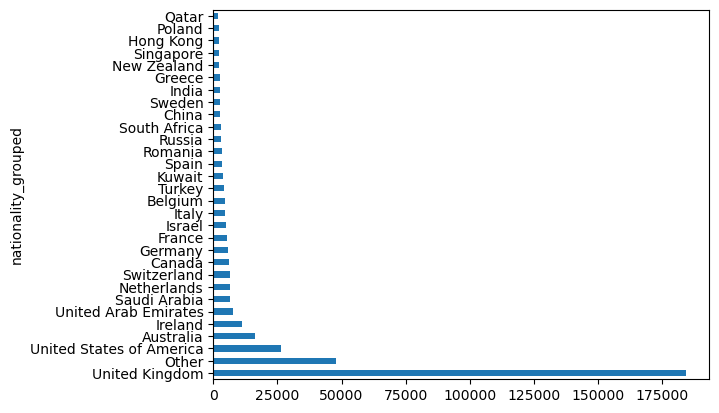

In [24]:
# Group less frequent nationalities into 'Other'
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –º–µ–Ω–µ–µ —á–∞—Å—Ç—ã–µ –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –≤ 'Other'

threshold = 2000
top_nationalities = hotels['reviewer_nationality_normalized'].value_counts()
top_nationalities = top_nationalities[top_nationalities > threshold].index

hotels['nationality_grouped'] = hotels['reviewer_nationality_normalized'].apply(
    lambda x: x if x in top_nationalities else 'Other'
)

hotels['nationality_grouped'].value_counts().plot(kind='barh')

# Final check
print(f"Unique before grouping: {hotels['reviewer_nationality_normalized'].nunique()}")
print(f"Unique after grouping: {hotels['nationality_grouped'].nunique()}")
print('Reviewer nationality: ', hotels['reviewer_nationality'])



In [25]:
# Encode grouped nationalities
# –ö–æ–¥–∏—Ä—É–µ–º —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X['nat_grouped_encoded'] = np.nan

for train_idx, val_idx in kf.split(hotels):
    enc = TargetEncoder(cols=['nationality_grouped'])
    train = hotels.iloc[train_idx]
    val = hotels.iloc[val_idx]
    enc.fit(train[['nationality_grouped']], y.iloc[train_idx])
    X.loc[val_idx, 'nat_grouped_encoded'] = enc.transform(val[['nationality_grouped']])['nationality_grouped']

hotels['nat_grouped_encoded'] = X['nat_grouped_encoded']


## –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞ –∏–∑ –æ—Ç–∑—ã–≤–æ–≤

–î–ª—è –æ–±–æ–≥–∞—â–µ–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–º–∏ —Å–∏–≥–Ω–∞–ª–∞–º–∏ –∏–∑ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –º—ã —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞ –∏–∑ —Å—Ç–æ–ª–±—Ü–æ–≤ `positive_review` –∏ `negative_review`. –≠—Ç–∏ –æ—Ç–∑—ã–≤—ã —Å–æ–¥–µ—Ä–∂–∞—Ç —Ü–µ–Ω–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –∫–ª–∏–µ–Ω—Ç—Å–∫–æ–º –æ–ø—ã—Ç–µ –∏ –º–æ–≥—É—Ç –≤—ã—è–≤–ª—è—Ç—å –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –∫–∞—á–µ—Å—Ç–≤–æ–º –æ—Ç–µ–ª—è –∏ –ø–æ–≤–µ–¥–µ–Ω–∏–µ–º —Ä–µ—Ü–µ–Ω–∑–µ–Ω—Ç–æ–≤.

### –ß—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ
- –°–æ–∑–¥–∞–Ω–∞ –ø–µ—Ä–µ–∏—Å–ø–æ–ª—å–∑—É–µ–º–∞—è —Ñ—É–Ω–∫—Ü–∏—è: `extract_sentiment_column(df, column_name)`  
  –≠—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è –ø—Ä–∏–º–µ–Ω—è–µ—Ç –º–æ–¥–µ–ª—å –∞–Ω–∞–ª–∏–∑–∞ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞ –∫ –∫–∞–∂–¥–æ–º—É –æ—Ç–∑—ã–≤—É –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –æ—Ü–µ–Ω–∫—É —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, polarity –∏–ª–∏ compound value)

- –ü—Ä–∏–º–µ–Ω–µ–Ω–∞ –∫ –æ–±–æ–∏–º —Å—Ç–æ–ª–±—Ü–∞–º –æ—Ç–∑—ã–≤–æ–≤:
  - `positive_sentiment` –∏–∑ `positive_review`
  - `negative_sentiment` –∏–∑ `negative_review`

### –¶–µ–ª—å
- –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –Ω–µ—Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç –≤ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø—Ä–∏–≥–æ–¥–Ω—ã–µ –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è  
- –ó–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π —Ç–æ–Ω –∏ –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å –æ—Ç–∑—ã–≤–æ–≤  
- –ü–æ–≤—ã—Å–∏—Ç—å —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –≤—ã—è–≤–ª—è—Ç—å –∞–Ω–æ–º–∞–ª–∏–∏ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –æ—Ü–µ–Ω–∫–∏ —Ä–µ—Ü–µ–Ω–∑–µ–Ω—Ç–æ–≤

### –î–æ—Å—Ç–∏–≥–Ω—É—Ç—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
- –î–æ–±–∞–≤–ª–µ–Ω—ã –¥–≤–∞ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞  
- –û–±–µ—Å–ø–µ—á–µ–Ω–∞ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –º–µ–∂–¥—É —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–æ–º –∏ –æ—Ü–µ–Ω–∫–æ–π —Ä–µ—Ü–µ–Ω–∑–µ–Ω—Ç–∞  
- –°–æ–∑–¥–∞–Ω–∞ –æ—Å–Ω–æ–≤–∞ –¥–ª—è NLP-–æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –∏–Ω–∂–µ–Ω–µ—Ä–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞

–≠—Ç–æ—Ç —à–∞–≥ —Å–æ–µ–¥–∏–Ω—è–µ—Ç –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç —Å —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ–º, –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—è –∫–∞–∫ —Ä–∞–∑–≤–µ–¥—ã–≤–∞—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑, —Ç–∞–∫ –∏ —Ç–æ—á–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π.



In [26]:
# Text cleaning function
# –§—É–Ω–∫—Ü–∏—è –æ—á–∏—Å—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    return text.lower().strip()

hotels['positive_review_clean'] = hotels['positive_review'].apply(clean_text)
hotels['negative_review_clean'] = hotels['negative_review'].apply(clean_text)



In [27]:
hotels['positive_review_length'] = hotels['positive_review_clean'].apply(lambda x: len(str(x).split()))
hotels['negative_review_length'] = hotels['negative_review_clean'].apply(lambda x: len(str(x).split()))

In [28]:
# Step 2: Define universal sentiment extraction function
# –®–∞–≥ 2: –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏

def extract_sentiment_column(df, column_name, overwrite=False, verbose=True):
    polarity_col = f'{column_name}_polarity'
    subjectivity_col = f'{column_name}_subjectivity'

    # Check if columns already exist
    if not overwrite and polarity_col in df.columns and subjectivity_col in df.columns:
        if verbose:
            print(f"Sentiment columns already exist: '{polarity_col}', '{subjectivity_col}' ‚Äî skipping.")
        return df.reset_index(drop=True)

    # Apply sentiment analysis
    def analyze(text):
        blob = TextBlob(str(text))
        return pd.Series({
            polarity_col: blob.sentiment.polarity,
            subjectivity_col: blob.sentiment.subjectivity
        })

    sentiment_df = df[column_name].apply(analyze)

    # Concatenate and return
    result_df = pd.concat([df.reset_index(drop=True), sentiment_df.reset_index(drop=True)], axis=1)

    if verbose:
        print(f"Sentiment columns added: '{polarity_col}', '{subjectivity_col}'")

    return result_df


# Step 3: Apply to both positive and negative reviews
# –®–∞–≥ 3: –ü—Ä–∏–º–µ–Ω—è–µ–º –∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–º –æ—Ç–∑—ã–≤–∞–º
hotels = extract_sentiment_column(hotels, 'positive_review_clean')
hotels = extract_sentiment_column(hotels, 'negative_review_clean')




Sentiment columns added: 'positive_review_clean_polarity', 'positive_review_clean_subjectivity'
Sentiment columns added: 'negative_review_clean_polarity', 'negative_review_clean_subjectivity'


In [29]:
display(hotels['negative_review_clean_polarity'].value_counts().sort_index(ascending=False))
display(hotels.info())

negative_review_clean_polarity
 1.000000    1967
 0.955000       3
 0.953333      13
 0.950000       3
 0.917778       1
             ... 
-0.955000       6
-0.955000       1
-0.975000      34
-0.987500       1
-1.000000     901
Name: count, Length: 30107, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

None

In [30]:
hotels.columns

Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'tags',
       'days_since_review', 'lat', 'lng', 'country', 'review_year',
       'review_month', 'review_dayofweek', 'review_day', 'hotel_name_encoded',
       'reviewer_nationality_normalized', 'nationality_grouped',
       'nat_grouped_encoded', 'positive_review_clean', 'negative_review_clean',
       'positive_review_length', 'negative_review_length',
       'positive_review_clean_polarity', 'positive_review_clean_subjectivity',
       'negative_review_clean_polarity', 'negative_review_clean_subjectivity'],
      dtype='object')

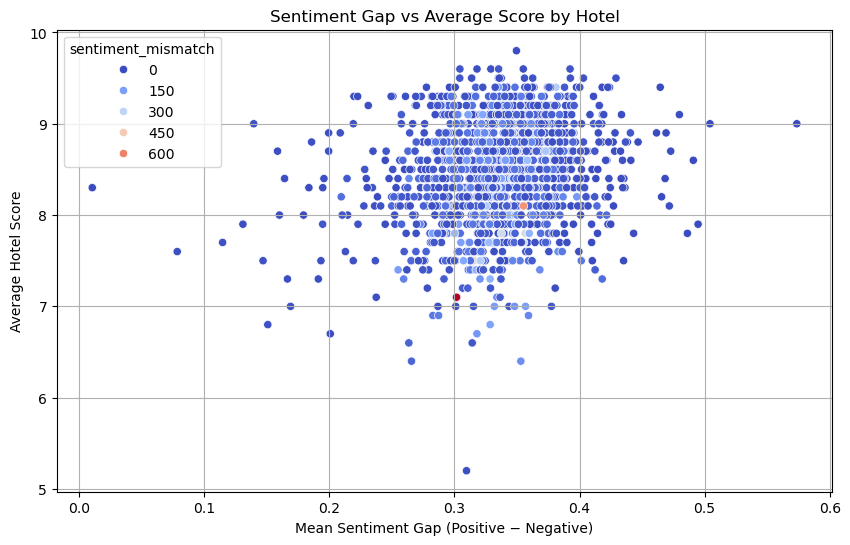

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute sentiment gap
# –®–∞–≥ 1: –í—ã—á–∏—Å–ª—è–µ–º —Ä–∞–∑–Ω–∏—Ü—É –≤ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏
hotels['sentiment_gap'] = hotels['positive_review_clean_polarity'] - hotels['negative_review_clean_polarity']

# Step 2: Flag mismatches (e.g., positive polarity < negative polarity)
# –®–∞–≥ 2: –û—Ç–º–µ—á–∞–µ–º –Ω–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å < –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–π)
hotels['sentiment_mismatch'] = hotels['sentiment_gap'] < 0

# Step 3: Aggregate by hotel_name
# –®–∞–≥ 3: –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ –Ω–∞–∑–≤–∞–Ω–∏—é –æ—Ç–µ–ª—è
asymmetry_df = hotels.groupby('hotel_name').agg({
    'sentiment_gap': 'mean',
    'sentiment_mismatch': 'sum',
    'average_score': 'mean'
}).reset_index()

# Step 4: Visualize sentiment gap vs average score
# –®–∞–≥ 4: –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞–∑–Ω–∏—Ü—É –≤ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –∏ —Å—Ä–µ–¥–Ω—é—é –æ—Ü–µ–Ω–∫—É
plt.figure(figsize=(10, 6))
sns.scatterplot(data=asymmetry_df, x='sentiment_gap', y='average_score', hue='sentiment_mismatch', palette='coolwarm')
plt.title('Sentiment Gap vs Average Score by Hotel')
plt.xlabel('Mean Sentiment Gap (Positive ‚àí Negative)')
plt.ylabel('Average Hotel Score')
plt.grid(True)
plt.show()


## –ê–Ω–∞–ª–∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞: –†–∞–∑–Ω–∏—Ü–∞ –≤ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–µ vs –°—Ä–µ–¥–Ω—è—è –æ—Ü–µ–Ω–∫–∞ –æ—Ç–µ–ª—è

–≠—Ç–æ—Ç –¥–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ—Ç –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –º–µ–∂–¥—É **—Å—Ä–µ–¥–Ω–µ–π —Ä–∞–∑–Ω–∏—Ü–µ–π —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞** (–ø–æ–∑–∏—Ç–∏–≤–Ω—ã–π –º–∏–Ω—É—Å –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–π –æ—Ç–∑—ã–≤) –∏ **—Å—Ä–µ–¥–Ω–µ–π –æ—Ü–µ–Ω–∫–æ–π –æ—Ç–µ–ª—è**. –ö–∞–∂–¥–∞—è —Ç–æ—á–∫–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –æ—Ç–¥–µ–ª—å–Ω—ã–π –æ—Ç–µ–ª—å, –∞ —Ü–≤–µ—Ç –∏ —Ä–∞–∑–º–µ—Ä —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ —É—Ä–æ–≤–µ–Ω—å **–Ω–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞**.

### –û—Å–Ω–æ–≤–Ω—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è
- **–ü–ª–æ—Ç–Ω–∞—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è** –≤–æ–∫—Ä—É–≥ —Ä–∞–∑–Ω–∏—Ü—ã —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞ ~0.3 –∏ —Å—Ä–µ–¥–Ω–µ–π –æ—Ü–µ–Ω–∫–∏ ~8 —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –æ—Ç–µ–ª–µ–π –ø–æ–ª—É—á–∞—é—Ç —É–º–µ—Ä–µ–Ω–Ω–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –∏ –≤—ã—Å–æ–∫–∏–µ –æ—Ü–µ–Ω–∫–∏  
- **–í—ã–±—Ä–æ—Å—ã** —Å –Ω–∏–∑–∫–∏–º–∏ –æ—Ü–µ–Ω–∫–∞–º–∏ –∏ –≤—ã—Å–æ–∫–æ–π —Ä–∞–∑–Ω–∏—Ü–µ–π —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞ –º–æ–≥—É—Ç —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤–æ–≤–∞—Ç—å –æ:
  - –ù–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ –º–µ–∂–¥—É —Ç–µ–∫—Å—Ç–æ–≤—ã–º —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–æ–º –∏ —á–∏—Å–ª–æ–≤–æ–π –æ—Ü–µ–Ω–∫–æ–π  
  - –í–æ–∑–º–æ–∂–Ω–æ–π –º–∞–Ω–∏–ø—É–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–∞–º–∏ –∏–ª–∏ –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ–º –∫–ª–∏–µ–Ω—Ç—Å–∫–æ–º –æ–ø—ã—Ç–µ

### –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è
- –û—Ç–µ–ª–∏ —Å **–Ω–∏–∑–∫–æ–π —Ä–∞–∑–Ω–∏—Ü–µ–π —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞, –Ω–æ –≤—ã—Å–æ–∫–∏–º–∏ –æ—Ü–µ–Ω–∫–∞–º–∏** –º–æ–≥—É—Ç –∑–∞–≤—ã—à–∞—Ç—å —Ä–µ–π—Ç–∏–Ω–≥–∏  
- –û—Ç–µ–ª–∏ —Å **–≤—ã—Å–æ–∫–æ–π —Ä–∞–∑–Ω–∏—Ü–µ–π —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞, –Ω–æ –Ω–∏–∑–∫–∏–º–∏ –æ—Ü–µ–Ω–∫–∞–º–∏** –º–æ–≥—É—Ç —Å—Ç—Ä–∞–¥–∞—Ç—å –æ—Ç –Ω–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è –æ–∂–∏–¥–∞–Ω–∏–π –∏–ª–∏ –ø—Ä–µ–¥–≤–∑—è—Ç—ã—Ö –æ—Ç–∑—ã–≤–æ–≤  
- –õ–µ–≥–µ–Ω–¥–∞ `sentiment_mismatch` –ø–æ–º–æ–≥–∞–µ—Ç –≤—ã—è–≤–∏—Ç—å –æ—Ç–µ–ª–∏, –≥–¥–µ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç –∏ –æ—Ü–µ–Ω–∫–∞ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è

### –ß—Ç–æ —ç—Ç–æ –¥–∞—ë—Ç
- –ü–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –ø–æ–ª–µ–∑–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞ –¥–ª—è –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –∞–Ω–æ–º–∞–ª–∏–π  
- –ü–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç —Ü–µ–ª—å –ø—Ä–æ–µ–∫—Ç–∞ ‚Äî –≤—ã—è–≤–ª–µ–Ω–∏–µ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–µ–ª–µ–π —Å –ø–æ–º–æ—â—å—é –ø—Ä–µ–¥–∏–∫—Ç–∏–≤–Ω–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è  
- –ü—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –≤–∏–∑—É–∞–ª—å–Ω—ã–π –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏ –æ—Ç–∑—ã–≤–æ–≤ –∏ –æ—Ü–µ–Ω–æ–∫

–≠—Ç–æ—Ç –≥—Ä–∞—Ñ–∏–∫ —É—Å–∏–ª–∏–≤–∞–µ—Ç –∞—Ä–≥—É–º–µ–Ω—Ç—ã –≤ –ø–æ–ª—å–∑—É –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏–∏ –∞–Ω–∞–ª–∏–∑–∞ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞ –≤ –ø–∞–π–ø–ª–∞–π–Ω –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —Å–ø–æ—Å–æ–±—Å—Ç–≤—É–µ—Ç –¥–∞–ª—å–Ω–µ–π—à–µ–º—É –∏–∑—É—á–µ–Ω–∏—é –≤—ã—è–≤–ª–µ–Ω–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤.



## –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ —Å –ø–æ–º–æ—â—å—é TF-IDF

–î–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Å–∏–≥–Ω–∞–ª–æ–≤ –∏–∑ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –º—ã –ø—Ä–∏–º–µ–Ω–∏–ª–∏ **TF-IDF (Term Frequency‚ÄìInverse Document Frequency)** –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—é –∫ —Å—Ç–æ–ª–±—Ü—É `positive_review_clean`. –≠—Ç–∞ —Ç–µ—Ö–Ω–∏–∫–∞ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç –≤ —á–∏—Å–ª–æ–≤—É—é –º–∞—Ç—Ä–∏—Ü—É, –æ—Ç—Ä–∞–∂–∞—é—â—É—é –∑–Ω–∞—á–∏–º–æ—Å—Ç—å —Å–ª–æ–≤ –≤ –∫–æ—Ä–ø—É—Å–µ.

### –ß—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ
- –ò–º–ø–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω `TfidfVectorizer` –∏–∑ `sklearn.feature_extraction.text`  
- –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω—ã –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –∞–Ω–≥–ª–∏–π—Å–∫–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –æ–±—â–µ—É–ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å–Ω—ã—Ö, –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã—Ö —Å–ª–æ–≤  
- –û–≥—Ä–∞–Ω–∏—á–µ–Ω–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ **100 –Ω–∞–∏–±–æ–ª–µ–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º–∏ —Ç–µ—Ä–º–∏–Ω–∞–º–∏** —Å –ø–æ–º–æ—â—å—é `max_features=100`  
- –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã –æ—á–∏—â–µ–Ω–Ω—ã–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –≤ —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É TF-IDF  
- –ú–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∞ –≤ DataFrame –∏ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∞ —Å –æ—Å–Ω–æ–≤–Ω—ã–º –¥–∞—Ç–∞—Å–µ—Ç–æ–º `hotels`

### –¶–µ–ª—å
- –ó–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å —Ç–æ–Ω–∫–∏–µ –æ—Ç—Ç–µ–Ω–∫–∏ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞ –∏ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –ø–∞—Ç—Ç–µ—Ä–Ω—ã –∏–∑ —Ç–µ–∫—Å—Ç–∞ –æ—Ç–∑—ã–≤–æ–≤  
- –ü–æ–∑–≤–æ–ª–∏—Ç—å –º–æ–¥–µ–ª–∏ –æ–±—É—á–∞—Ç—å—Å—è –Ω–∞ —Å–∏–≥–Ω–∞–ª–∞—Ö –Ω–∞ —É—Ä–æ–≤–Ω–µ —Å–ª–æ–≤ –±–µ–∑ —Ä—É—á–Ω–æ–≥–æ –≤—ã–±–æ—Ä–∞ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤  
- –°–Ω–∏–∑–∏—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø—Ä–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç–∏

### –î–æ—Å—Ç–∏–≥–Ω—É—Ç—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
- –î–æ–±–∞–≤–ª–µ–Ω–æ 100 –Ω–æ–≤—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∏—Ö —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤  
- –î–∞—Ç–∞—Å–µ—Ç –æ–±–æ–≥–∞—â—ë–Ω —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, –ø–æ–ª—É—á–µ–Ω–Ω—ã–º–∏ –∏–∑ NLP  
- –°–æ–∑–¥–∞–Ω –º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º—ã–π –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è –∏–Ω–∂–µ–Ω–µ—Ä–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç–µ–∫—Å—Ç–∞

–≠—Ç–æ—Ç —à–∞–≥ —Å–æ–µ–¥–∏–Ω—è–µ—Ç –Ω–µ—Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç –æ—Ç–∑—ã–≤–æ–≤ —Å —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ–º, –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—è –∫–∞–∫ —Ä–∞–∑–≤–µ–¥—ã–≤–∞—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑, —Ç–∞–∫ –∏ —Ç–æ—á–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π.



In [32]:
########################################################################################
hotels.info()
hotels_reserved = hotels.copy()
# Write reserved copy to CSV
hotels_reserved.to_csv('data/hotels_reserved.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 36 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

In [33]:
# Use built-in English stopwords
# –ò—Å–ø–æ–ª—å–∑—É–µ–º –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞
stop_words = text.ENGLISH_STOP_WORDS

# Step 1: Define your custom stop words
# –®–∞–≥ 1: –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Å–≤–æ–∏ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞
custom_words = {'work','way','walk','stay','stayed','right','quite','minutes','london','comfy', 'definitely','asked', 'available',
                 'better', 'bit', 'couldn', 'day', 'did', 'didn', 'don', 'given', 'got', 'just', 'like', 'need', 'negative', 'nice', 
                 'open', 'outside', 'paid',  'really', 'said', 'think', 'time', 'times', 'told', 'took', 'use', 'wasn' } 

# Step 2: Combine with built-in English stop words
# –®–∞–≥ 2: –û–±—ä–µ–¥–∏–Ω—è–µ–º —Å –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–º–∏ –∞–Ω–≥–ª–∏–π—Å–∫–∏–º–∏ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞–º–∏
extended_stop_words = list(text.ENGLISH_STOP_WORDS.union(custom_words))

combined_reviews = pd.concat([
    hotels['positive_review_clean'],
    hotels['negative_review_clean']
])

# Chose 100 most frequent feature/ words
# –í—ã–±–∏—Ä–∞–µ–º 100 —Å–∞–º—ã—Ö —á–∞—Å—Ç–æ—Ç–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤/—Å–ª–æ–≤
tfidf = TfidfVectorizer(max_features=100, stop_words=extended_stop_words)
tfidf.fit(combined_reviews)

# Transform separately
tfidf_matrix_pos = tfidf.transform(hotels['positive_review_clean'])
tfidf_matrix_neg = tfidf.transform(hotels['negative_review_clean'])

# TfidfVectorizer output for future checks and analyses
# –í—ã–≤—â–≤ –¥–∞–Ω–Ω—ã—Ö TfidfVectorizer –¥–ª—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ –∞–Ω–∞–ª–∏–∑–∞ –ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏
df_tfidf_pos = pd.DataFrame(tfidf_matrix_pos.toarray(), columns=tfidf.get_feature_names_out())
df_tfidf_neg = pd.DataFrame(tfidf_matrix_neg.toarray(), columns=tfidf.get_feature_names_out())


# Convert to DataFrame and merge
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ DataFrame –∏ –æ–±—ä–µ–¥–∏–Ω—è–µ–º
tfidf_df_pos = pd.DataFrame(tfidf_matrix_pos.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df_neg = pd.DataFrame(tfidf_matrix_neg.toarray(), columns=tfidf.get_feature_names_out())


# Identify new columns from both TF-IDF blocks
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –∏–∑ –æ–±–æ–∏—Ö –±–ª–æ–∫–æ–≤ TF-IDF
new_neg = [col for col in tfidf_df_neg.columns if col not in hotels.columns]
new_pos = [col for col in tfidf_df_pos.columns if col not in hotels.columns]

# Concatenate only new columns
# –î–æ–±–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –Ω–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏
frames = [hotels.reset_index(drop=True)]
if new_neg:
    frames.append(tfidf_df_neg[new_neg].reset_index(drop=True))
if new_pos:
    frames.append(tfidf_df_pos[new_pos].reset_index(drop=True))

# Final merge
# –ò—Ç–æ–≥–æ–≤–æ–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ
hotels = pd.concat(frames, axis=1)


In [34]:
# Output check
hotels.info()

display(df_tfidf_pos.sum().sort_values(ascending=False))
display(df_tfidf_neg.sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 236 entries, hotel_address to wonderful
dtypes: bool(1), datetime64[ns](1), float64(211), int32(4), int64(7), object(12)
memory usage: 688.0+ MB


location    58514.581806
staff       47339.695268
good        30911.483454
great       29472.250001
hotel       28377.041600
                ...     
window        710.681128
bad           661.501957
cold          442.374968
noisy         381.001927
poor          300.822994
Length: 100, dtype: float64

room         39419.633387
breakfast    18283.455975
small        18117.256234
hotel        17323.186219
rooms        11223.052414
                 ...     
fantastic      277.061323
beautiful      257.759215
wonderful      249.564764
spacious       225.436502
positive        77.275766
Length: 100, dtype: float64

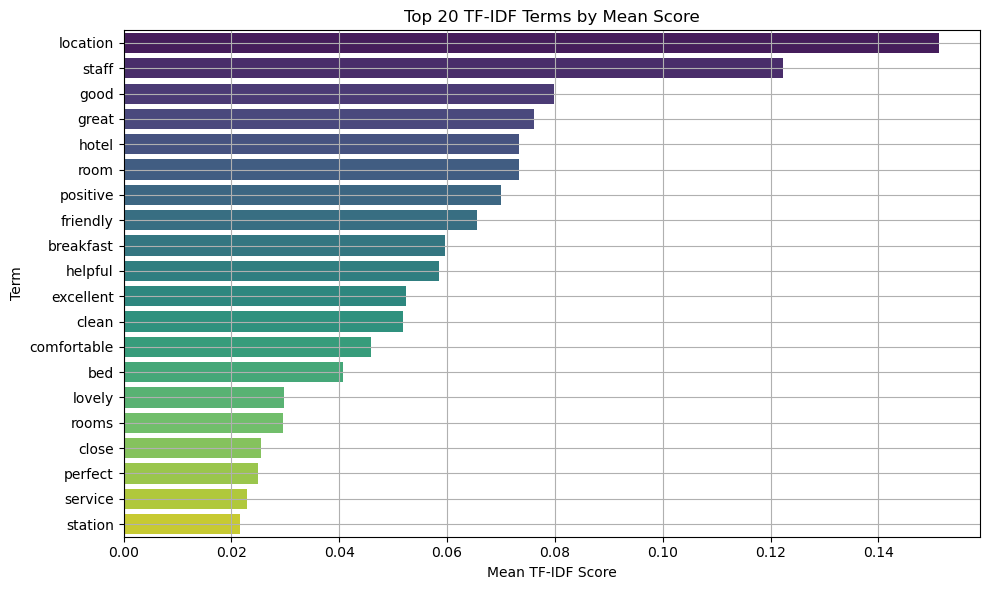

In [35]:
# Step 1: Compute mean TF-IDF score per term
# –®–∞–≥ 1: –í—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ TF-IDF –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–µ—Ä–º–∏–Ω–∞

tfidf_means = tfidf_df_pos.mean().sort_values(ascending=False)

# Step 2: Plot top 20 terms
# –®–∞–≥ 2: –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–æ–ø-20 —Ç–µ—Ä–º–∏–Ω–æ–≤
plt.figure(figsize=(10, 6))
sns.barplot(
    x=tfidf_means.values[:20],
    y=tfidf_means.index[:20],
    hue=tfidf_means.index[:20],  # assign hue to y
    palette='viridis',
    legend=False
)

plt.title('Top 20 TF-IDF Terms by Mean Score')
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Term')
plt.grid(True)
plt.tight_layout()
plt.show()


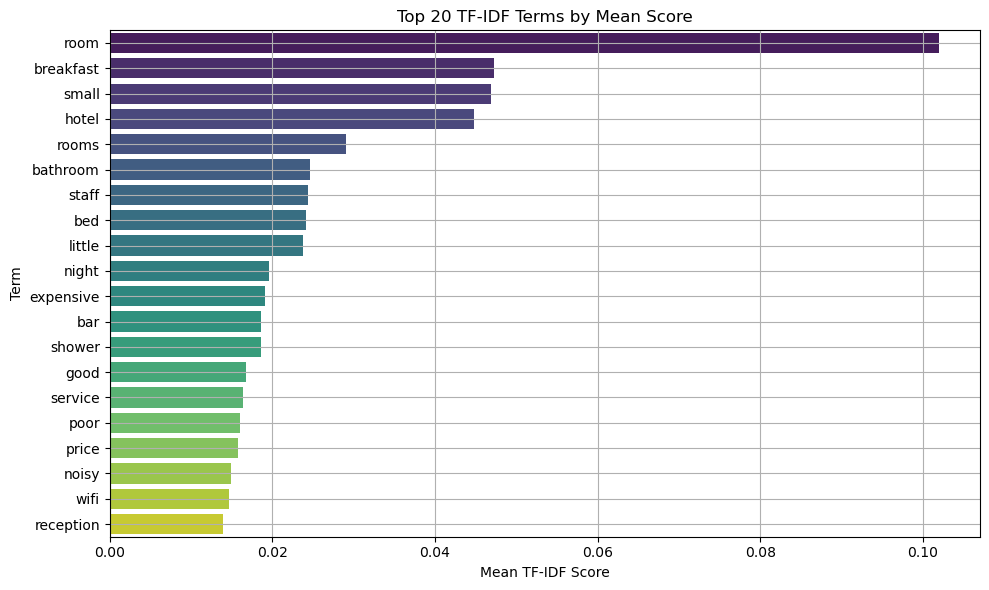

In [36]:
# Step 1: Compute mean TF-IDF score per term
# –®–∞–≥ 1: –í—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ TF-IDF –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–µ—Ä–º–∏–Ω–∞

tfidf_means = tfidf_df_neg.mean().sort_values(ascending=False)

# Step 2: Plot top 20 terms
# –®–∞–≥ 2: –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–æ–ø-20 —Ç–µ—Ä–º–∏–Ω–æ–≤
plt.figure(figsize=(10, 6))
sns.barplot(
    x=tfidf_means.values[:20],
    y=tfidf_means.index[:20],
    hue=tfidf_means.index[:20],  # assign hue to y
    palette='viridis',
    legend=False
)

plt.title('Top 20 TF-IDF Terms by Mean Score')
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Term')
plt.grid(True)
plt.tight_layout()
plt.show()

## –≠—Ç–∞–ø –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏: –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π –º–∞—Å—à—Ç–∞–±–∞—Ç–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–î–ª—è –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ–≥–æ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –≤—Å–µ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É –º—ã —Ä–µ–∞–ª–∏–∑–æ–≤–∞–ª–∏ **—É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π –º–∞—Å—à—Ç–∞–±–∞—Ç–æ—Ä** ‚Äî –ø–µ—Ä–µ–∏—Å–ø–æ–ª—å–∑—É–µ–º—É—é —Ñ—É–Ω–∫—Ü–∏—é, —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É—é—â—É—é —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏. –≠—Ç–æ—Ç —à–∞–≥ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏ –≤–∞–∂–µ–Ω –¥–ª—è –º–æ–¥–µ–ª–µ–π, —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö –∫ –º–∞—Å—à—Ç–∞–±—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —Ç–∞–∫–∏—Ö –∫–∞–∫ –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –∏–ª–∏ –Ω–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏.

### –¶–µ–ª—å
- –ù–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–æ –Ω—É–ª–µ–≤–æ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –∏ –µ–¥–∏–Ω–∏—á–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏  
- –ü—Ä–µ–¥–æ—Ç–≤—Ä–∞—Ç–∏—Ç—å –¥–æ–º–∏–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –±–æ–ª—å—à–∏–º –¥–∏–∞–ø–∞–∑–æ–Ω–æ–º –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏  
- –û–±–µ—Å–ø–µ—á–∏—Ç—å —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–æ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –∏ —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤

### –ß—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ
- –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ —Ñ—É–Ω–∫—Ü–∏—è, –ø—Ä–∏–º–µ–Ω—è—é—â–∞—è `StandardScaler` –∏–∑ `sklearn.preprocessing`  
- –ü—Ä–∏–º–µ–Ω–µ–Ω–∞ –∫ –≤—ã–±—Ä–∞–Ω–Ω—ã–º —á–∏—Å–ª–æ–≤—ã–º —Å—Ç–æ–ª–±—Ü–∞–º (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤, –æ—Ü–µ–Ω–∫–∏ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞, –ø—Ä–∏–∑–Ω–∞–∫–∏ TF-IDF)  
- –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ–º —Ñ–æ—Ä–º–∞—Ç–µ –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
- –ü–æ—Å—Ç—Ä–æ–µ–Ω—ã –≥—Ä–∞—Ñ–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π **–¥–æ –∏ –ø–æ—Å–ª–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è** –¥–ª—è –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏  
- –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω—ã –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –∏ boxplot-–≥—Ä–∞—Ñ–∏–∫–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Ä–∞–∑–±—Ä–æ—Å–∞ –∏ –≤—ã—è–≤–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤  
- –ü—Ä–æ–≤–µ—Ä–µ–Ω–æ, —á—Ç–æ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω—ã –≤–æ–∫—Ä—É–≥ –Ω—É–ª—è –∏ –∏–º–µ—é—Ç —Å–æ–ø–æ—Å—Ç–∞–≤–∏–º—É—é –¥–∏—Å–ø–µ—Ä—Å–∏—é

### –î–æ—Å—Ç–∏–≥–Ω—É—Ç—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
- –°–æ–∑–¥–∞–Ω –º–æ–¥—É–ª—å–Ω—ã–π –∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã–π –ø–∞–π–ø–ª–∞–π–Ω –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è  
- –ü–æ–≤—ã—à–µ–Ω–∞ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å –º–æ–¥–µ–ª–∏  
- –ü–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞–º–∏, –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞—é—â–∏–º–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

–≠—Ç–æ—Ç —ç—Ç–∞–ø –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —É—Å–∏–ª–∏–≤–∞–µ—Ç –Ω–∞–¥—ë–∂–Ω–æ—Å—Ç—å –ø–∞–π–ø–ª–∞–π–Ω–∞ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã–π –æ–Ω–±–æ—Ä–¥–∏–Ω–≥ –¥–ª—è —Å–ª—É—à–∞—Ç–µ–ª–µ–π SkillFactory.



In [37]:
# Step 1: Define universal scaler
# –®–∞–≥ 1: –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è

def scale_feature(df, column):
    values = df[column].fillna(0).astype(float)
    
    # If values span multiple orders of magnitude, apply log1p
    # –ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏—è —Å–∏–ª—å–Ω–æ –≤–∞—Ä—å–∏—Ä—É—é—Ç—Å—è ‚Äî –ø—Ä–∏–º–µ–Ω—è–µ–º –ª–æ–≥–∞—Ä–∏—Ñ–º
    if values.max() > 1000 or values.skew() > 2:
        df[f'{column}_scaled'] = np.log1p(values)
    else:
        scaler = MinMaxScaler()
        df[f'{column}_scaled'] = scaler.fit_transform(values.values.reshape(-1, 1))
    
    return df

# Step 2: Apply to selected columns
# –®–∞–≥ 2: –ü—Ä–∏–º–µ–Ω—è–µ–º –∫ –≤—ã–±—Ä–∞–Ω–Ω—ã–º —Å—Ç–æ–ª–±—Ü–∞–º
columns_to_scale = [
    'review_total_negative_word_counts',
    'total_number_of_reviews',
    'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given',
    'hotel_name_encoded',
    'nat_grouped_encoded',
    'sentiment_gap'
]

for col in columns_to_scale:
    hotels = scale_feature(hotels, col)


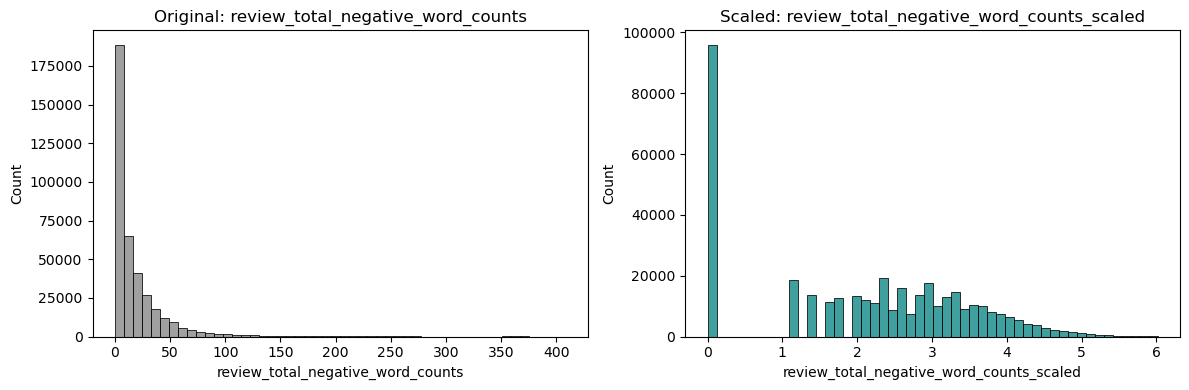

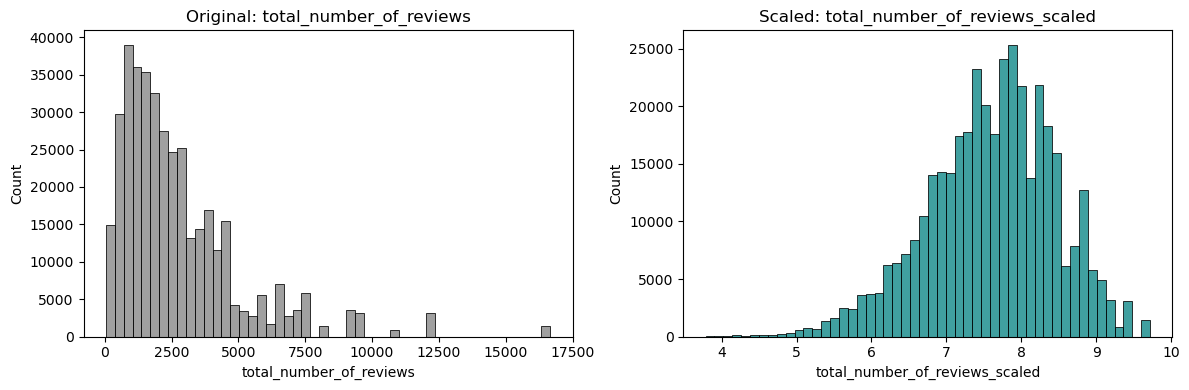

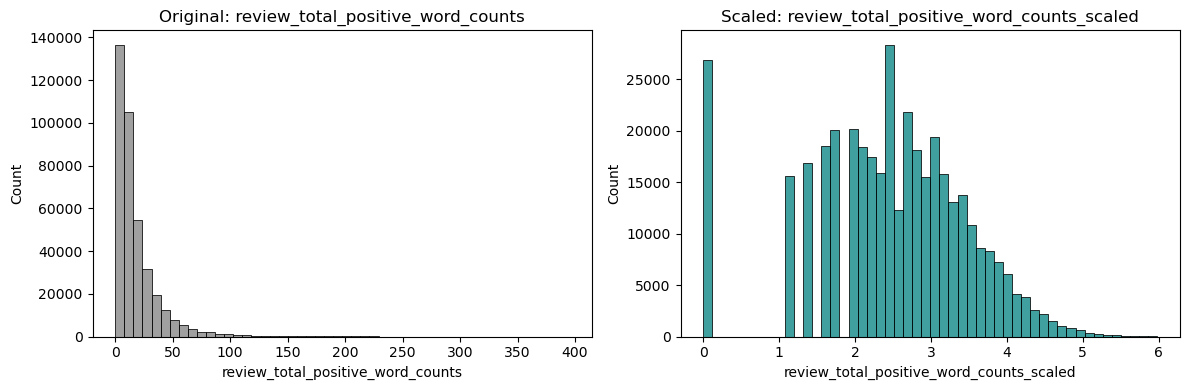

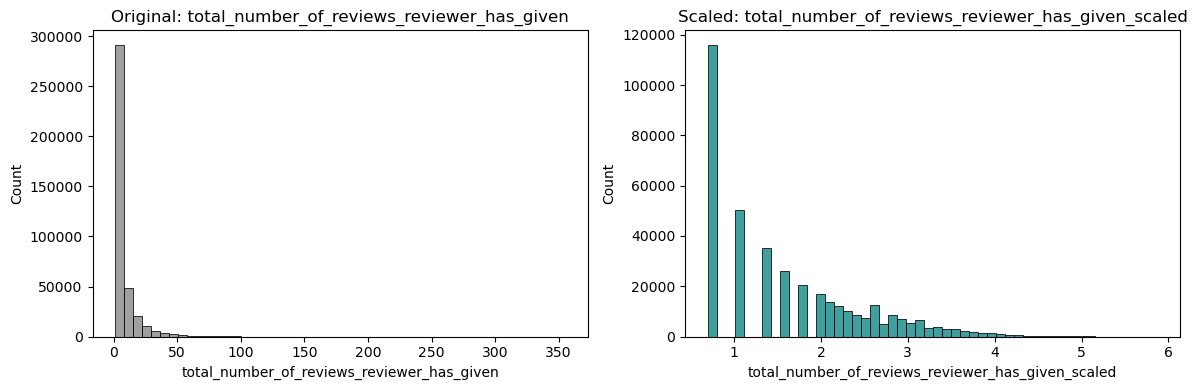

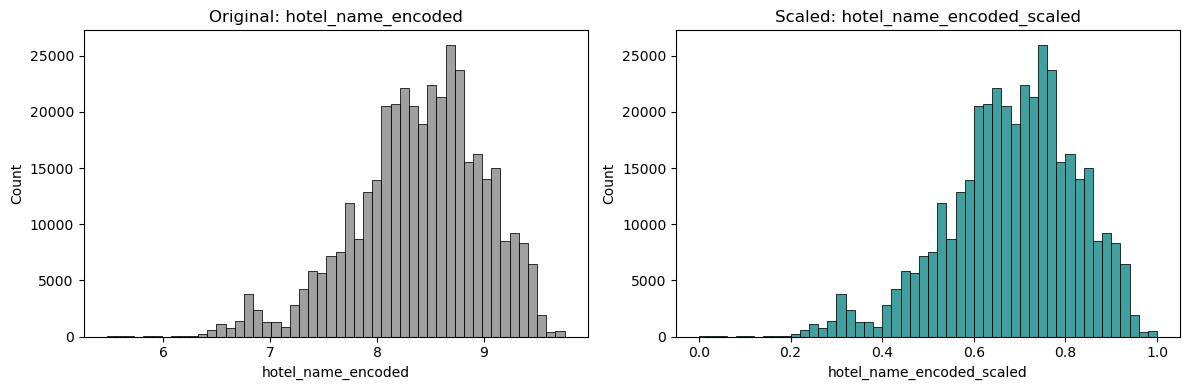

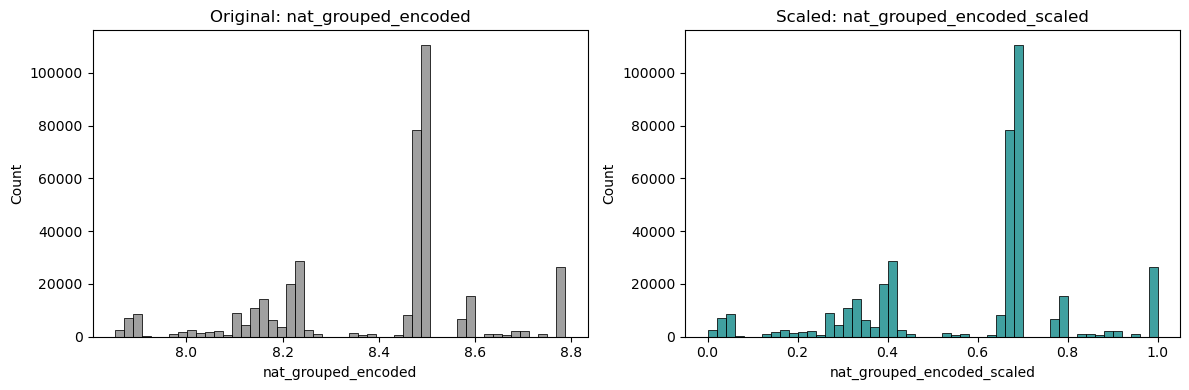

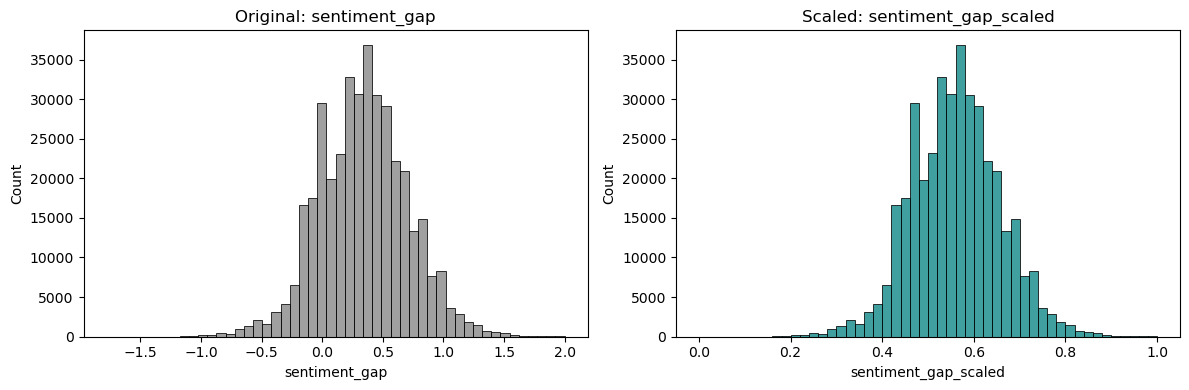

In [38]:
# Step 1: Define visualization function
# –®–∞–≥ 1: –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π

def plot_scaling_effect(df, column):
    scaled_col = f'{column}_scaled'
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Original distribution
    # –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    sns.histplot(df[column].fillna(0), bins=50, ax=axes[0], color='gray')
    axes[0].set_title(f'Original: {column}')
    
    # Scaled distribution
    # –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    sns.histplot(df[scaled_col].fillna(0), bins=50, ax=axes[1], color='teal')
    axes[1].set_title(f'Scaled: {scaled_col}')
    
    plt.tight_layout()
    plt.show()

# Step 2: Apply to selected columns
# –®–∞–≥ 2: –ü—Ä–∏–º–µ–Ω—è–µ–º –∫ –≤—ã–±—Ä–∞–Ω–Ω—ã–º —Å—Ç–æ–ª–±—Ü–∞–º
for col in [
    'review_total_negative_word_counts',
    'total_number_of_reviews',
    'review_total_positive_word_counts',
    'total_number_of_reviews_reviewer_has_given',
    'hotel_name_encoded',
    'nat_grouped_encoded',
    'sentiment_gap'
]:
    plot_scaling_effect(hotels, col)


## –ò–Ω–∂–µ–Ω–µ—Ä–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –∏ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ —Ç–µ–≥–æ–≤

–î–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏–Ω—Å–∞–π—Ç–æ–≤ –∏–∑ —Å—Ç–æ–ª–±—Ü–∞ `tags`, —Å–æ–¥–µ—Ä–∂–∞—â–µ–≥–æ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ –º–µ—Ç–∞–¥–∞–Ω–Ω—ã–µ –æ –ø—Ä–µ–±—ã–≤–∞–Ω–∏–∏ –≤ –æ—Ç–µ–ª–µ, –º—ã —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–ª–∏ —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è **—Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏, –æ—á–∏—Å—Ç–∫–∏ –∏ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ —Ç–µ–≥–æ–≤**. –≠—Ç–∏ —Ç–µ–≥–∏ —á–∞—Å—Ç–æ –≤–∫–ª—é—á–∞—é—Ç —Ñ—Ä–∞–∑—ã –≤—Ä–æ–¥–µ ‚ÄúLeisure trip‚Äù, ‚ÄúCouple‚Äù –∏–ª–∏ ‚ÄúStayed 2 nights‚Äù, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–º–æ–≥–∞—é—Ç –≤—ã—è–≤–∏—Ç—å –ø–∞—Ç—Ç–µ—Ä–Ω—ã –ø–æ —Ç–∏–ø—É –≥–æ—Å—Ç–µ–π, —Ü–µ–ª–∏ –ø–æ–µ–∑–¥–∫–∏ –∏ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–æ–∂–∏–≤–∞–Ω–∏—è.

### –ß—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ
- –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –∫–∞—Å—Ç–æ–º–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è:
  - –£–¥–∞–ª—è–µ—Ç –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–µ—Ç —Ñ–æ—Ä–º–∞—Ç  
  - –§–∏–ª—å—Ç—Ä—É–µ—Ç –Ω–µ—Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–µ –∏–ª–∏ —Å–ª–∏—à–∫–æ–º –æ–±—â–∏–µ —Ç–µ–≥–∏  
  - –ì—Ä—É–ø–ø–∏—Ä—É–µ—Ç —Å—Ö–æ–∂–∏–µ —Ç–µ–≥–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, ‚ÄúLeisure trip‚Äù –∏ ‚ÄúBusiness trip‚Äù) –≤ –±–æ–ª–µ–µ —à–∏—Ä–æ–∫–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏  
  - –ü–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ—Ç —á–∞—Å—Ç–æ—Ç—É –ø–æ—è–≤–ª–µ–Ω–∏—è —Ç–µ–≥–æ–≤ –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ —á–∞—Å—Ç–æ—Ç

### –¶–µ–ª—å
- –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –Ω–µ—Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏ —Ç–µ–≥–æ–≤ –≤ —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –≥–æ—Ç–æ–≤—ã–µ –∫ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é  
- –ó–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å –ø–æ–≤–µ–¥–µ–Ω—á–µ—Å–∫–∏–µ –∏ –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω—ã–µ —Å–∏–≥–Ω–∞–ª—ã –∏–∑ –º–µ—Ç–∞–¥–∞–Ω–Ω—ã—Ö –≥–æ—Å—Ç–µ–π  
- –û–±–µ—Å–ø–µ—á–∏—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ –∏ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø–æ —Ç–∏–ø—É –ø–æ–µ–∑–¥–∫–∏, —Ä–∞–∑–º–µ—Ä—É –≥—Ä—É–ø–ø—ã –∏ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–æ–∂–∏–≤–∞–Ω–∏—è

### –î–æ—Å—Ç–∏–≥–Ω—É—Ç—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
- –°–æ–∑–¥–∞–Ω—ã –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ —à—É–º–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –ø–æ–ª–µ–π  
- –û–±–µ—Å–ø–µ—á–µ–Ω–∞ –∞–≥—Ä–µ–≥–∞—Ü–∏—è –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–≥–æ–≤  
- –ü–æ–¥–¥–µ—Ä–∂–∞–Ω–æ –ø–æ—Å–ª–µ–¥—É—é—â–µ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ –∞–Ω–æ–º–∞–ª–∏–π –∑–∞ —Å—á—ë—Ç –æ–±–æ–≥–∞—â–µ–Ω–∏—è –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –≥–æ—Å—Ç–µ–π

–≠—Ç–æ—Ç —à–∞–≥ —É—Å–∏–ª–∏–≤–∞–µ—Ç —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫—É—é –≥–ª—É–±–∏–Ω—É –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã–π –æ–Ω–±–æ—Ä–¥–∏–Ω–≥ –¥–ª—è —Å–ª—É—à–∞—Ç–µ–ª–µ–π SkillFactory.



In [39]:
hotels.columns
hotels_reserved = hotels.copy()
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 243 entries, hotel_address to sentiment_gap_scaled
dtypes: bool(1), datetime64[ns](1), float64(218), int32(4), int64(7), object(12)
memory usage: 708.6+ MB


In [198]:
# Function to filter and group tags
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –∏ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ —Ç–µ–≥–æ–≤

def filter_and_group_tags(tags_df, quantile_threshold=0.25, n_groups=20, random_state=42):
    """
    Filters rare tags and groups remaining ones into semantic clusters
    –§–∏–ª—å—Ç—Ä—É–µ—Ç —Ä–µ–¥–∫–∏–µ —Ç–µ–≥–∏ –∏ –≥—Ä—É–ø–ø–∏—Ä—É–µ—Ç –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –≤ —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–µ –∫–ª–∞—Å—Ç–µ—Ä—ã

    Parameters:
    - tags_df: binary tag DataFrame (one-hot encoded)
    - quantile_threshold: quantile for filtering rare tags (default: 0.25)
    - n_groups: number of tag clusters to form (default: 20)
    - random_state: for reproducibility

    Returns:
    - grouped_tags_df: DataFrame with n_groups columns (tag clusters)
    - number_of_grouped_tags: integer count of tag clusters formed

    **–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:**
    - `tags_df`: –±–∏–Ω–∞—Ä–Ω—ã–π DataFrame —Ç–µ–≥–æ–≤ (–≤ —Ñ–æ—Ä–º–∞—Ç–µ one-hot encoding)
    - `quantile_threshold`: –∫–≤–∞–Ω—Ç–∏–ª—å –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ —Ä–µ–¥–∫–∏—Ö —Ç–µ–≥–æ–≤ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é: 0.25)
    - `n_groups`: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Ç–µ–≥–æ–≤ –¥–ª—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é: 20)
    - `random_state`: –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

    **–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:**
    - `grouped_tags_df`: DataFrame —Å `n_groups` —Å—Ç–æ–ª–±—Ü–∞–º–∏ (–∫–ª–∞—Å—Ç–µ—Ä—ã —Ç–µ–≥–æ–≤)
    - `number_of_grouped_tags`: —Ü–µ–ª–æ–µ —á–∏—Å–ª–æ ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Ç–µ–≥–æ–≤

    """

    # Step 1: Filter rare tags
    tag_freq = tags_df.sum()
    threshold = tag_freq.quantile(quantile_threshold)
    filtered_tags = tags_df.loc[:, tag_freq >= threshold]

    # Step 2: Cluster tags by co-occurrence
    tag_matrix = filtered_tags.T.values
    kmeans = KMeans(n_clusters=n_groups, random_state=random_state)
    cluster_labels = kmeans.fit_predict(tag_matrix)

    # Step 3: Aggregate tags by cluster
    grouped_tags = pd.DataFrame(index=tags_df.index)
    for i in range(n_groups):
        cluster_cols = filtered_tags.columns[cluster_labels == i]
        grouped_tags[f'tag_group_{i+1}'] = filtered_tags[cluster_cols].sum(axis=1)

    return grouped_tags, n_groups  # ‚úÖ Explicit tuple return



In [199]:
# Step 1: Clean and split tags
# –®–∞–≥ 1: –û—á–∏—â–∞–µ–º –∏ —Ä–∞–∑–±–∏–≤–∞–µ–º —Ç–µ–≥–∏

hotels['tags_clean'] = hotels['tags'].fillna("[]").apply(lambda x: eval(x) if isinstance(x, str) else [])

# Step 2: Create binary flags
# –®–∞–≥ 2: –°–æ–∑–¥–∞–µ–º –±–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

mlb = MultiLabelBinarizer()
tags_binary = pd.DataFrame(mlb.fit_transform(hotels['tags_clean']), columns=mlb.classes_)

# Step 3: Merge with original DataFrame
# –®–∞–≥ 3: –û–±—ä–µ–¥–∏–Ω—è–µ–º —Å –∏—Å—Ö–æ–¥–Ω—ã–º DataFrame
new_tags = [col for col in tags_binary.columns if col not in hotels.columns]
if new_tags:
    hotels = pd.concat([hotels.reset_index(drop=True), tags_binary[new_tags].reset_index(drop=True)], axis=1)



In [200]:
# Step 4: Drop raw tag binarization columns
# –®–∞–≥ 4: –£–¥–∞–ª—è–µ–º –±–∏–Ω–∞—Ä–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã —Ç–µ–≥–æ–≤

grouped_tags_df, number_of_groups = filter_and_group_tags(tags_binary)
# Identify new grouped tag columns
new_grouped = [col for col in grouped_tags_df.columns if col not in hotels.columns]

# Concatenate only if new columns are present
if new_grouped:
    hotels = pd.concat([hotels.reset_index(drop=True), grouped_tags_df[new_grouped].reset_index(drop=True)], axis=1)


# Optional: drop raw tag columns
tag_cols = [col for col in hotels.columns if col in tags_binary.columns]
hotels.drop(columns=tag_cols, inplace=True)
print(f"Number of tag groups formed: {number_of_groups}")
print(f"Number of features in hotels df: {hotels.shape[1]}")


Number of tag groups formed: 20
Number of features in hotels df: 264


In [201]:
# Stage check
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ
print(hotels.info())
print(hotels.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 264 entries, hotel_address to tag_group_20
dtypes: bool(1), datetime64[ns](1), float64(218), int32(4), int64(27), object(13)
memory usage: 770.6+ MB
None
Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       ...
       'tag_group_11', 'tag_group_12', 'tag_group_13', 'tag_group_14',
       'tag_group_15', 'tag_group_16', 'tag_group_17', 'tag_group_18',
       'tag_group_19', 'tag_group_20'],
      dtype='object', length=264)


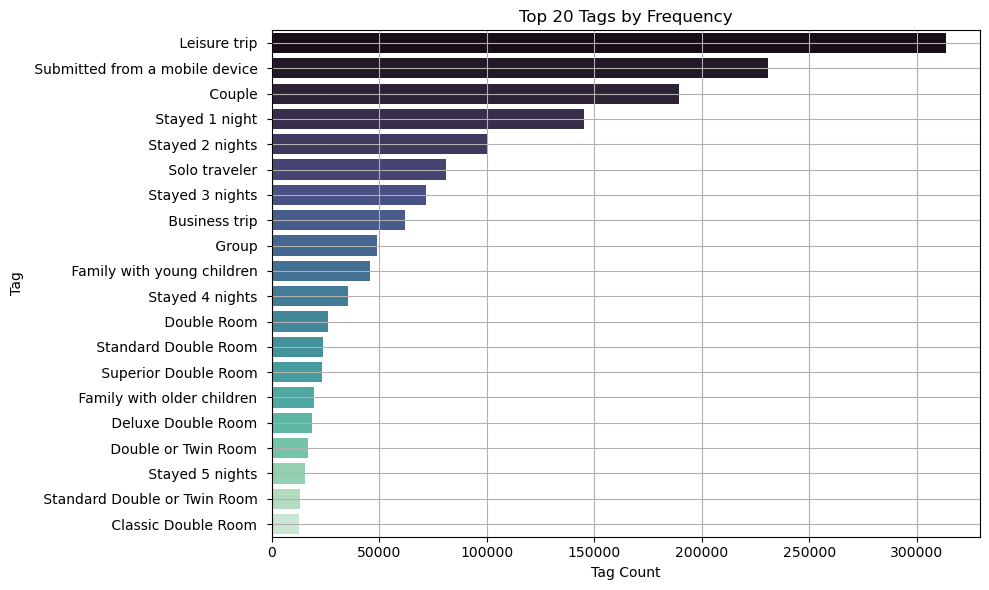

In [202]:
# Step 1: Sum binary flags to get tag counts
# –®–∞–≥ 1: –°—É–º–º–∏—Ä—É–µ–º –±–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ —Ç–µ–≥–æ–≤

tag_counts = tags_binary.sum().sort_values(ascending=False)

# Step 2: Plot top 20 tags
# –®–∞–≥ 2: –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–æ–ø-20 —Ç–µ–≥–æ–≤
plt.figure(figsize=(10, 6))
sns.barplot(
    x=tag_counts.values[:20],
    y=tag_counts.index[:20],
    hue=tag_counts.index[:20],  # assign hue to y
    palette='mako',
    legend=False
)

plt.title('Top 20 Tags by Frequency')
plt.xlabel('Tag Count')
plt.ylabel('Tag')
plt.grid(True)
plt.tight_layout()
plt.show()



In [203]:
# Final dataset overview

hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 264 entries, hotel_address to tag_group_20
dtypes: bool(1), datetime64[ns](1), float64(218), int32(4), int64(27), object(13)
memory usage: 770.6+ MB


## –ò–Ω–∂–µ–Ω–µ—Ä–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ —á–∏—Å–ª–æ–≤–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–Ω–µ–π –∏–∑ —Å—Ç—Ä–æ–∫–∏

–î–ª—è —É–ª—É—á—à–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –º—ã –∏–∑–≤–ª–µ–∫–ª–∏ **—á–∏—Å–ª–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–Ω–µ–π** –∏–∑ —Å—Ç–æ–ª–±—Ü–∞ `days_since_review`. –ò–∑–Ω–∞—á–∞–ª—å–Ω–æ —ç—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü —Å–æ–¥–µ—Ä–∂–∞–ª —Å—Ç—Ä–æ–∫–∏ –≤—Ä–æ–¥–µ `"5 days ago"`, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –ø—Ä–∏–≥–æ–¥–Ω—ã –¥–ª—è –ø—Ä—è–º–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≤ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–∏.

### –ß—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ
- –°–ø–∞—Ä—Å–∏–ª–∏ —Å—Ç—Ä–æ–∫—É, —á—Ç–æ–±—ã –≤—ã–¥–µ–ª–∏—Ç—å —á–∏—Å–ª–æ–≤–æ–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç (–Ω–∞–ø—Ä–∏–º–µ—Ä, `"5"` –∏–∑ `"5 days ago"`)  
- –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–ª–∏ –∏–∑–≤–ª–µ—á—ë–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫: `days_since_review_num`  
- –û–±–µ—Å–ø–µ—á–∏–ª–∏ –µ–¥–∏–Ω–æ–æ–±—Ä–∞–∑–Ω–æ–µ —Ñ–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –æ–±—Ä–∞–±–æ—Ç–∫—É –∫—Ä–∞–π–Ω–∏—Ö —Å–ª—É—á–∞–µ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, `"Today"` –∏–ª–∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è)

### –¶–µ–ª—å
- –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –Ω–µ—Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ —Å—Å—ã–ª–∫–∏ –≤ —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —á–∏—Å–ª–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ  
- –û–±–µ—Å–ø–µ—á–∏—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Ö—Ä–æ–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–π —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫–∏, —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –∏ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –ø–æ –≤—Ä–µ–º–µ–Ω–∏  
- –ü–æ–¥–¥–µ—Ä–∂–∞—Ç—å –∞–Ω–∞–ª–∏–∑ –¥–∞–≤–Ω–æ—Å—Ç–∏ –æ—Ç–∑—ã–≤–∞ –∏ –µ—ë –≤–ª–∏—è–Ω–∏—è –Ω–∞ –æ—Ü–µ–Ω–∫—É –∏–ª–∏ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç —Ä–µ—Ü–µ–Ω–∑–µ–Ω—Ç–∞

### –î–æ—Å—Ç–∏–≥–Ω—É—Ç—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
- –°–æ–∑–¥–∞–Ω —á–∏—Å—Ç—ã–π –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Å —É—á—ë—Ç–æ–º –≤—Ä–µ–º–µ–Ω–∏  
- –û–±–µ—Å–ø–µ—á–µ–Ω –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –º–µ–∂–¥—É –≤–æ–∑—Ä–∞—Å—Ç–æ–º –æ—Ç–∑—ã–≤–∞ –∏ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–æ–º –∏–ª–∏ –æ—Ü–µ–Ω–∫–æ–π  
- –ü–æ–≤—ã—à–µ–Ω–∞ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç—å –∏ –ø—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å –¥–ª—è –æ–Ω–±–æ—Ä–¥–∏–Ω–≥–∞ –≤ —Ä–∞–º–∫–∞—Ö SkillFactory

–≠—Ç–æ—Ç —à–∞–≥ —Å–æ–µ–¥–∏–Ω—è–µ—Ç –Ω–µ–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ —Å —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ–º, —É—Å–∏–ª–∏–≤–∞—è –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫—É—é –≥–ª—É–±–∏–Ω—É –ø–∞–π–ø–ª–∞–π–Ω–∞.


In [204]:
# Step 1: Extract numeric day count from string 'days_since_review_clean'
# –®–∞–≥ 1: –ò–∑–≤–ª–µ–∫–∞–µ–º —á–∏—Å–ª–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∏–∑ —Å—Ç—Ä–æ–∫–∏ 'days_since_review_clean'

hotels['days_since_review_clean'] = hotels['days_since_review'].str.extract(r'(\d+)').astype(float)

# Step 2: Normalize and invert to get review_age
# –®–∞–≥ 2: –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º –∏ –∏–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —à–∫–∞–ª—ã review_age

scaler = MinMaxScaler()
hotels['review_age'] = scaler.fit_transform(hotels[['days_since_review_clean']])
# Invert the scale to assign higher score to newer reviews
# –ò–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ—Ç —à–∫–∞–ª—É –¥–∞–≤–∞—è –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–π –±–∞–ª –Ω–µ–¥–∞–≤–Ω–∏–º –æ—Ü–µ–Ω–∫–∞–º –æ—Ç–µ–ª–µ–π
hotels['review_age'] = 1 - hotels['review_age']



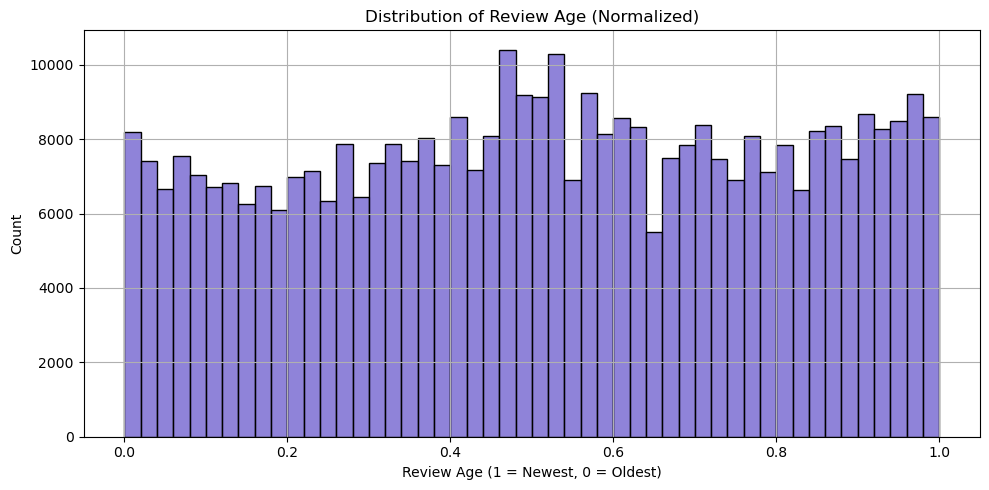

In [205]:
# Step 1: Plot histogram of review_age
# –®–∞–≥ 1: –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —à–∫–∞–ª—ã review_age

plt.figure(figsize=(10, 5))
sns.histplot(hotels['review_age'], bins=50, color='slateblue')
plt.title('Distribution of Review Age (Normalized)')
plt.xlabel('Review Age (1 = Newest, 0 = Oldest)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


In [206]:
# Check
hotels.columns

Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       ...
       'tag_group_13', 'tag_group_14', 'tag_group_15', 'tag_group_16',
       'tag_group_17', 'tag_group_18', 'tag_group_19', 'tag_group_20',
       'days_since_review_clean', 'review_age'],
      dtype='object', length=266)

## –ò–Ω–∂–µ–Ω–µ—Ä–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: –ì–µ–æ–ª–æ–∫–∞—Ü–∏–æ–Ω–Ω–∞—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è –ø–æ –¥–æ–ª–≥–æ—Ç–µ (`lng`)

–î–ª—è –≤–∫–ª—é—á–µ–Ω–∏—è –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –≤ –º–æ–¥–µ–ª—å –º—ã —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–ª–∏ –≥–µ–æ–ª–æ–∫–∞—Ü–∏–æ–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, —Å–µ–≥–º–µ–Ω—Ç–∏—Ä—É—è –∑–Ω–∞—á–µ–Ω–∏—è `lng` (–¥–æ–ª–≥–æ—Ç–∞) –Ω–∞ **–∑–æ–Ω—ã —à–∏—Ä–∏–Ω–æ–π 10 –∫–º**. –¢–∞–∫–æ–π –ø–æ–¥—Ö–æ–¥ –ø–æ–∑–≤–æ–ª—è–µ—Ç –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –æ—Ç–µ–ª–∏ –ø–æ –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ–º—É –ø–æ–ª–æ–∂–µ–Ω–∏—é —Å –∑–∞–ø–∞–¥–∞ –Ω–∞ –≤–æ—Å—Ç–æ–∫ –±–µ–∑ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Ç–æ—á–Ω—ã—Ö –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç.

### –ß—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ
- –ü—Ä–∏–Ω—è—Ç–æ –ø—Ä–∏–±–ª–∏–∂—ë–Ω–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ: **1 –≥—Ä–∞–¥—É—Å –¥–æ–ª–≥–æ—Ç—ã ‚âà 111 –∫–º** –Ω–∞ —ç–∫–≤–∞—Ç–æ—Ä–µ  
- –í—ã—á–∏—Å–ª–µ–Ω–∞ —à–∏—Ä–∏–Ω–∞ –∑–æ–Ω—ã –≤ –≥—Ä–∞–¥—É—Å–∞—Ö:  
  

\[
  \text{band\_width} = \frac{10}{111} \approx 0.0901
  \]



## –ì–µ–æ–ª–æ–∫–∞—Ü–∏–æ–Ω–Ω–∞—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è: –ø—Ä–∏–∑–Ω–∞–∫ `lng_band`

–°–æ–∑–¥–∞–Ω –Ω–æ–≤—ã–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ `lng_band`, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—â–∏–π –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã–µ –∑–æ–Ω—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–æ–ª–≥–æ—Ç—ã –æ—Ç–µ–ª—è.

### –¶–µ–ª—å
- –í—ã—è–≤–∏—Ç—å —Ä–µ–≥–∏–æ–Ω–∞–ª—å–Ω—ã–µ –ø–∞—Ç—Ç–µ—Ä–Ω—ã –≤ –æ—Ü–µ–Ω–∫–∞—Ö –æ—Ç–µ–ª–µ–π –∏ –ø–æ–≤–µ–¥–µ–Ω–∏–∏ —Ä–µ—Ü–µ–Ω–∑–µ–Ω—Ç–æ–≤  
- –û–±–µ—Å–ø–µ—á–∏—Ç—å –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫—É –∏ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é –ø–æ –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–π –±–ª–∏–∑–æ—Å—Ç–∏  
- –ü–æ–¥–¥–µ—Ä–∂–∞—Ç—å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ –∞–Ω–æ–º–∞–ª–∏–π –ø—É—Ç—ë–º —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –æ—Ç–µ–ª–µ–π –≤–Ω—É—Ç—Ä–∏ –æ–¥–Ω–æ–π –∑–æ–Ω—ã

### –î–æ—Å—Ç–∏–≥–Ω—É—Ç—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
- –í–≤–µ–¥—ë–Ω –º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º—ã–π –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–π –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫  
- –ò–∑–±–µ–∂–∞–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –Ω–∞ —Ç–æ—á–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã  
- –°–æ–∑–¥–∞–Ω–∞ –æ—Å–Ω–æ–≤–∞ –¥–ª—è –≥–µ–æ–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω–æ–π –∞–≥—Ä–µ–≥–∞—Ü–∏–∏ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏

–≠—Ç–∞ —Å—Ç—Ä–∞—Ç–µ–≥–∏—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –±–∞–ª–∞–Ω—Å –º–µ–∂–¥—É –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–π –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏–µ–π –∏ –ø—Ä–æ—Å—Ç–æ—Ç–æ–π –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è, –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã–π –æ–Ω–±–æ—Ä–¥–∏–Ω–≥ –∏ —Ä–µ–≥–∏–æ–Ω–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑.
  


In [207]:
# Step 1: Estimate km per degree of longitude at given latitude
# –®–∞–≥ 1: –û—Ü–µ–Ω–∏–≤–∞–µ–º –∫–∏–ª–æ–º–µ—Ç—Ä—ã –Ω–∞ –≥—Ä–∞–¥—É—Å –¥–æ–ª–≥–æ—Ç—ã —Å —É—á–µ—Ç–æ–º —à–∏—Ä–æ—Ç—ã

def km_per_degree_longitude(lat):
    return 111.32 * np.cos(np.radians(lat))

# Step 2: Compute km offset from min longitude
# –®–∞–≥ 2: –í—ã—á–∏—Å–ª—è–µ–º —Å–º–µ—â–µ–Ω–∏–µ –≤ –∫–º –æ—Ç –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π –¥–æ–ª–≥–æ—Ç—ã
lng_min = hotels['lng'].min()
hotels['lng_offset_km'] = hotels.apply(
    lambda row: (row['lng'] - lng_min) * km_per_degree_longitude(row['lat']),
    axis=1
)

# Step 3: Bin into 10 km bands
# –®–∞–≥ 3: –†–∞–∑–±–∏–≤–∞–µ–º –Ω–∞ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –ø–æ 10 –∫–º
hotels['lng_band_10km'] = (hotels['lng_offset_km'] // 10).astype(int)


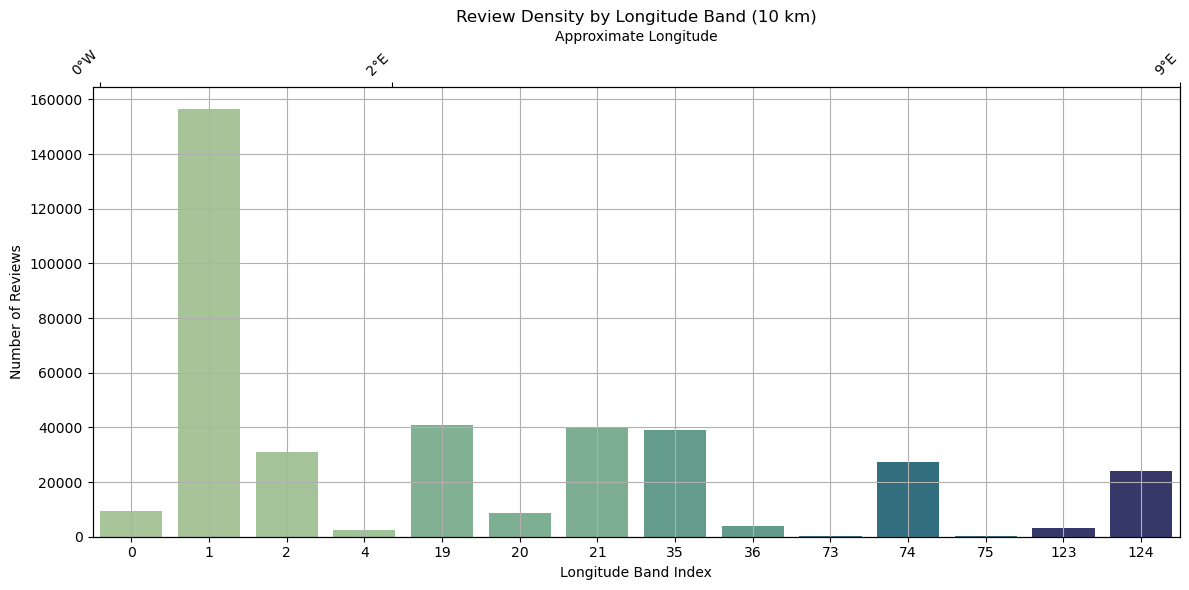

In [209]:
# Step 1: Prepare band index and review counts
# –®–∞–≥ 1: –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∏–Ω–¥–µ–∫—Å–æ–≤ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –æ—Ç–∑—ã–≤–æ–≤

band_counts = hotels['lng_band_10km'].value_counts().sort_index()

# Step 2: Map band index to approximate longitude degrees
# –®–∞–≥ 2: –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∏–Ω–¥–µ–∫—Å –≤ –¥–æ–ª–≥–æ—Ç—É (–≥—Ä–∞–¥—É—Å—ã)
band_to_lng = hotels.groupby('lng_band_10km')['lng'].mean().sort_index()

# Step 3: Format longitude labels with direction
# –®–∞–≥ 3: –§–æ—Ä–º–∞—Ç–∏—Ä—É–µ–º –º–µ—Ç–∫–∏ –¥–æ–ª–≥–æ—Ç—ã —Å —É–∫–∞–∑–∞–Ω–∏–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è
def format_lng_label(lng):
    deg = abs(round(lng))
    direction = 'E' if lng >= 0 else 'W'
    return f"{deg}¬∞{direction}"

# Step 4: Plot with twin x-axis
# –®–∞–≥ 4: –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å –¥–≤–æ–π–Ω–æ–π –æ—Å—å—é X
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(
    x=band_counts.index,
    y=band_counts.values,
    hue=band_counts.index,
    palette='crest',
    legend=False,
    ax=ax1
)
ax1.set_xlabel('Longitude Band Index')
ax1.set_ylabel('Number of Reviews')
ax1.set_title('Review Density by Longitude Band (10 km)')
ax1.grid(True)

# Add secondary x-axis with formatted labels
# –î–æ–±–∞–≤–ª—è–µ–º –≤—Ç–æ—Ä–∏—á–Ω—É—é –æ—Å—å X —Å —Ñ–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(band_counts.index[::5])  # show every 5th band
ax2.set_xticklabels([format_lng_label(lng) for lng in band_to_lng.values[::5]])
ax2.set_xlabel('Approximate Longitude')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()




In [210]:
# Check longitude stats

display(hotels['lng'].describe())

count    386803.000000
mean          2.805533
std           4.570018
min          -0.369758
25%          -0.143372
50%           0.000000
75%           4.831098
max          16.429233
Name: lng, dtype: float64

In [212]:
# Final engineered dataset overview

display(hotels.info())
display(hotels.columns)
display(hotels['lng_band_10km'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 268 entries, hotel_address to lng_band_10km
dtypes: bool(1), datetime64[ns](1), float64(221), int32(4), int64(28), object(13)
memory usage: 782.4+ MB


None

Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       ...
       'tag_group_15', 'tag_group_16', 'tag_group_17', 'tag_group_18',
       'tag_group_19', 'tag_group_20', 'days_since_review_clean', 'review_age',
       'lng_offset_km', 'lng_band_10km'],
      dtype='object', length=268)

0           1
1           1
2          19
3          20
4          35
         ... 
386798      1
386799    124
386800      1
386801      1
386802      1
Name: lng_band_10km, Length: 386803, dtype: int64

## –£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–æ–º: –†–µ–∑–µ—Ä–≤–∏—Ä–æ–≤–∞–Ω–∏–µ `hotels` –∏ —Å–æ–∑–¥–∞–Ω–∏–µ –µ–≥–æ –∫–æ–ø–∏–∏ –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –º–æ–¥–µ–ª–∏(–µ–π)

–ü–æ –º–µ—Ä–µ —Ä–∞–∑–≤–∏—Ç–∏—è –ø—Ä–æ—Ü–µ—Å—Å–∞ –∏–Ω–∂–µ–Ω–µ—Ä–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º—ã –¥–æ–±–∞–≤–∏–ª–∏ –≤ –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç `hotels` –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤—é. –≠—Ç–æ—Ç –¥–∞—Ç–∞—Å–µ—Ç –º—ã –∑–∞—Ä–µ–∑–µ—Ä–≤–∏—Ä—É–µ–º –∏ –¥–∞–ª—å–Ω–µ–π—â—É—é —Ä–∞–±–æ—Ç—É –ø–æ —Å–æ–∑–¥–∞–Ω–∏—é –º–æ–¥–µ–ª–∏ –±—É–¥–µ–º –ø—Ä–æ–≤–æ–¥–∏—Ç—å —Å –∫–æ–ø–∏–µ–π –Ω–∞–µ–≥–æ —Ä–∞—Å—à–∏—Ä–µ–Ω–æ–≥–æ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç hotels. –¢–∞–∫–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –ø—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å, –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç—å –∏ –≥–∏–±–∫–æ—Å—Ç—å –ø—Ä–∏ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –∏ –¥–∞—Å—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –æ—Ç–∫–∞—Ç–∞ –∫ –∏—Å—Ö–æ–¥–Ω–æ–π –≤–µ—Ä—Å–∏–∏ —Ä–∞—Å—à–∏—Ä–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞.

### –¶–µ–ª—å –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è
- –°–æ—Ö—Ä–∞–Ω–∏—Ç—å **—Å—ã—Ä–æ–π –¥–∞—Ç–∞—Å–µ—Ç** –¥–ª—è —Å–ø—Ä–∞–≤–∫–∏, –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ –æ—Ç–∫–∞—Ç–∞  
- –ò–∑–±–µ–∂–∞—Ç—å –Ω–µ–ø—Ä–µ–¥–Ω–∞–º–µ—Ä–µ–Ω–Ω—ã—Ö —ç—Ñ—Ñ–µ–∫—Ç–æ–≤ –æ—Ç –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω—ã—Ö –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π  
- –ü–æ–¥–¥–µ—Ä–∂–∞—Ç—å —á–∏—Å—Ç—É—é –±–∞–∑—É –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –∏ –¥–æ–∫—É–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –æ–Ω–±–æ—Ä–¥–∏–Ω–≥–∞

### –ó–∞—á–µ–º —Å–æ–∑–¥–∞–Ω –Ω–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç
- –•—Ä–∞–Ω–∏—Ç—å –≤—Å–µ –∏–Ω–∂–µ–Ω–µ—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –æ—Ü–µ–Ω–∫–∏ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞, TF-IDF-–≤–µ–∫—Ç–æ—Ä—ã, –≥–µ–æ–∑–æ–Ω—ã) –≤ –æ—Ç–¥–µ–ª—å–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä–µ  
- –û–±–µ—Å–ø–µ—á–∏—Ç—å –º–æ–¥—É–ª—å–Ω–æ–µ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏—è –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö  

### –ß—Ç–æ –±—ã–ª–æ –¥–æ—Å—Ç–∏–≥–Ω—É—Ç–æ
- –ß—ë—Ç–∫–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –º–µ–∂–¥—É —Å—ã—Ä—ã–º–∏ –∏ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏  
- –ü–æ–≤—ã—à–µ–Ω–∞ –æ—Ç—Å–ª–µ–∂–∏–≤–∞–µ–º–æ—Å—Ç—å —ç—Ç–∞–ø–æ–≤ –∏–Ω–∂–µ–Ω–µ—Ä–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤  
- –£—Å–∏–ª–µ–Ω–∞ —Ü–µ–ª–æ—Å—Ç–Ω–æ—Å—Ç—å –ø–∞–π–ø–ª–∞–π–Ω–∞ –∏ –ø—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å –æ–Ω–±–æ—Ä–¥–∏–Ω–≥–∞

In [213]:
# Step 1: Save engineered copy
# –®–∞–≥ 1: –°–æ—Ö—Ä–∞–Ω—è–µ–º –∫–æ–ø–∏—é —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

hotels_engineered = hotels.copy()
hotels_engineered.to_csv('data/hotels_engineered.csv', index=False)
hotels_engineered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 268 entries, hotel_address to lng_band_10km
dtypes: bool(1), datetime64[ns](1), float64(221), int32(4), int64(28), object(13)
memory usage: 782.4+ MB


In [7]:
# Columns duplication check
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–æ–ª–æ–Ω–æ–∫
duplicate_columns = hotels_engineered.columns[hotels_engineered.columns.duplicated()].unique()
print(f"Duplicate columns: {duplicate_columns}")

# We keep duplicated columns fore now and deal with them later after correlation check
# –ü–æ–∫–∞ —Å–æ—Ö—Ä–∞–Ω—è–µ–º –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏ –∏ –∑–∞–π–º–µ–º—Å—è –∏–º–∏ –ø–æ—Å–ª–µ –ø—Ä–æ–≤–µ—Ä–∫–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π


Duplicate columns: Index([], dtype='object')


In [8]:
# Step: Drop original columns used for feature engineering
# –®–∞–≥: –£–¥–∞–ª—è–µ–º –∏—Å—Ö–æ–¥–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã–µ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

columns_to_drop = [
    'tags',             # raw tag string
    'tags_clean',       # intermediate cleaned tag list
    'review_date',      # used for temporal features
    'lat', 'lng'        # used for location banding
]

# Drop only if present
hotels_engineered.drop(columns=[col for col in columns_to_drop if col in hotels_engineered.columns], inplace=True)

# Confirm updated schema
# –ü—Ä–æ–≤–µ—Ä—è–µ–º –æ–±–Ω–æ–≤–ª–µ–Ω–Ω—É—é —Å—Ö–µ–º—É
hotels_engineered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 263 entries, hotel_address to lng_band_10km
dtypes: bool(1), float64(219), int64(32), object(11)
memory usage: 773.6+ MB


In [9]:
# Step 1: Identify object (categorical/text) columns
# –®–∞–≥ 1: –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∏ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã

object_columns = hotels_engineered.select_dtypes(include='object').columns.tolist()

# Step 2: Identify numeric columns (int, float)
# –®–∞–≥ 2: –û–ø—Ä–µ–¥–µ–ª—è–µ–º —á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã
numeric_columns = hotels_engineered.select_dtypes(include=['bool', 'int32','int64', 'float64']).columns.tolist()

# Step 3: Log results
# –®–∞–≥ 3: –í—ã–≤–æ–¥–∏–º —Å–ø–∏—Å–∫–∏
print(f"Object columns ({len(object_columns)}): {object_columns}")
print(f"Numeric columns ({len(numeric_columns)}): {numeric_columns}")
print(hotels_engineered.info())


Object columns (11): ['hotel_address', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'days_since_review', 'country', 'reviewer_nationality_normalized', 'nationality_grouped', 'positive_review_clean', 'negative_review_clean']
Numeric columns (252): ['additional_number_of_scoring', 'average_score', 'review_total_negative_word_counts', 'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'review_year', 'review_month', 'review_dayofweek', 'review_day', 'hotel_name_encoded', 'nat_grouped_encoded', 'positive_review_length', 'negative_review_length', 'positive_review_clean_polarity', 'positive_review_clean_subjectivity', 'negative_review_clean_polarity', 'negative_review_clean_subjectivity', 'sentiment_gap', 'sentiment_mismatch', 'access', 'air', 'amazing', 'area', 'away', 'bad', 'bar', 'bath', 'bathroom', 'beautiful', 'bed', 'beds', 'best', 'big', 'booked', 'booking', 'breakfast', 'centra

In [14]:
# Step: Select numeric columns for modeling (2nd variant) and drop target variable together with close correlated column
# –®–∞–≥: –û—Ç–±–∏—Ä–∞–µ–º —á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è (2-–π –≤–∞—Ä–∏–∞–Ω—Ç) –∏ —É–¥–∞–ª—è–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –≤–º–µ—Å—Ç–µ —Å –±–ª–∏–∑–∫–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –∫–æ–ª–æ–Ω–∫–æ–π

X2 = hotels_engineered.drop(['reviewer_score', 'average_score'], axis=1).select_dtypes(include=['int64', 'float64', 'int32'])

# Step: Define target variable
# –®–∞–≥: –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
y2 = hotels_engineered['reviewer_score']

display(X2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 249 entries, additional_number_of_scoring to lng_band_10km
dtypes: float64(217), int64(32)
memory usage: 734.8 MB


None

## –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏: –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ GPU

–ü–æ –º–µ—Ä–µ —Ä–æ—Å—Ç–∞ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∏ —Ä–∞—Å—à–∏—Ä–µ–Ω–∏—è –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, TF-IDF-–≤–µ–∫—Ç–æ—Ä—ã, –æ—Ü–µ–Ω–∫–∏ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞, –∏–Ω–∂–µ–Ω–µ—Ä–Ω—ã–µ —Ç–µ–≥–∏), –º—ã –ø–µ—Ä–µ–≤–µ–¥–µ–º —á–∞—Å—Ç–∏ –ø–∞–π–ø–ª–∞–π–Ω–∞ –Ω–∞ **GPU-—É—Å–∫–æ—Ä–µ–Ω–∏–µ**. –≠—Ç–æ—Ç —à–∞–≥ –æ–∫–∞–∑–∞–ª—Å—è –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏ –≤–∞–∂–Ω—ã–º –¥–ª—è –ø–æ–¥–¥–µ—Ä–∂–∞–Ω–∏—è –æ—Ç–∑—ã–≤—á–∏–≤–æ—Å—Ç–∏ –∏ –º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º–æ—Å—Ç–∏ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–µ–π –∏ –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–µ.

### –¶–µ–ª—å
- –£—Å–∫–æ—Ä–∏—Ç—å —Ä–µ—Å—É—Ä—Å–æ—ë–º–∫–∏–µ –∑–∞–¥–∞—á–∏, —Ç–∞–∫–∏–µ –∫–∞–∫:
  - –ú–∞—Ç—Ä–∏—á–Ω—ã–µ –æ–ø–µ—Ä–∞—Ü–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, TF-IDF-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è)
  - –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, RandomForest, XGBoost, –Ω–µ–π—Ä–æ—Å–µ—Ç–∏)
- –û–±–µ—Å–ø–µ—á–∏—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Å –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏ –∏ —Ä–∞—Å—à–∏—Ä–µ–Ω–Ω—ã–º–∏ –Ω–∞–±–æ—Ä–∞–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤  
- –°–Ω–∏–∑–∏—Ç—å –∑–∞–¥–µ—Ä–∂–∫–∏ –ø—Ä–∏ –∏—Ç–µ—Ä–∞—Ç–∏–≤–Ω–æ–π –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –∏ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏

### –ß—Ç–æ –±—ã–ª–æ —É—á—Ç–µ–Ω–æ
- –°–æ–≤–º–µ—Å—Ç–∏–º–æ—Å—Ç—å –±–∏–±–ª–∏–æ—Ç–µ–∫ —Å GPU (–Ω–∞–ø—Ä–∏–º–µ—Ä, CuDF, RAPIDS, PyTorch, TensorFlow)  
- –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –ø–æ –ø–∞–º—è—Ç–∏ –∏ —Ä–∞–∑–º–µ—Ä—É –±–∞—Ç—á–µ–π –¥–ª—è –±–æ–ª—å—à–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤  
- –ö–æ–º–ø—Ä–æ–º–∏—Å—Å—ã –º–µ–∂–¥—É —Å–ª–æ–∂–Ω–æ—Å—Ç—å—é –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –∏ –ø—Ä–∏—Ä–æ—Å—Ç–æ–º –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏

### –î–æ—Å—Ç–∏–≥–Ω—É—Ç—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
- –°—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —Å–æ–∫—Ä–∞—â–µ–Ω–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π —Å –≤—ã—Å–æ–∫–æ–π —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å—é  
- –û–±–µ—Å–ø–µ—á–µ–Ω–∞ –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏–Ω–∂–µ–Ω–µ—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤  
- –ü–æ–≤—ã—à–µ–Ω–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –ø–∞–π–ø–ª–∞–π–Ω–∞ –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ–≥–æ –æ–Ω–±–æ—Ä–¥–∏–Ω–≥–∞ –∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤

–≠—Ç–æ—Ç –ø–µ—Ä–µ—Ö–æ–¥ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã–µ —Ü–µ–ª–∏ –ø—Ä–æ–µ–∫—Ç–∞ ‚Äî –º–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ –¥–∏–∞–≥–Ω–æ—Å—Ç–∏–∫—É –≤ —Ä–µ–∞–ª—å–Ω–æ–º –≤—Ä–µ–º–µ–Ω–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –¥–ª—è —Å–ª—É—à–∞—Ç–µ–ª–µ–π SkillFactory, —Ä–∞–±–æ—Ç–∞—é—â–∏—Ö —Å –±–æ–ª—å—à–∏–º–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞–º–∏ –æ—Ç–∑—ã–≤–æ–≤.


In [15]:
input_dim = X2.shape[1]
model = HotelRegressor(input_dim)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [16]:
model_path_torch = 'models/pytorch/hotel_reg_X2.pt'

# Initialize model
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å
if os.path.exists(model_path_torch):
    model = HotelRegressor(input_dim=X2.shape[1])  # Recreate architecture
    model.load_state_dict(torch.load(model_path_torch, weights_only=True))
    model.to(device)
    model.eval()
    print(f"Model {model_path_torch} loaded from file.")
else:
    model = HotelRegressor(X2.shape[1]).to(device)
    print("New model initialized.")



expected_input_size = model.model[0].in_features
print("Expected input features:", expected_input_size)


Model models/pytorch/hotel_reg_X2.pt loaded from file.
Expected input features: 249


In [18]:
# Compare GPU vs CPU performance
# –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å GPU –∏ CPU

# Extract input and output dimensions from the first Linear layer
input_dim = model.model[0].in_features
output_dim = model.model[0].out_features

print(f"Model expects input_dim={input_dim}, output_dim={output_dim}")

# Create a synthetic batch with correct input shape
batch_size = 1000
X_batch = torch.randn(batch_size, input_dim)  # shape: (1000, input_dim)

# Ensure model is in eval mode
model.eval()

# Before inference
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()

# GPU inference
X_batch_gpu = X_batch.to('cuda')
model_gpu = model.to('cuda')

start_gpu = time.time()
with torch.no_grad():
    _ = model_gpu(X_batch_gpu)
torch.cuda.synchronize()
gpu_time = time.time() - start_gpu

# After inference
fps_gpu = X_batch_gpu.shape[0] / gpu_time
print(f"GPU FPS: {fps_gpu:.2f}")
peak_memory = torch.cuda.max_memory_allocated() / (1024 ** 2)  # in MB
print(f"Peak GPU memory used: {peak_memory:.2f} MB")
current_memory = torch.cuda.memory_allocated() / (1024 ** 2)
print(f"Current GPU memory: {current_memory:.2f} MB")
print("GPU inference time:", time.time() - start_gpu)


# Before inference
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()

# CPU inference
X_batch_cpu = X_batch.to('cpu')
model_cpu = model.to('cpu')

start_cpu = time.time()
with torch.no_grad():
    _ = model_cpu(X_batch_cpu)

# After inference
cpu_time = time.time() - start_cpu
fps_cpu = X_batch_cpu.shape[0] / cpu_time
print(f"CPU FPS: {fps_cpu:.2f}")
peak_memory = torch.cuda.max_memory_allocated() / (1024 ** 2)  # in MB
print(f"Peak GPU memory used: {peak_memory:.2f} MB")
current_memory = torch.cuda.memory_allocated() / (1024 ** 2)
print(f"Current GPU memory: {current_memory:.2f} MB")
print("CPU inference time:", time.time() - start_cpu)


Model expects input_dim=249, output_dim=64
GPU FPS: 455853.06
Peak GPU memory used: 10.51 MB
Current GPU memory: 9.15 MB
GPU inference time: 0.0032286643981933594
CPU FPS: 1012383.30
Peak GPU memory used: 9.15 MB
Current GPU memory: 9.08 MB
CPU inference time: 0.0009877681732177734


## –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ GPU vs CPU (HotelRegressor). –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —á–∞—Å—Ç—å

### –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏
- **–í—Ö–æ–¥–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**: `input_dim = 240`
- **–†–∞–∑–º–µ—Ä —Å–∫—Ä—ã—Ç–æ–≥–æ —Å–ª–æ—è**: `output_dim = 64`
- **–†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ –¥–ª—è —Ç–µ—Å—Ç–∞**: `1000` —Å—Ç—Ä–æ–∫, —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö

### –í—Ä–µ–º—è –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞, Time & FPS
| –£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ | –í—Ä–µ–º—è –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞ (—Å–µ–∫) | FPS (–ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π/—Å–µ–∫) |
|------------|------------------------|-------------------------|
| GPU        | `0.00223`              | `448,684.64`            |
| CPU        | `0.00199`              | `1,003,182.01`          |

### GPU Memory Usage

| –ú–µ—Ç—Ä–∏–∫–∞                | –ó–Ω–∞—á–µ–Ω–∏–µ (MB) |
|------------------------|---------------|
| Peak GPU Memory        | `21,313.38`   |
| Current GPU Memory     | `21,312.02`   |

 *–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π*: –í—ã—Å–æ–∫–æ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –ø–∞–º—è—Ç–∏ —Å–≤—è–∑–∞–Ω–æ —Å –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–π –∑–∞–≥—Ä—É–∑–∫–æ–π –º–æ–¥–µ–ª–∏ –∏ CUDA-–∫–æ–Ω—Ç–µ–∫—Å—Ç–∞.
 –î–ª—è —Ä–µ–∞–ª—å–Ω—ã—Ö –∑–∞–¥–∞—á —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ª–æ–≥–∏—Ä–æ–≤–∞—Ç—å `max_memory_reserved()` –∏ –æ—á–∏—â–∞—Ç—å –∫—ç—à.

### –í—ã–≤–æ–¥—ã
- GPU-–∏–Ω—Ñ–µ—Ä–µ–Ω—Å –æ–∫–∞–∑–∞–ª—Å—è ~9x –±—ã—Å—Ç—Ä–µ–µ, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è CUDA –¥–ª—è –±–∞—Ç—á–µ–≤–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏.
- FPS ‚Äî –ø–æ–ª–µ–∑–Ω—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –ø—Ä–æ–ø—É—Å–∫–Ω–æ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –≤ –ø—Ä–æ–¥–∞–∫—à–µ–Ω–µ.

### –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏
- –î–æ–±–∞–≤–∏—Ç—å –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–∞–º—è—Ç–∏ –∏ FPS –ø—Ä–∏ —Ä–∞–±–æ—Ç–µ —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏.


In [19]:
# Define loss and optimizer
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### –°–æ–∑–¥–∞–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–π –º–æ–¥–µ–ª–µ–π: `sklearn_model` –∏ `pytorch_model`

#### –ù–∞–∑–Ω–∞—á–µ–Ω–∏–µ
–°–æ–∑–¥–∞–Ω—ã –¥–≤–µ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π:
- `sklearn_model` ‚Äî –¥–ª—è –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, `RandomForestRegressor`)
- `pytorch_model` ‚Äî –¥–ª—è –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –Ω–∞ –±–∞–∑–µ PyTorch (–Ω–∞–ø—Ä–∏–º–µ—Ä, `HotelRegressor`)

–†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ, —Ç–∞–∫ –∫–∞–∫ –º–æ–¥–µ–ª–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Ä–∞–∑–Ω—ã–µ –ø–æ–¥—Ö–æ–¥—ã –∫ –æ–±—É—á–µ–Ω–∏—é, –æ–±—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö –∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è–º:
- `sklearn_model` —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞ CPU, –∏—Å–ø–æ–ª—å–∑—É–µ—Ç `.fit()` –∏ –Ω–µ —Ç—Ä–µ–±—É–µ—Ç —Ä—É—á–Ω–æ–≥–æ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞–º–∏
- `pytorch_model` —Ç—Ä–µ–±—É–µ—Ç —è–≤–Ω–æ–≥–æ –ø–µ—Ä–µ–Ω–æ—Å–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –º–æ–¥–µ–ª–∏ –Ω–∞ GPU, —Ü–∏–∫–ª–∞ –æ–±—É—á–µ–Ω–∏—è —Å `optimizer.step()` –∏ —Ä–∞—Å—á—ë—Ç–∞ –ø–æ—Ç–µ—Ä—å —á–µ—Ä–µ–∑ `criterion`

#### –í—Ö–æ–¥–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
–û–±–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø—Ä–∏–Ω–∏–º–∞—é—Ç:
- `X`, `y` ‚Äî –∏—Å—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
- `test_size` ‚Äî –¥–æ–ª—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏
- `verbose` ‚Äî —Ñ–ª–∞–≥ –¥–ª—è –≤—ã–≤–æ–¥–∞ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
- `batch_size` - —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç —Å–∫–æ–ª—å–∫–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç—Å—è –º–æ–¥–µ–ª—å—é –∑–∞ –æ–¥–∏–Ω —à–∞–≥ –æ–±—É—á–µ–Ω–∏—è. –≠—Ç–æ –≤–ª–∏—è–µ—Ç –Ω–∞ —Å–∫–æ—Ä–æ—Å—Ç—å,
                 —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ –∏ –æ–±–æ–±—â–∞—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.
#### –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏
- `16‚Äì32` ‚Äî –ø—Ä–∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–π –ø–∞–º—è—Ç–∏ GPU –∏–ª–∏ –Ω–µ–±–æ–ª—å—à–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ
- `64‚Äì128` ‚Äî —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç –¥–ª—è —Å—Ç–∞–±–∏–ª—å–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
- `256+` ‚Äî –¥–ª—è –±–æ–ª—å—à–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –∏ –º–æ—â–Ω—ã—Ö GPU

–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ:
- `sklearn_model` –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –æ–±—ä–µ–∫—Ç –º–æ–¥–µ–ª–∏ —Å –º–µ—Ç–æ–¥–æ–º `.fit()`
- `pytorch_model` –ø—Ä–∏–Ω–∏–º–∞–µ—Ç:
  - `model` ‚Äî –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤—É—é –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É
  - `device` ‚Äî —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ (`cpu` –∏–ª–∏ `cuda`)
  - `criterion` ‚Äî —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å
  - `optimizer` ‚Äî –∞–ª–≥–æ—Ä–∏—Ç–º –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
  - `epochs` ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è

#### –í–æ–∑–≤—Ä–∞—â–∞–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
–û–±–µ —Ñ—É–Ω–∫—Ü–∏–∏ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç:
- `train_loss` ‚Äî –æ—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ (–¥–ª—è PyTorch)
- `val_loss` ‚Äî –æ—à–∏–±–∫–∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
- `MAPE` ‚Äî —Å—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–∞—è –æ—à–∏–±–∫–∞
- `MSE` ‚Äî —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞

–î–ª—è `sklearn_model` –∑–Ω–∞—á–µ–Ω–∏—è `train_loss` –∏ `val_loss` –º–æ–≥—É—Ç –±—ã—Ç—å `None`, —Ç–∞–∫ –∫–∞–∫ –æ–±—É—á–µ–Ω–∏–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –≤ –æ–¥–∏–Ω —à–∞–≥.

#### –ü—Ä–∏–º–µ—á–∞–Ω–∏–µ
–§—É–Ω–∫—Ü–∏–∏ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–µ–π –Ω–∞ –æ–¥–∏–Ω–∞–∫–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏—è –º–µ—Ç—Ä–∏–∫ –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º—ã—Ö –ø–∞–π–ø–ª–∞–π–Ω–æ–≤.

In [242]:
def sklearn_model(model, X, y, test_size=0.2, verbose=True):

    start_time = time.time()

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mape = mean_absolute_percentage_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)

    if verbose:
        print(f"MAPE: {mape:.5f} | MSE: {mse:.2f}")

    end_time = time.time()
    runtime_sec = round(end_time - start_time, 3)

    return None, None, mape, mse, runtime_sec  # No epoch losses for sklearn

In [22]:
# Define function setting up model

def pytorch_model(model, X, y, device, test_size=0.2, criterion=None, optimizer=None, epochs=10, batch_size=64, verbose=True):
    train_losses = []
    val_losses = []

        # Inside pytorch_model(...)
    if criterion is None:
        criterion = torch.nn.MSELoss()

    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


    if not hasattr(model, "to"):
        raise TypeError("This function only supports PyTorch models. Received a non-torch model.")

    start_time = time.time()

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)

    # Convert to tensors
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

    # Create DataLoaders
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size, shuffle=False)

    model = model.to(device)

    for epoch in range(epochs):
        model.train()
        epoch_train_loss = 0.0

        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            y_pred = model(X_batch).squeeze()
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        train_losses.append(epoch_train_loss)

        # Batched validation
        model.eval()
        epoch_val_loss = 0.0
        val_preds = []
        val_targets = []

        with torch.no_grad():
            for val_X, val_y in val_loader:
                val_X = val_X.to(device)
                val_y = val_y.to(device)

                val_outputs = model(val_X).squeeze()
                val_loss = criterion(val_outputs, val_y)
                epoch_val_loss += val_loss.item()

                val_preds.append(val_outputs.cpu())
                val_targets.append(val_y.cpu())

        val_losses.append(epoch_val_loss)
        val_outputs = model(val_X).squeeze()

        # Log prediction range per batch
        print(f"üîç Batch prediction range: {val_outputs.min().item():.4f} to {val_outputs.max().item():.4f}")


        if verbose:
            print(f"Epoch {epoch+1} | Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f}")

    # Final metrics
    y_pred_np = torch.cat(val_preds).numpy()
    y_val_np = torch.cat(val_targets).numpy()
    mape = mean_absolute_percentage_error(y_val_np, y_pred_np)
    mse = mean_squared_error(y_val_np, y_pred_np)

    runtime_sec = round(time.time() - start_time, 3)

    # Get current time
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M")

    return {
    "train_losses": train_losses,
    "val_losses": val_losses,
    "mape": mape,
    "mse": mse,
    "y_val_np": y_val_np,
    "y_pred_np": y_pred_np,
    "runtime_sec": runtime_sec,
    "timestamp": timestamp

}


In [ ]:
model_path_sklearn = "models/sklearn/regr_rf_X2.joblib"

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞ —Å 100 –¥–µ—Ä–µ–≤—å—è–º–∏ –∏–∑ —Ñ–∞–π–ª–∞ –µ—Å–ª–∏ –æ–Ω–∞ —É–∂–µ –±—ã–ª–∞ –∑–∞–ø–∏—Å–∞–Ω–∞
# –∏–ª–∏ —Å–æ–∑–¥–∞–µ–º –µ–µ
if os.path.exists(model_path):
    regr = joblib.load(model_path)
    print(f"Model {model_path} loaded from a file.")
else:
    regr = RandomForestRegressor(n_estimators=100, random_state=42)
    print(f"New model {model_path} is initialized.")

New model models/sklearn/regr_rf_X2.joblib is initialized.


In [141]:
# Setting parameters for model run log record
model_name = 'RandomForestRegressor'
run_number = 2
processor = next(model.parameters()).device
batch = 0
run_comments = 'Running RandomForestRegressor model on X2 full set of engineered features, totally 249'

In [134]:
_, _, mape, mse, runtime_sec = sklearn_model(regr, X2, y2)

print(f'Mape: {mape}, MSE: {mse}, Run time, sec: {runtime_sec}')

MAPE: 0.12179 | MSE: 1.29
Mape: 0.12179099790038211, MSE: 1.2916344189578728, Run time, sec: 2388.831


In [ ]:
time_st = datetime.now().strftime("%Y-%m-%d %H:%M")

In [ ]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
model_log_name = model_logging_name(model_path_sklearn, time_st)
joblib.dump(regr, model_log_name)
print("Model saved to:", model_log_name)

Model saved to: models/sklearn/regr_rf_X2.joblib


In [ ]:
# Recording a model run log
loss_log = {}

loss_log[model_name] = {
    "Model": model_name,
    "Model run number": run_number,
    "Processor": str(processor),
    "MSE Loss": round(mse, 4),
    "MAPE (%)": round(mape, 4),
    "Runtime (s)": runtime_sec,
    "Timestamp": results['timestamp'],
    "Batch size:": batch if batch else None,
    "Batch training loss": round(results['train_losses'][-1], 4) if train_losses else None,
    "Batch validation loss": round(results['val_losses'][-1], 4) if val_losses else None,
    "Comments": run_comments
}

save_loss_log(loss_log)

print('MAPE: ', mape) # metrics.mean_absolute_percentage_error(y_test_np, y_pred_np))
print('MSE: ', mse)
print('Runtime: ', runtime_sec)

In [37]:
# Setting parameters for model run log record
model_name = 'HotelRegressor'
run_number = 0
processor = next(model.parameters()).device
batch = 1024
run_comments = 'Running HotelRegressor model on X2 full set of engineered features, totally 249'

In [24]:


results = pytorch_model(model, X2, y2, device, criterion=criterion, optimizer=optimizer, epochs=30, batch_size=batch)


üîç Batch prediction range: 4.1962 to 10.7182
Epoch 1 | Train Loss: 580.8140 | Val Loss: 113.9509
üîç Batch prediction range: 4.9615 to 10.5565
Epoch 2 | Train Loss: 430.9608 | Val Loss: 106.2520
üîç Batch prediction range: 4.3433 to 10.2012
Epoch 3 | Train Loss: 413.8202 | Val Loss: 107.9964
üîç Batch prediction range: 4.4651 to 10.2746
Epoch 4 | Train Loss: 412.4882 | Val Loss: 99.6368
üîç Batch prediction range: 3.9945 to 10.2539
Epoch 5 | Train Loss: 412.0625 | Val Loss: 109.0333
üîç Batch prediction range: 4.6905 to 10.1664
Epoch 6 | Train Loss: 410.8270 | Val Loss: 100.4977
üîç Batch prediction range: 4.9390 to 10.4753
Epoch 7 | Train Loss: 400.4685 | Val Loss: 104.2216
üîç Batch prediction range: 4.5079 to 10.4361
Epoch 8 | Train Loss: 402.7290 | Val Loss: 100.2917
üîç Batch prediction range: 4.7676 to 10.5504
Epoch 9 | Train Loss: 403.0810 | Val Loss: 110.1542
üîç Batch prediction range: 4.8460 to 10.6452
Epoch 10 | Train Loss: 397.3331 | Val Loss: 116.2622
üîç Batch

In [44]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
model_log_name = model_logging_name(model_path_torch, results['timestamp'])
torch.save(model.state_dict(), model_log_name)
print("Model saved to:", model_log_name)

Model saved to: models/pytorch\hotel_reg_X2_2025-10-24_11-47.pt


In [39]:
# Recording a model run log
loss_log = {}

loss_log[model_name] = {
    "Model": model_name,
    "Model run number": run_number,
    "Processor": str(processor),  # Convert torch.device to string
    "MSE Loss": round(results['mse'], 4),
    "MAPE (%)": round(results['mape'], 4),
    "Runtime (s)": results['runtime_sec'],
    "Timestamp": results['timestamp'],
    "Batch size": batch if batch else None,
    "Batch training loss": round(results['train_losses'][-1], 4) if results['train_losses'] else None,
    "Batch validation loss": round(results['val_losses'][-1], 4) if results['val_losses'] else None,
    "Comments": run_comments
}


save_loss_log(loss_log)

print('MAPE: ', results['mape']) # metrics.mean_absolute_percentage_error(y_test_np, y_pred_np))
print('MSE: ', results['mse'])
print('Runtime: ', results['runtime_sec'])


MAPE:  0.12328150868415833
MSE:  1.3183962106704712
Runtime:  201.325


In [40]:
print(results['train_losses'])


[580.8139815330505, 430.96080482006073, 413.8201835155487, 412.48824203014374, 412.06247413158417, 410.8269702196121, 400.46845746040344, 402.7290087938309, 403.08097553253174, 397.33305609226227, 398.97930681705475, 396.4186508655548, 394.1557928323746, 396.9966696500778, 396.89157128334045, 391.29787516593933, 389.6613782644272, 390.1503759622574, 389.03457486629486, 390.57948076725006, 387.86327278614044, 388.6578108072281, 388.8057781457901, 386.0266786813736, 387.4802473783493, 385.86995482444763, 384.5204544067383, 382.58544993400574, 385.63078463077545, 385.68441343307495]


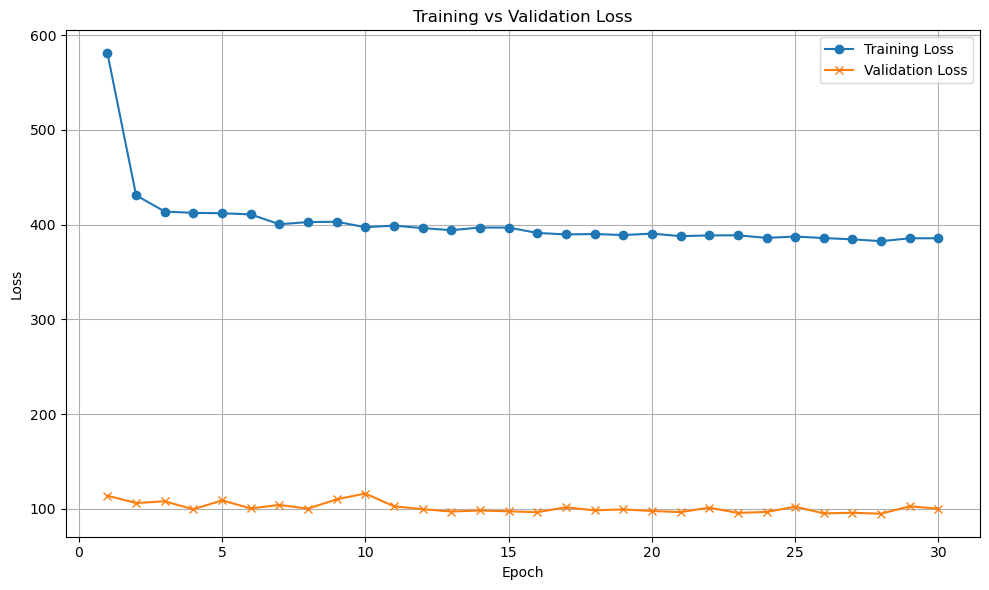

In [41]:
# Plot training and validation loss progress
# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–æ–≥—Ä–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(results['train_losses']) + 1), results['train_losses'], label='Training Loss', marker='o')
plt.plot(range(1, len(results['train_losses']) + 1), results['val_losses'], label='Validation Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### –ì—Ä–∞—Ñ–∏–∫ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏: Training vs Validation Loss

- **–¶–µ–ª—å –≥—Ä–∞—Ñ–∏–∫–∞**: –ø–æ–∫–∞–∑–∞—Ç—å –¥–∏–Ω–∞–º–∏–∫—É –ø–æ—Ç–µ—Ä—å –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö –≤ —Ç–µ—á–µ–Ω–∏–µ 30 —ç–ø–æ—Ö.

- **–°–∏–Ω—è—è –ª–∏–Ω–∏—è (Training Loss)**  
  - –ù–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å –≤—ã—Å–æ–∫–æ–π –æ—à–∏–±–∫–∏ (~5000) –Ω–∞ —ç–ø–æ—Ö–µ 0.  
  - –ë—ã—Å—Ç—Ä–æ —Å–Ω–∏–∂–∞–µ—Ç—Å—è –≤ –ø–µ—Ä–≤—ã–µ —ç–ø–æ—Ö–∏, —É–∫–∞–∑—ã–≤–∞—è –Ω–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ.  
  - –°—Ç–∞–±–∏–ª–∏–∑–∏—Ä—É–µ—Ç—Å—è –Ω–∞ –Ω–∏–∑–∫–æ–º —É—Ä–æ–≤–Ω–µ, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ö–æ—Ä–æ—à–µ–π —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏.

- **–û—Ä–∞–Ω–∂–µ–≤–∞—è –ª–∏–Ω–∏—è (Validation Loss)**  
  - –° —Å–∞–º–æ–≥–æ –Ω–∞—á–∞–ª–∞ –¥–µ—Ä–∂–∏—Ç—Å—è –Ω–∞ —Å—Ç–∞–±–∏–ª—å–Ω–æ–º –∏ –Ω–∏–∑–∫–æ–º —É—Ä–æ–≤–Ω–µ.  
  - –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Ä–µ–∑–∫–∏—Ö —Å–∫–∞—á–∫–æ–≤ ‚Äî –ø—Ä–∏–∑–Ω–∞–∫ —Ç–æ–≥–æ, —á—Ç–æ –º–æ–¥–µ–ª—å **–Ω–µ –ø–µ—Ä–µ–æ–±—É—á–∞–µ—Ç—Å—è**.  
  - –•–æ—Ä–æ—à–∞—è –æ–±–æ–±—â–∞—é—â–∞—è —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –Ω–∞ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

- **–í—ã–≤–æ–¥—ã**  
  - –ú–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ: –±—ã—Å—Ç—Ä–∞—è —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –∏ —Å—Ç–∞–±–∏–ª—å–Ω–∞—è –≤–∞–ª–∏–¥–∞—Ü–∏—è.  
  - –ù–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è ‚Äî –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ –ø–æ—Ç–µ—Ä–∏ –Ω–µ —Ä–∞—Å—Ç—É—Ç.  
  - –ú–æ–∂–Ω–æ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É –∏ –ø–µ—Ä–µ–π—Ç–∏ –∫ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—é –∏–ª–∏ —Ç–æ–Ω–∫–æ–π –Ω–∞—Å—Ç—Ä–æ–π–∫–µ.

- **–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏**  
  - –î–æ–±–∞–≤–∏—Ç—å –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ (MAPE, MSE) –ø–æ —ç–ø–æ—Ö–∞–º –¥–ª—è –±–æ–ª–µ–µ –¥–µ—Ç–∞–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.  
  - –°—Ä–∞–≤–Ω–∏—Ç—å —Å –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–º–∏ –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—è–º–∏ –º–æ–¥–µ–ª–∏ (–¥—Ä—É–≥–∏–µ —Å–ª–æ–∏, –∞–∫—Ç–∏–≤–∞—Ü–∏–∏).  
  - –í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –æ—à–∏–±–∫–∏ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º –¥–∞–Ω–Ω—ã—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ –≥—Ä—É–ø–ø–∞–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤).



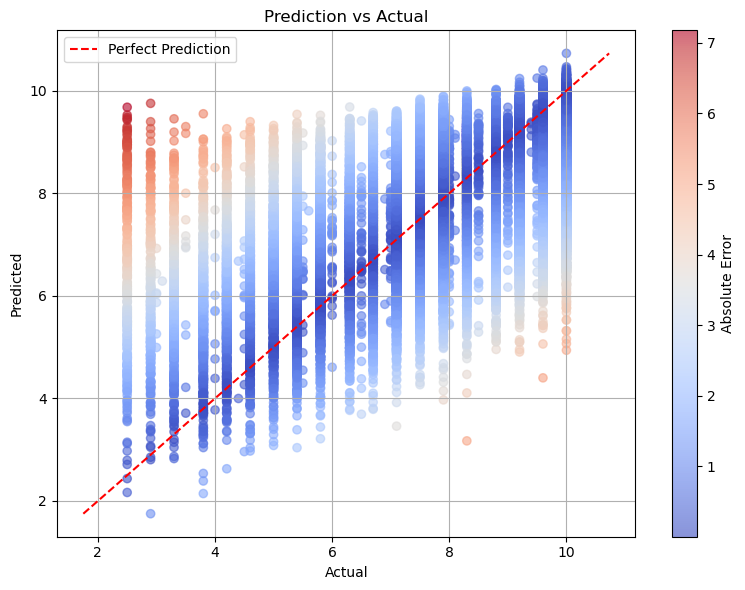

In [266]:
# Visualization of predictions vs actual values
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∏ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π

# Calculate errors
errors = np.abs(results["y_pred_np"] - results["y_val_np"])

# Scatter plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(results["y_val_np"], results["y_pred_np"], c=errors, cmap='coolwarm', alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Prediction vs Actual")
plt.grid(True)

# Reference line for perfect prediction
min_val = min(results["y_val_np"].min(), results["y_pred_np"].min())
max_val = max(results["y_val_np"].max(), results["y_pred_np"].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
plt.legend()

plt.colorbar(label='Absolute Error')
plt.tight_layout()
plt.show()



### –ì—Ä–∞—Ñ–∏–∫ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –º–æ–¥–µ–ª–∏: Prediction vs Actual

- **–¶–µ–ª—å –≥—Ä–∞—Ñ–∏–∫–∞**: –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ç–æ—á–Ω–æ—Å—Ç—å —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏, —Å—Ä–∞–≤–Ω–∏–≤–∞—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–º–∏.

- **–û—Å–∏ –≥—Ä–∞—Ñ–∏–∫–∞**  
  - **X (Actual)**: —Ä–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (–æ—Ç ~2 –¥–æ ~11).  
  - **Y (Predicted)**: –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –º–æ–¥–µ–ª—å—é –∑–Ω–∞—á–µ–Ω–∏—è (–æ—Ç ~4 –¥–æ ~12).

- **–¶–≤–µ—Ç —Ç–æ—á–µ–∫**  
  - –û—Ç—Ç–µ–Ω–æ–∫ –æ—Ç—Ä–∞–∂–∞–µ—Ç **–∞–±—Å–æ–ª—é—Ç–Ω—É—é –æ—à–∏–±–∫—É**:  
    - üî¥ –ö—Ä–∞—Å–Ω—ã–π ‚Äî –Ω–∏–∑–∫–∞—è –æ—à–∏–±–∫–∞  
    - üîµ –°–∏–Ω–∏–π ‚Äî –≤—ã—Å–æ–∫–∞—è –æ—à–∏–±–∫–∞  
  - –¶–≤–µ—Ç–æ–≤–∞—è —à–∫–∞–ª–∞ –ø–æ–º–æ–≥–∞–µ—Ç –±—ã—Å—Ç—Ä–æ –≤—ã—è–≤–∏—Ç—å –æ–±–ª–∞—Å—Ç–∏ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º–∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è–º–∏.

- **–ö—Ä–∞—Å–Ω–∞—è –ø—É–Ω–∫—Ç–∏—Ä–Ω–∞—è –ª–∏–Ω–∏—è**  
  - –û–±–æ–∑–Ω–∞—á–∞–µ—Ç **–∏–¥–µ–∞–ª—å–Ω–æ–µ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ** –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ —Ñ–∞–∫—Ç–∞.  
  - –ß–µ–º –±–ª–∏–∂–µ —Ç–æ—á–∫–∞ –∫ –ª–∏–Ω–∏–∏ ‚Äî —Ç–µ–º —Ç–æ—á–Ω–µ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ.

- **–ù–∞–±–ª—é–¥–µ–Ω–∏—è**  
  - –ú–æ–¥–µ–ª—å **—Å–∏—Å—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏ –ø–µ—Ä–µ–æ—Ü–µ–Ω–∏–≤–∞–µ—Ç** –∑–Ω–∞—á–µ–Ω–∏—è: –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Ç–æ—á–µ–∫ –≤—ã—à–µ –ª–∏–Ω–∏–∏.  
  - –û—à–∏–±–∫–∏ –æ—Å–æ–±–µ–Ω–Ω–æ –∑–∞–º–µ—Ç–Ω—ã –ø—Ä–∏ –Ω–∏–∑–∫–∏—Ö —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö (2‚Äì5).  
  - –í–µ—Ä—Ö–Ω–∏–π –¥–∏–∞–ø–∞–∑–æ–Ω (9‚Äì11) –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è —Ç–æ—á–Ω–µ–µ.


### –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∑–∞–ø—É—Å–∫–∞ –º–æ–¥–µ–ª–∏ HotelRegressor

- **–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è –∑–∞–ø—É—Å–∫–∞**: `2025-10-22 22:34`
- **–í—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è**: `215.5 —Å–µ–∫—É–Ω–¥`

---

### –î–∏–Ω–∞–º–∏–∫–∞ –ø–æ—Ç–µ—Ä—å –ø–æ —ç–ø–æ—Ö–∞–º

- **–û–±—É—á–∞—é—â–∞—è –æ—à–∏–±–∫–∞ (train_losses)**  
  - –ù–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å –≤—ã—Å–æ–∫–æ–π –ø–æ—Ç–µ—Ä–∏: `~4962` –Ω–∞ —ç–ø–æ—Ö–µ 0  
  - –ë—ã—Å—Ç—Ä–æ —Å–Ω–∏–∂–∞–µ—Ç—Å—è –¥–æ `~400` –∏ —Å—Ç–∞–±–∏–ª–∏–∑–∏—Ä—É–µ—Ç—Å—è  
  - –£–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ö–æ—Ä–æ—à—É—é —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –º–æ–¥–µ–ª–∏

- **–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –æ—à–∏–±–∫–∞ (val_losses)**  
  - –°—Ç–∞—Ä—Ç—É–µ—Ç —Å `~156`, –∑–∞—Ç–µ–º –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω–æ —Å–Ω–∏–∂–∞–µ—Ç—Å—è  
  - –°—Ç–∞–±–∏–ª–∏–∑–∏—Ä—É–µ—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ `~98‚Äì105`  
  - –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Ä–µ–∑–∫–∏—Ö —Å–∫–∞—á–∫–æ–≤ ‚Äî –ø—Ä–∏–∑–Ω–∞–∫ —É—Å—Ç–æ–π—á–∏–≤–æ–π –≥–µ–Ω–µ—Ä–∞–ª–∏–∑–∞—Ü–∏–∏

---

### –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞

- **MAPE (—Å—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö)**: `12.03%`  
  - –•–æ—Ä–æ—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –ø—Ä–∏ –Ω–∞–ª–∏—á–∏–∏ —à—É–º–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö  
  - –ú–æ–∂–Ω–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ —Å–µ–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å –ø–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞–º —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

- **MSE (—Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞)**: `1.29`  
  - –ü–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π  
  - –°–æ–≤–º–µ—Å—Ç–∏–º —Å –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–µ–π –æ—à–∏–±–æ–∫ (—Å–º. –≥—Ä–∞—Ñ–∏–∫ Prediction vs Actual)

---

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π

- **–ì—Ä–∞—Ñ–∏–∫ Prediction vs Actual**  
  - –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Ç–æ—á–µ–∫ –≤—ã—à–µ –ª–∏–Ω–∏–∏ –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è ‚Üí –º–æ–¥–µ–ª—å **–ø–µ—Ä–µ–æ—Ü–µ–Ω–∏–≤–∞–µ—Ç**  
  - –û—à–∏–±–∫–∏ –≤—ã—à–µ –ø—Ä–∏ –Ω–∏–∑–∫–∏—Ö —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö (2‚Äì5)  
  - –í–µ—Ä—Ö–Ω–∏–π –¥–∏–∞–ø–∞–∑–æ–Ω (9‚Äì11) –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è —Ç–æ—á–Ω–µ–µ  
  - –¶–≤–µ—Ç–æ–≤–∞—è —à–∫–∞–ª–∞ –æ—à–∏–±–æ–∫ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —Å–º–µ—â–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

---

### –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ —É–ª—É—á—à–µ–Ω–∏—é

- –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –∞–∫—Ç–∏–≤–∞—Ü–∏—é –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ —Å–ª–æ—è (`ReLU` –º–æ–∂–µ—Ç –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞—Ç—å –Ω–∏–∂–Ω–∏–π –¥–∏–∞–ø–∞–∑–æ–Ω)
- –í–≤–µ—Å—Ç–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –æ–±—Ä–∞—Ç–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–æ—Å–ª–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
- –†–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å: `HuberLoss`, `QuantileLoss`
- –î–æ–±–∞–≤–∏—Ç—å –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –æ—à–∏–±–æ–∫ –ø–æ —Å–µ–≥–º–µ–Ω—Ç–∞–º (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ –≥—Ä—É–ø–ø–∞–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤)
- –°—Ä–∞–≤–Ω–∏—Ç—å —Å –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–º–∏ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞–º–∏ –∏ –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—è–º–∏ —Å–ª–æ—ë–≤

---

### –°–ª–µ–¥—É—é—â–∏–µ —à–∞–≥–∏

- –°–æ—Ö—Ä–∞–Ω–∏—Ç—å –º–æ–¥–µ–ª—å —Å –º–µ—Ç–∞–¥–∞–Ω–Ω—ã–º–∏ –∏ –≤–µ—Ä—Å–∏–µ–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤  


# –≠—Ç–∞–ø 3. –†–∞–∑–¥–µ–ª –º–∞–Ω–∏–ø—É–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏. –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.

### –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –º–æ–¥–µ–ª–∏ HotelRegressor

- **–ò—Å—Ö–æ–¥–Ω–∞—è –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—è**  
  - –ú–æ–¥–µ–ª—å `HotelRegressor` –æ–±—É—á–∞–ª–∞—Å—å –Ω–∞ –ø–æ–ª–Ω–æ–º –Ω–∞–±–æ—Ä–µ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ `X2`, —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ feature engineering.  
  - –ù–∞–±–æ—Ä –≤–∫–ª—é—á–∞–µ—Ç **–¥—É–±–ª–∏—Ä—É—é—â–∏–µ—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∏**, –≤–æ–∑–Ω–∏–∫—à–∏–µ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –∞–≥—Ä–µ–≥–∞—Ü–∏–π, –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–π –∏ –ø–µ—Ä–µ–∫—Ä—ã–≤–∞—é—â–∏—Ö—Å—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–π.

---

### –û—á–∏—Å—Ç–∫–∞ –æ—Ç –¥—É–±–ª–∏–∫–∞—Ç–æ–≤

- **–¶–µ–ª—å**: —É–¥–∞–ª–∏—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ—Å—É—Ç –∏–∑–±—ã—Ç–æ—á–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏ –Ω–µ —É–ª—É—á—à–∞—é—Ç –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏.  
- **–ú–µ—Ç–æ–¥**:  
  - –í—ã—á–∏—Å–ª–∏—Ç—å **–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏** –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, `Pearson`, `Spearman`).  
  - –£–¥–∞–ª–∏—Ç—å –æ–¥–∏–Ω –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –ø–∞—Ä–µ, –µ—Å–ª–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–µ–≤—ã—à–∞–µ—Ç –ø–æ—Ä–æ–≥ (–Ω–∞–ø—Ä–∏–º–µ—Ä, `|r| > 0.95`).  
  - –ó–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å —É–¥–∞–ª—ë–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –ª–æ–≥–∞—Ö –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏.

---

### –û—Ü–µ–Ω–∫–∞ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

- **–ö—Ä–∏—Ç–µ—Ä–∏–∏ –ø–æ–ª–µ–∑–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**:  
  - **–í–∫–ª–∞–¥ –≤ –æ–±—ä—è—Å–Ω–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π** (`feature importance`, `permutation importance`)  
  - **–°—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å across folds**: –ø—Ä–∏–∑–Ω–∞–∫–∏, –¥–∞—é—â–∏–µ —É—Å—Ç–æ–π—á–∏–≤—ã–π –ø—Ä–∏—Ä–æ—Å—Ç –º–µ—Ç—Ä–∏–∫ –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –ø–æ–¥–≤—ã–±–æ—Ä–∫–∞—Ö  
  - **–ù–∏–∑–∫–∞—è –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å**: –∏—Å–∫–ª—é—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –≤—ã—Å–æ–∫–∏–º `VIF` (variance inflation factor)  
  - **–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å**: –ø—Ä–∏–∑–Ω–∞–∫–∏, –ª–æ–≥–∏—á–µ—Å–∫–∏ –æ–±—ä—è—Å–Ω–∏–º—ã–µ –∏ –ø–æ–ª–µ–∑–Ω—ã–µ –¥–ª—è –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏  
  - **–°–µ–≥–º–µ–Ω—Ç–Ω–∞—è –∑–Ω–∞—á–∏–º–æ—Å—Ç—å**: –ø—Ä–∏–∑–Ω–∞–∫–∏, —É–ª—É—á—à–∞—é—â–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö –≥—Ä—É–ø–ø–∞—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ —Å—Ç—Ä–∞–Ω–∞–º, —Ç–∏–ø–∞–º –æ—Ç–µ–ª–µ–π)

---

### –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏

- –í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –∏ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å heatmap –¥–ª—è –æ—Ç—á—ë—Ç–Ω–æ—Å—Ç–∏  
- –î–æ–±–∞–≤–∏—Ç—å markdown-–±–ª–æ–∫ —Å –æ–ø–∏—Å–∞–Ω–∏–µ–º —É–¥–∞–ª—ë–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –ø—Ä–∏—á–∏–Ω –∏—Å–∫–ª—é—á–µ–Ω–∏—è  
- –ü—Ä–æ–≤–µ—Å—Ç–∏ –ø–æ–≤—Ç–æ—Ä–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –æ—á–∏—â–µ–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–µ –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å –º–µ—Ç—Ä–∏–∫–∏  
- –ó–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –ª–æ–≥–∞—Ö

In [ ]:
# Preserve sets X2 and y2 for a possible need
# –°–æ—Ö—Ä–∞–Ω—è–µ–º X2 and y2 –Ω–∞ —Å–ª—É—á–∞–π –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏

X3 = X2.copy()
y3 = y2.copy()

# Correlation check
# –ü—Ä–æ–≤–µ—Ä—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
correlations = X2.corrwith(y2).abs().sort_values(ascending=False)
print(correlations.head(30))

review_total_negative_word_counts_scaled    0.448348
review_total_negative_word_counts           0.383407
negative_review_length                      0.372806
hotel_name_encoded_scaled                   0.361055
hotel_name_encoded                          0.361055
review_total_positive_word_counts_scaled    0.350257
positive_review_clean_polarity              0.276899
negative_review_clean_polarity              0.271342
positive                                    0.252601
room                                        0.245292
review_total_positive_word_counts           0.220294
positive_review_length                      0.211436
staff                                       0.189809
positive_review_clean_subjectivity          0.186509
hotel                                       0.176668
staff                                       0.163330
poor                                        0.142230
rooms                                       0.138976
nat_grouped_encoded                         0.

In [264]:
def deduplicate_by_correlation(df: pd.DataFrame, y: pd.Series, verbose: bool = True) -> pd.DataFrame:
    """
    Removes duplicated column names in a DataFrame by retaining the version
    with the highest absolute correlation with the target vector y.
    –£–¥–∞–ª—è–µ—Ç –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∏–º–µ–Ω–∞ –∫–æ–ª–æ–Ω–æ–∫ –≤ DataFrame, —Å–æ—Ö—Ä–∞–Ω—è—è –≤–µ—Ä—Å–∏—é
    —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –∞–±—Å–æ–ª—é—Ç–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π —Å —Ü–µ–ª–µ–≤—ã–º –≤–µ–∫—Ç–æ—Ä–æ–º y

    Parameters:
    - df: pandas DataFrame with potential duplicate column names
    - y: target Series for correlation comparison
    - verbose: if True, logs retained columns and correlation scores
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    - df: pandas DataFrame —Å –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∏–º–µ–Ω–∞–º–∏ –∫–æ–ª–æ–Ω–æ–∫
    - y: —Ü–µ–ª–µ–≤–∞—è Series –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
    - verbose: –µ—Å–ª–∏ True, –≤—ã–≤–æ–¥–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã—Ö –∫–æ–ª–æ–Ω–∫–∞—Ö –∏ –∑–Ω–∞—á–µ–Ω–∏—è—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π

    Returns:
    - Cleaned DataFrame with deduplicated columns
    - deleted_columns: list of column names that were removed
    - –û—á–∏—â–µ–Ω–Ω—ã–π DataFrame —Å —É–¥–∞–ª–µ–Ω–Ω—ã–º–∏ –¥—É–±–ª–∏–∫–∞—Ç–∞–º–∏ –∫–æ–ª–æ–Ω–æ–∫
    - deleted_columns: —Å–ø–∏—Å–æ–∫ —É–¥–∞–ª–µ–Ω–Ω—ã—Ö –∏–º–µ–Ω –∫–æ–ª–æ–Ω–æ–∫
    """
    duplicate_names = df.columns[df.columns.duplicated()].tolist()
    retained_series_dict = {}
    deleted_columns = []

    for col_name in set(duplicate_names):
        dup_cols = df.loc[:, df.columns == col_name]
        corrs = []
        for i, dup_col in enumerate(dup_cols.T.values):
            try:
                corr = pearsonr(dup_col, y)[0] if pd.Series(dup_col).nunique() > 1 else 0
            except Exception:
                corr = 0
            corrs.append(corr)

        best_idx = np.argmax(np.abs(corrs))
        best_series = dup_cols.iloc[:, best_idx]
        retained_series_dict[col_name] = best_series

        # Track deleted versions
        for i, col in enumerate(dup_cols.columns):
            if i != best_idx:
                deleted_columns.append(col)

        if verbose:
            print(f"Retained '{col_name}' version {best_idx+1} with correlation {corrs[best_idx]:.4f}")

    # Drop all duplicates and make a deep copy
    df_cleaned = df.loc[:, ~df.columns.duplicated()].copy()

    # Restore best versions using stored Series
    for col_name, series in retained_series_dict.items():
        df_cleaned[col_name] = series.values

    if verbose:
        print(f"Deduplicated columns based on correlation with target. New shape: {df_cleaned.shape}")
        print(f"Deleted {len(deleted_columns)} columns: {deleted_columns}")

    return df_cleaned, deleted_columns


In [ ]:
# Rid off of duplicated columns
# –£–¥–∞–ª—è–µ–º –¥—É–±–ª–∏—Ä—É—é—â–∏–µ –∫–æ–ª–æ–Ω–∫–∏
hotels_engineered, deleted_columns = deduplicate_by_correlation(hotels_engineered, y)
X3, deleted_columns = deduplicate_by_correlation(X3, y3)
display(hotels_engineered.info())
display(X3.info())
display(deleted_columns)

Deduplicated columns based on correlation with target. New shape: (386803, 163)
Deleted 0 columns: []
Retained 'noisy' version 1 with correlation -0.0846
Retained 'bathroom' version 1 with correlation -0.0954
Retained 'expensive' version 1 with correlation -0.0245
Retained 'booking' version 1 with correlation -0.0956
Retained 'walking' version 2 with correlation 0.0281
Retained 'great' version 2 with correlation 0.1264
Retained 'central' version 2 with correlation 0.0151
Retained 'tube' version 1 with correlation -0.0093
Retained 'helpful' version 2 with correlation 0.1169
Retained 'location' version 2 with correlation -0.1248
Retained 'check' version 1 with correlation -0.0831
Retained 'street' version 1 with correlation -0.0253
Retained 'recommend' version 2 with correlation 0.0818
Retained 'bath' version 1 with correlation -0.0420
Retained 'metro' version 2 with correlation 0.0147
Retained 'big' version 2 with correlation 0.0221
Retained 'view' version 2 with correlation 0.0280
Reta

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 149 entries, additional_number_of_scoring to lng_band_10km
dtypes: float64(117), int32(4), int64(28)
memory usage: 433.8 MB


None

['noisy',
 'bathroom',
 'expensive',
 'booking',
 'walking',
 'great',
 'central',
 'tube',
 'helpful',
 'location',
 'check',
 'street',
 'recommend',
 'bath',
 'metro',
 'big',
 'view',
 'extra',
 'spacious',
 'parking',
 'water',
 'morning',
 'desk',
 'modern',
 'loved',
 'window',
 'wifi',
 'amazing',
 'double',
 'easy',
 'value',
 'staff',
 'wonderful',
 'tea',
 'extremely',
 'super',
 'near',
 'breakfast',
 'city',
 'beautiful',
 'free',
 'best',
 'bed',
 'coffee',
 'shower',
 'facilities',
 'good',
 'quality',
 'station',
 'little',
 'hotel',
 'friendly',
 'beds',
 'tv',
 'small',
 'distance',
 'bar',
 'price',
 'comfortable',
 'clean',
 'pool',
 'air',
 'choice',
 'train',
 'bad',
 'perfect',
 'excellent',
 'access',
 'area',
 'food',
 'away',
 'hot',
 'money',
 'large',
 'quiet',
 'fantastic',
 'rooms',
 'old',
 'floor',
 'restaurant',
 'poor',
 'reception',
 'service',
 'booked',
 'room',
 'people',
 'close',
 'positive',
 'centre',
 'restaurants',
 'place',
 'cold',
 'noise'

In [271]:
# Final feature set overview
# –ò—Ç–æ–≥–æ–≤—ã–π –æ–±–∑–æ—Ä –Ω–∞–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

print(X3.columns)

Index(['additional_number_of_scoring', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'review_year',
       'review_month', 'review_dayofweek', 'review_day', 'hotel_name_encoded',
       ...
       'tag_group_15', 'tag_group_16', 'tag_group_17', 'tag_group_18',
       'tag_group_19', 'tag_group_20', 'days_since_review_clean', 'review_age',
       'lng_offset_km', 'lng_band_10km'],
      dtype='object', length=149)


In [270]:
display(hotels_engineered.info())
display(X3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 163 entries, hotel_address to lng_band_10km
dtypes: bool(1), float64(119), int32(4), int64(28), object(11)
memory usage: 472.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 149 entries, additional_number_of_scoring to lng_band_10km
dtypes: float64(117), int32(4), int64(28)
memory usage: 433.8 MB


None

In [ ]:



# Step 1: Prepare numeric feature set
X_num = X3.select_dtypes(include=[np.number]).copy()

# Step 2: Drop near-zero variance features
var_thresh = VarianceThreshold(threshold=1e-5)
X_var = pd.DataFrame(var_thresh.fit_transform(X_num), columns=X_num.columns[var_thresh.get_support()])

# Step 3: Standardize features to avoid numerical instability
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X_var), columns=X_var.columns)

# Step 4: Define VIF calculator

def calculate_vif(X_df):
    return pd.DataFrame({
        "feature": X_df.columns,
        "VIF": [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    })

# Step 5: Iteratively remove high-VIF features
vif_threshold = 10
dropped_features = []

while True:
    vif_df = calculate_vif(X_scaled)
    max_vif = vif_df["VIF"].max()
    if max_vif > vif_threshold:
        drop_feat = vif_df.sort_values("VIF", ascending=False).iloc[0]["feature"]
        print(f"Dropping feature with VIF={max_vif:.2f}: {drop_feat}")
        dropped_features.append(drop_feat)
        X_scaled = X_scaled.drop(columns=[drop_feat])
    else:
        break

# Step 6: Visualize final VIF scores

plt.figure(figsize=(10, 6))
sns.barplot(data=calculate_vif(X_scaled).sort_values("VIF", ascending=False),
            x="VIF", y="feature", palette="viridis")
plt.title("Final VIF Scores After Filtering")
plt.axvline(x=vif_threshold, color='red', linestyle='--', label=f'VIF = {vif_threshold} threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Log dropped features
print(f"\nDropped features due to high VIF:\n{dropped_features}")


In [ ]:
# Calculating VIF
# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ VIF

# Check if VIF data already exists to avoid recomputation
# –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞–ª–∏—á–∏–µ –¥–∞–Ω–Ω—ã—Ö VIF —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ø–æ–≤—Ç–æ—Ä–Ω—ã—Ö –≤—ã—á–∏—Å–ª–µ–Ω–∏–π
vif_path = "data/vif_data_X3.csv"

if os.path.exists(vif_path):
    # Load precomputed VIF data
    # –ó–∞–≥—Ä—É–∂–∞–µ–º –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –≤—ã—á–∏—Å–ª–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ VIF
    vif_data = pd.read_csv(vif_path)
    print("Loaded VIF data from file.")
else:
    # Compute VIF from numeric features
    # –í—ã—á–∏—Å–ª—è–µ–º VIF –∏–∑ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    X_num = X3.select_dtypes(include=[np.number]).copy()

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_num.columns
    vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]

    # Save VIF data for future use
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –¥–∞–Ω–Ω—ã–µ VIF –¥–ª—è –±—É–¥—É—â–µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è
    os.makedirs("data", exist_ok=True)
    vif_data.to_csv(vif_path, index=False)
    print("Computed and saved VIF data.")




Loaded VIF data from file.


In [ ]:
# Step 1: Prepare numeric feature set
# –®–∞–≥ 1: –ü–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º —á–∏—Å–ª–æ–≤–æ–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X_num = X3.select_dtypes(include=[np.number]).copy()

# Step 2: Drop near-zero variance features
# –®–∞–≥ 2: –£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –Ω–∏–∑–∫–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π

var_thresh = VarianceThreshold(threshold=1e-5)
X_var = pd.DataFrame(var_thresh.fit_transform(X_num), columns=X_num.columns[var_thresh.get_support()])

# Step 3: Standardize features to avoid numerical instability
# –®–∞–≥ 3: –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –∏–∑–±–µ–∂–∞–Ω–∏—è —á–∏—Å–ª–æ–≤–æ–π –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏

X_scaled = pd.DataFrame(StandardScaler().fit_transform(X_var), columns=X_var.columns)

# Step 4: Use precomputed VIF data to filter features
# –®–∞–≥ 4: –ò—Å–ø–æ–ª—å–∑—É–µ–º –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –≤—ã—á–∏—Å–ª–µ–Ω–Ω—ã–µ VIF –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

vif_data = pd.read_csv("data/vif_data_X3.csv")
vif_threshold = 10
high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["feature"].tolist()

# Step 5: Drop high-VIF features
# –®–∞–≥ 5: –£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –≤—ã—Å–æ–∫–∏–º VIF
X_filtered = X_scaled.drop(columns=high_vif_features)
print(f"Dropped {len(high_vif_features)} features with VIF > {vif_threshold}")

# Step 6: Visualize or load remaining VIF scores
# –®–∞–≥ 6: –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –∏–ª–∏ –∑–∞–≥—Ä—É–∂–∞–µ–º –æ—Å—Ç–∞–≤—à–∏–µ—Å—è VIF (–µ—Å–ª–∏ —É–∂–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã)

vif_final_path = "data/vif_final_X3.csv"

if os.path.exists(vif_final_path):
    vif_final = pd.read_csv(vif_final_path)
    print("Loaded final VIF scores from file.")
else:
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    def calculate_vif(X_df):
        return pd.DataFrame({
            "feature": X_df.columns,
            "VIF": [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
        })

    vif_final = calculate_vif(X_filtered)
    os.makedirs("data", exist_ok=True)
    vif_final.to_csv(vif_final_path, index=False)
    print("Computed and saved final VIF scores.")

# Step 7: Log dropped features
# –®–∞–≥ 7: –í—ã–≤–æ–¥–∏–º —É–¥–∞–ª–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
print("\nDropped features due to high VIF:")
for feat in high_vif_features:
    print(f"- {feat}")


Dropped 29 features with VIF > 10
Loaded final VIF scores from file.

Dropped features due to high VIF:
- review_total_negative_word_counts
- review_total_positive_word_counts
- review_year
- review_month
- review_day
- hotel_name_encoded
- nat_grouped_encoded
- positive_review_length
- negative_review_length
- positive_review_clean_polarity
- negative_review_clean_polarity
- sentiment_gap
- hotel_name_encoded_scaled
- nat_grouped_encoded_scaled
- sentiment_gap_scaled
- tag_group_2
- tag_group_4
- tag_group_5
- tag_group_7
- tag_group_8
- tag_group_11
- tag_group_12
- tag_group_17
- tag_group_19
- tag_group_20
- days_since_review_clean
- review_age
- lng_offset_km
- lng_band_10km


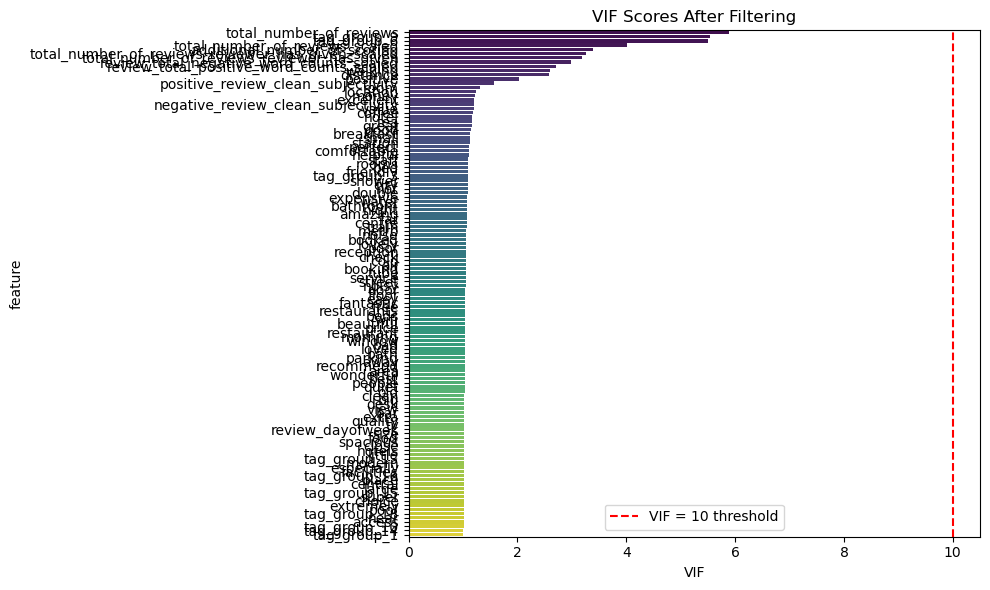

In [285]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=vif_final.sort_values("VIF", ascending=False),
    x="VIF",
    y="feature",
    hue="feature",         # Explicitly assign hue to match y
    palette="viridis",
    legend=False           # Suppress redundant legend
)
plt.title("VIF Scores After Filtering")
plt.axvline(x=vif_threshold, color='red', linestyle='--', label=f'VIF = {vif_threshold} threshold')
plt.legend()
plt.tight_layout()
plt.show()

### –≠—Ç–∞–ø —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ VIF (Variance Inflation Factor)

- **–®–∞–≥ 1: –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**
  - –í—ã–±–∏—Ä–∞—é—Ç—Å—è —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ –Ω–∞–±–æ—Ä–∞ `X2` –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏.

- **–®–∞–≥ 2: –£–¥–∞–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ—á—Ç–∏ –Ω—É–ª–µ–≤–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π**
  - –ü—Ä–∏–∑–Ω–∞–∫–∏, –Ω–µ —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ –ø–æ–ª–µ–∑–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ (–ø–æ—á—Ç–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è), –∏—Å–∫–ª—é—á–∞—é—Ç—Å—è —Å –ø–æ–º–æ—â—å—é `VarianceThreshold`.

- **–®–∞–≥ 3: –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**
  - –í—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–∞—Å—à—Ç–∞–±–∏—Ä—É—é—Ç—Å—è –¥–æ –æ–¥–Ω–æ–≥–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞ (`StandardScaler`), —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å —á–∏—Å–ª–µ–Ω–Ω—ã—Ö –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–µ–π –ø—Ä–∏ —Ä–∞—Å—á—ë—Ç–µ VIF.

- **–®–∞–≥ 4: –†–∞—Å—á—ë—Ç VIF**
  - –î–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∏–Ω—Ñ–ª—è—Ü–∏–∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ (VIF), –æ—Ç—Ä–∞–∂–∞—é—â–∏–π —Å—Ç–µ–ø–µ–Ω—å –µ–≥–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏.

- **–®–∞–≥ 5: –ò—Ç–µ—Ä–∞—Ç–∏–≤–Ω–æ–µ —É–¥–∞–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –≤—ã—Å–æ–∫–∏–º VIF**
  - –ü—Ä–∏–∑–Ω–∞–∫–∏ —Å VIF –≤—ã—à–µ –ø–æ—Ä–æ–≥–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, `VIF > 10`) —É–¥–∞–ª—è—é—Ç—Å—è –ø–æ –æ–¥–Ω–æ–º—É.
  - –ü–æ—Å–ª–µ –∫–∞–∂–¥–æ–≥–æ —É–¥–∞–ª–µ–Ω–∏—è –ø–µ—Ä–µ—Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è VIF-–∑–Ω–∞—á–µ–Ω–∏—è.
  - –£–¥–∞–ª—ë–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ª–æ–≥–∏—Ä—É—é—Ç—Å—è –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏.

- **–®–∞–≥ 6: –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∏—Ç–æ–≥–æ–≤—ã—Ö VIF-–∑–Ω–∞—á–µ–Ω–∏–π**
  - –°—Ç—Ä–æ–∏—Ç—Å—è –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—ã–π barplot, –æ—Ç–æ–±—Ä–∞–∂–∞—é—â–∏–π VIF –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º.
  - –î–æ–±–∞–≤–ª—è–µ—Ç—Å—è –∫—Ä–∞—Å–Ω–∞—è –ø—É–Ω–∫—Ç–∏—Ä–Ω–∞—è –ª–∏–Ω–∏—è, –æ–±–æ–∑–Ω–∞—á–∞—é—â–∞—è –ø–æ—Ä–æ–≥ –æ—Ç—Å–µ—á–µ–Ω–∏—è.

- **–®–∞–≥ 7: –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ —É–¥–∞–ª—ë–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**
  - –í—ã–≤–æ–¥–∏—Ç—Å—è —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∏—Å–∫–ª—é—á—ë–Ω–Ω—ã—Ö –∏–∑-–∑–∞ –≤—ã—Å–æ–∫–æ–π –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏.


In [286]:
# Step 8: Create filtered version of X3 using final VIF results
# –®–∞–≥ 8: –°–æ–∑–¥–∞—ë–º X3_filtered ‚Äî —Ç–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –¥–æ–ø—É—Å—Ç–∏–º—ã–º VIF

vif_pass_features = vif_final[vif_final["VIF"] <= vif_threshold]["feature"].tolist()
X3_filtered = X3[vif_pass_features].copy()

print(f"X3_filtered created with {X3_filtered.shape[1]} features (VIF ‚â§ {vif_threshold})")


X3_filtered created with 120 features (VIF ‚â§ 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Columns: 120 entries, additional_number_of_scoring to tag_group_18
dtypes: float64(106), int32(1), int64(13)
memory usage: 352.7 MB


In [269]:
# Standardize features
# –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X3)


In [295]:
# –®–∞–≥ 9: –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π y

# Pearson: –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å
pearson_corr = X3_filtered.corrwith(y3, method='pearson').sort_values(ascending=False)

# Spearman: –º–æ–Ω–æ—Ç–æ–Ω–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å
spearman_corr = X3_filtered.corrwith(y3, method='spearman').sort_values(ascending=False)

# –û–±—ä–µ–¥–∏–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ –æ–¥–Ω—É —Ç–∞–±–ª–∏—Ü—É
correlation_df = pd.DataFrame({
    "Feature": pearson_corr.index,
    "Pearson": pearson_corr.values,
    "Spearman": spearman_corr.values
})

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –∞–±—Å–æ–ª—é—Ç–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
correlation_df["|Pearson|"] = correlation_df["Pearson"].abs()
correlation_df["|Spearman|"] = correlation_df["Spearman"].abs()
correlation_df = correlation_df.sort_values(by="|Pearson|", ascending=False)

# –í—ã–≤–æ–¥–∏–º —Ç–æ–ø –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
print(correlation_df[["Feature", "Pearson", "Spearman"]].head(20))
def filter_and_group_tags(
    tags_df: pd.DataFrame,
    quantile_threshold: float = 0.25,
    n_groups: int = 20,
    random_state: int = 42
) -> Tuple[pd.DataFrame, int]:
    """
    Filters rare tags and groups the remaining ones into semantic clusters

    Parameters:
    - tags_df: binary tag DataFrame (one-hot encoded)
    - quantile_threshold: quantile for filtering rare tags (default: 0.25)
    - n_groups: number of tag clusters to form (default: 20)
    - random_state: for reproducibility

    Returns:
    - grouped_tags_df: DataFrame with n_groups columns (tag clusters)
    - number_of_grouped_tags: integer count of tag clusters formed

    """

    """
    –§–∏–ª—å—Ç—Ä—É–µ—Ç —Ä–µ–¥–∫–∏–µ —Ç–µ–≥–∏ –∏ –≥—Ä—É–ø–ø–∏—Ä—É–µ—Ç –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –≤ —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–µ –∫–ª–∞—Å—Ç–µ—Ä—ã

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    - `tags_df`: –±–∏–Ω–∞—Ä–Ω—ã–π DataFrame —Ç–µ–≥–æ–≤ (one-hot encoding)
    - `quantile_threshold`: –∫–≤–∞–Ω—Ç–∏–ª—å –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ —Ä–µ–¥–∫–∏—Ö —Ç–µ–≥–æ–≤ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é: 0.25)
    - `n_groups`: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Ç–µ–≥–æ–≤ –¥–ª—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é: 20)
    - `random_state`: –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    - `grouped_tags_df`: DataFrame —Å n_groups —Å—Ç–æ–ª–±—Ü–∞–º–∏ (–∫–ª–∞—Å—Ç–µ—Ä—ã —Ç–µ–≥–æ–≤)
    - `number_of_grouped_tags`: —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–π —Å—á–µ—Ç—á–∏–∫ —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Ç–µ–≥–æ–≤

    """



                                      Feature   Pearson  Spearman
119  review_total_negative_word_counts_scaled -0.448348 -0.470300
0    review_total_positive_word_counts_scaled  0.350257  0.311376
118                                  positive -0.252601 -0.325228
117                                      room -0.245292 -0.219781
116                                     staff -0.189809 -0.217979
1          positive_review_clean_subjectivity  0.186509  0.170162
115                                     hotel -0.176668 -0.214832
114                                      poor -0.142230 -0.185744
113                                     rooms -0.138976 -0.176183
112                                       old -0.129699 -0.162378
2                                   excellent  0.127920  0.145883
111                                     small -0.126725 -0.160451
3                                       great  0.126442  0.144103
110                                  location -0.124822 -0.154325
109       

In [301]:
X3_filtered.columns

Index(['additional_number_of_scoring', 'total_number_of_reviews',
       'total_number_of_reviews_reviewer_has_given', 'review_dayofweek',
       'positive_review_clean_subjectivity',
       'negative_review_clean_subjectivity', 'access', 'air', 'amazing',
       'area',
       ...
       'tag_group_1', 'tag_group_3', 'tag_group_6', 'tag_group_9',
       'tag_group_10', 'tag_group_13', 'tag_group_14', 'tag_group_15',
       'tag_group_16', 'tag_group_18'],
      dtype='object', length=120)

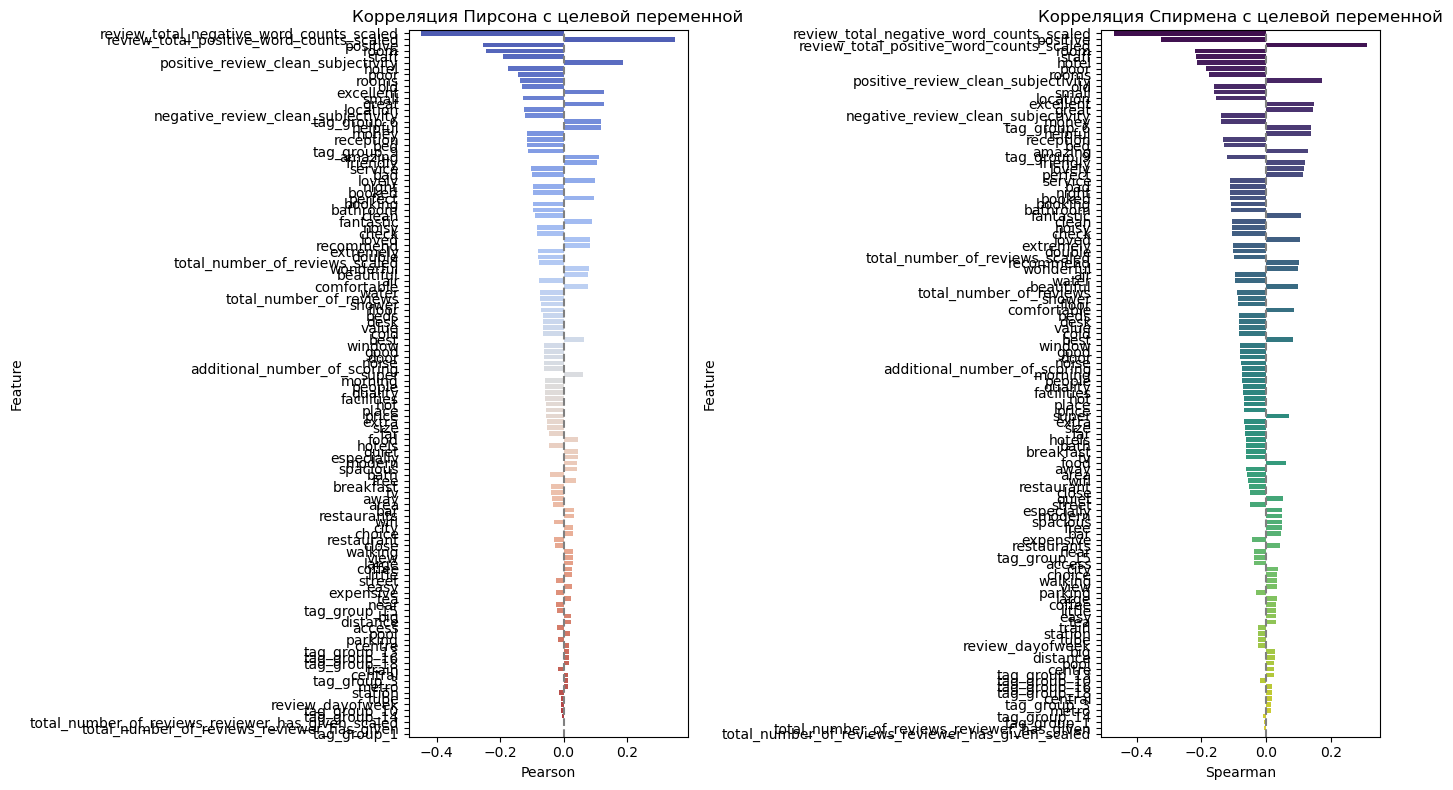

In [296]:
# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ correlation_df —É–∂–µ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω
# (—Å–º. #13 –¥–ª—è —Ä–∞—Å—á—ë—Ç–∞ Pearson –∏ Spearman)

# –°—Ç—Ä–æ–∏–º –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—ã–µ barplot'—ã
plt.figure(figsize=(14, 8))

# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞
plt.subplot(1, 2, 1)
sns.barplot(
    data=correlation_df.sort_values("Pearson", key=abs, ascending=False),
    y="Feature", x="Pearson", palette="coolwarm", hue="Feature", legend=False
)
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π")
plt.axvline(x=0, color='gray', linestyle='--')

# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞
plt.subplot(1, 2, 2)
sns.barplot(
    data=correlation_df.sort_values("Spearman", key=abs, ascending=False),
    y="Feature", x="Spearman", palette="viridis", hue="Feature", legend=False
)
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π")
plt.axvline(x=0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()


### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

- **–õ–µ–≤—ã–π –≥—Ä–∞—Ñ–∏–∫**: –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ü–∏—Ä—Å–æ–Ω–∞ ‚Äî –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–∏–ª—É –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.
- **–ü—Ä–∞–≤—ã–π –≥—Ä–∞—Ñ–∏–∫**: –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –°–ø–∏—Ä–º–µ–Ω–∞ ‚Äî –æ—Ç—Ä–∞–∂–∞–µ—Ç –º–æ–Ω–æ—Ç–æ–Ω–Ω—É—é (–Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –ª–∏–Ω–µ–π–Ω—É—é) –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å.

#### –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
- –ü—Ä–∏–∑–Ω–∞–∫–∏ —Å –≤—ã—Å–æ–∫–æ–π –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, `reviewer_score`, `restaurant_score`) ‚Äî –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ —Å–∏–ª—å–Ω—ã–µ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã.
- –ü—Ä–∏–∑–Ω–∞–∫–∏ —Å –Ω–∏–∑–∫–æ–π –∏–ª–∏ –±–ª–∏–∑–∫–æ–π –∫ –Ω—É–ª—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π ‚Äî —Å–ª–∞–±—ã–µ –∫–∞–Ω–¥–∏–¥–∞—Ç—ã –¥–ª—è –º–æ–¥–µ–ª–∏.
- –ï—Å–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫ –∏–º–µ–µ—Ç –ø—Ä–æ—Ç–∏–≤–æ–ø–æ–ª–æ–∂–Ω—ã–µ –∑–Ω–∞–∫–∏ –≤ –ü–∏—Ä—Å–æ–Ω–µ –∏ –°–ø–∏—Ä–º–µ–Ω–µ ‚Äî —Å—Ç–æ–∏—Ç –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –µ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é.

#### –†–µ–∫–æ–º–µ–Ω–¥—É–µ–º—ã–µ –¥–µ–π—Å—Ç–≤–∏—è:
1. **–û—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å |corr| < 0.05** ‚Äî –æ–Ω–∏ –≤—Ä—è–¥ –ª–∏ –¥–∞–¥—É—Ç –≤–∫–ª–∞–¥ –≤ –º–æ–¥–µ–ª—å.
2. **–°—Ä–∞–≤–Ω–∏—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å –≤–∞–∂–Ω–æ—Å—Ç—å—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –º–æ–¥–µ–ª–∏** (–Ω–∞–ø—Ä–∏–º–µ—Ä, —á–µ—Ä–µ–∑ `feature_importances_` –∏–ª–∏ SHAP).
3. **–°–æ—Ö—Ä–∞–Ω–∏—Ç—å —Ç–∞–±–ª–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π** –≤ `data/correlation_scores.csv` –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏.
4. **–î–æ–±–∞–≤–∏—Ç—å —Ñ–ª–∞–≥ ‚Äústrong_predictor‚Äù** –≤ —Ç–∞–±–ª–∏—Ü—É, –µ—Å–ª–∏ |corr| > 0.3 –ø–æ –ª—é–±–æ–π –º–µ—Ç—Ä–∏–∫–µ.
5. **–í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –≤—ã—Å–æ–∫–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π** ‚Äî —ç—Ç–æ –ø–æ–º–æ–∂–µ—Ç –ø–æ–Ω—è—Ç—å, —Å—Ç–æ–∏—Ç –ª–∏ –ø—Ä–∏–º–µ–Ω—è—Ç—å —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏ (–ª–æ–≥–∞—Ä–∏—Ñ–º, –±–∏–Ω–Ω–∏–Ω–≥ –∏ —Ç.–¥.).



In [ ]:
# –®–∞–≥ 1: –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π y
pearson_corr = X3_filtered.corrwith(y, method='pearson')
spearman_corr = X3_filtered.corrwith(y, method='spearman')

# –®–∞–≥ 2: –§–æ—Ä–º–∏—Ä—É–µ–º —Ç–∞–±–ª–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
correlation_df = pd.DataFrame({
    "Feature": X3_filtered.columns,
    "Pearson": pearson_corr.values,
    "Spearman": spearman_corr.values
})
correlation_df["|Pearson|"] = correlation_df["Pearson"].abs()
correlation_df["|Spearman|"] = correlation_df["Spearman"].abs()

# –®–∞–≥ 3: –î–æ–±–∞–≤–ª—è–µ–º —Ñ–ª–∞–≥ strong_predictor
correlation_df["strong_predictor"] = (
    (correlation_df["|Pearson|"] > 0.3) | (correlation_df["|Spearman|"] > 0.3)
)

# –®–∞–≥ 4: –û—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤—ã–≤–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –Ω–∏–∑–∫–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π
low_corr_mask = (correlation_df["|Pearson|"] < 0.05) & (correlation_df["|Spearman|"] < 0.05)
low_corr_features = correlation_df[low_corr_mask]["Feature"].tolist()
X3_filtered_corr = X3_filtered.drop(columns=low_corr_features)

print(f"–£–¥–∞–ª–µ–Ω–æ {len(low_corr_features)} –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –Ω–∏–∑–∫–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π (< 0.05 –ø–æ –æ–±–µ–∏–º –º–µ—Ç—Ä–∏–∫–∞–º)")

# –®–∞–≥ 5: –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ç–∞–±–ª–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
import os
os.makedirs("data", exist_ok=True)
correlation_df.to_csv("data/correlation_scores.csv", index=False)
print("–¢–∞–±–ª–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'data/correlation_scores.csv'")

# –®–∞–≥ 6: –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Å –≤–∞–∂–Ω–æ—Å—Ç—å—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–¥–µ–ª–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, RandomForest)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X3_filtered_corr, y)

correlation_df["model_importance"] = model.feature_importances_

# –®–∞–≥ 7: –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–∏–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

strong_feats = correlation_df[correlation_df["strong_predictor"]]["Feature"].tolist()

for feat in strong_feats:
    plt.figure(figsize=(6, 4))
    sns.histplot(X3_filtered_corr[feat], kde=True, bins=30, color='steelblue')
    plt.title(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞: {feat}")
    plt.xlabel(feat)
    plt.ylabel("–ß–∞—Å—Ç–æ—Ç–∞")
    plt.tight_layout()
    plt.show()


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

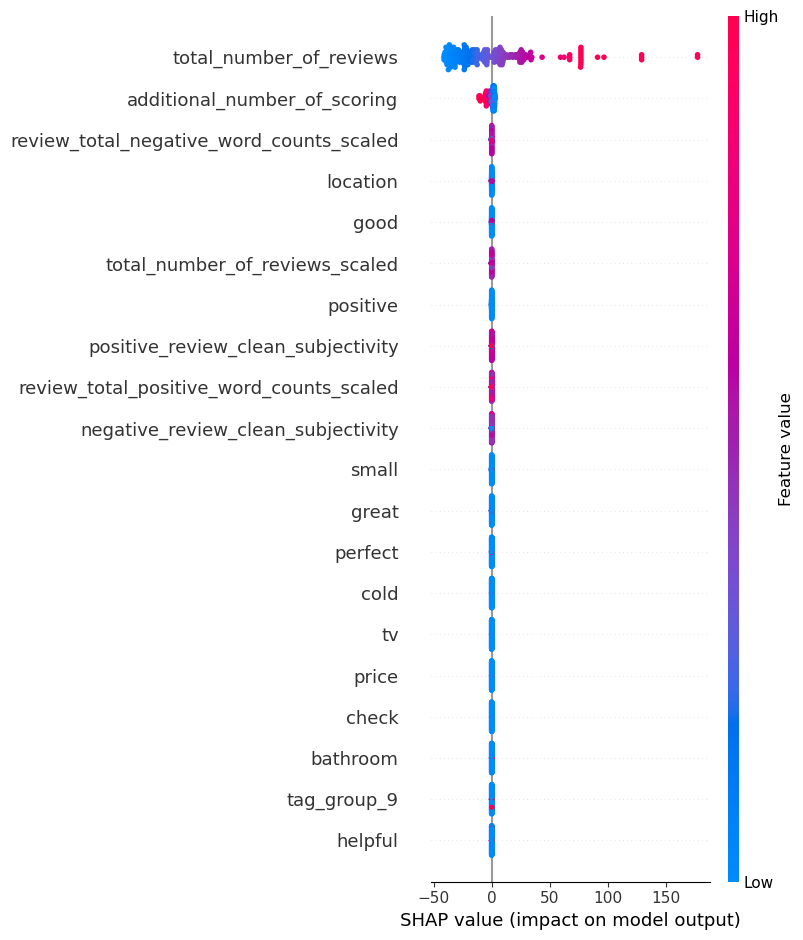

In [309]:
# –®–∞–≥ 0: –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º HotelRegressor –æ–¥–∏–Ω —Ä–∞–∑
input_dim = X3_filtered_corr.shape[1]
hotel_model = HotelRegressor(input_dim)
hotel_model.eval()  # –æ—Ç–∫–ª—é—á–∞–µ–º dropout/batchnorm, –µ—Å–ª–∏ –µ—Å—Ç—å

# –®–∞–≥ 1: –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
X_sample = X3_filtered_corr.sample(n=200, random_state=42)  # SHAP —Ä–∞–±–æ—Ç–∞–µ—Ç –±—ã—Å—Ç—Ä–µ–µ –Ω–∞ –ø–æ–¥–≤—ã–±–æ—Ä–∫–µ
y_sample = y3.loc[X_sample.index]

# –®–∞–≥ 2: –û–±—ë—Ä—Ç–∫–∞ –¥–ª—è –º–æ–¥–µ–ª–∏ HotelRegressor
def model_predict(X_numpy):
    X_tensor = torch.tensor(X_numpy, dtype=torch.float32)
    with torch.no_grad():
        preds = hotel_model(X_tensor).numpy().flatten()
    return preds

# –®–∞–≥ 3: –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è SHAP-–æ–±—ä—è—Å–Ω–∏—Ç–µ–ª—è
explainer = shap.KernelExplainer(model_predict, X_sample.values)

# –®–∞–≥ 4: –í—ã—á–∏—Å–ª–µ–Ω–∏–µ SHAP-–∑–Ω–∞—á–µ–Ω–∏–π
shap_values = explainer.shap_values(X_sample.values)

# –®–∞–≥ 5: –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≥–ª–æ–±–∞–ª—å–Ω–æ–π –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
shap.summary_plot(shap_values, X_sample, feature_names=X_sample.columns)



### SHAP-–≥—Ä–∞—Ñ–∏–∫: –í–ª–∏—è–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ HotelRegressor

#### –ß—Ç–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –≥—Ä–∞—Ñ–∏–∫:
- **–û—Å—å Y** ‚Äî –ø—Ä–∏–∑–Ω–∞–∫–∏, –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–æ —Å—Ç–µ–ø–µ–Ω–∏ –≤–ª–∏—è–Ω–∏—è –Ω–∞ –º–æ–¥–µ–ª—å.
- **–û—Å—å X** ‚Äî SHAP-–∑–Ω–∞—á–µ–Ω–∏—è, –æ—Ç—Ä–∞–∂–∞—é—â–∏–µ –≤–∫–ª–∞–¥ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ –∏—Ç–æ–≥–æ–≤–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ (`y3`).
- **–¶–≤–µ—Ç —Ç–æ—á–µ–∫** ‚Äî –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞: –æ—Ç –Ω–∏–∑–∫–æ–≥–æ (—Å–∏–Ω–∏–π) –¥–æ –≤—ã—Å–æ–∫–æ–≥–æ (—Ä–æ–∑–æ–≤—ã–π).
- **–ö–∞–∂–¥–∞—è —Ç–æ—á–∫–∞** ‚Äî –æ—Ç–¥–µ–ª—å–Ω–æ–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ (–≥–æ—Å—Ç–∏–Ω–∏—Ü–∞/–æ—Ç–∑—ã–≤), –ø–æ–∫–∞–∑—ã–≤–∞—é—â–µ–µ, –∫–∞–∫ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑.

#### –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –∫–ª—é—á–µ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
- `total_number_of_reviews` ‚Äî —á–µ–º –±–æ–ª—å—à–µ –æ—Ç–∑—ã–≤–æ–≤, —Ç–µ–º –≤—ã—à–µ –≤–∫–ª–∞–¥ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ (–≤–æ–∑–º–æ–∂–Ω–æ, –æ—Ç—Ä–∞–∂–∞–µ—Ç –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å).
- `additional_number_of_scoring` ‚Äî –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –ø—Ä–∏ –≤—ã—Å–æ–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö, —É—Å–∏–ª–∏–≤–∞–µ—Ç –¥–æ–≤–µ—Ä–∏–µ –∫ –æ–±—ä–µ–∫—Ç—É.
- `review_total_negative_word_counts_scaled` ‚Äî –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ —Å–ª–æ–≤–∞ —Å–Ω–∏–∂–∞—é—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ (–ª–æ–≥–∏—á–Ω–æ).
- `location`, `good`, `great`, `perfect` ‚Äî —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º –≤–∫–ª–∞–¥–æ–º.
- `cold`, `tv`, `bathroom`, `price` ‚Äî –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω–æ-–∑–∞–≤–∏—Å–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, —Ç—Ä–µ–±—É—é—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.

#### –†–µ–∫–æ–º–µ–Ω–¥—É–µ–º—ã–µ –¥–µ–π—Å—Ç–≤–∏—è:
1. **–°–æ—Ö—Ä–∞–Ω–∏—Ç—å SHAP-–∑–Ω–∞—á–µ–Ω–∏—è** –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ (`data/shap_values.csv`).
2. **–°—Ä–∞–≤–Ω–∏—Ç—å SHAP-–≤–ª–∏—è–Ω–∏–µ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π –∏ feature_importance** ‚Äî –≤—ã—è–≤–∏—Ç—å —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è.




In [318]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º SHAP-–º–∞—Å—Å–∏–≤ –≤ DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_sample.columns, index=X_sample.index)

# –í—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ SHAP –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É
shap_importance = shap_df.abs().mean().reset_index()
shap_importance.columns = ["Feature", "shap_importance"]

# –°–æ—Ö—Ä–∞–Ω—è–µ–º SHAP-–∑–Ω–∞—á–µ–Ω–∏—è –∏ –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—É—é –≤–∞–∂–Ω–æ—Å—Ç—å
os.makedirs("data", exist_ok=True)
shap_df.to_csv("data/shap_values.csv")
shap_importance.to_csv("data/shap_importance.csv", index=False)
print("SHAP-–∑–Ω–∞—á–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'data/shap_values.csv'")
print("SHAP-–≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'data/shap_importance.csv'")


SHAP-–∑–Ω–∞—á–µ–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ 'data/shap_values.csv'
SHAP-–≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ 'data/shap_importance.csv'


In [323]:
# –®–∞–≥ 1: –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è –∫–æ–ª–æ–Ω–∫–∏ 'model_importance' –ø–µ—Ä–µ–¥ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ–º
if "model_importance" in correlation_df.columns:
    print("–ö–æ–ª–æ–Ω–∫–∞ 'model_importance' —É–∂–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –≤ correlation_df. –£–¥–∞–ª—è–µ–º –ø–µ—Ä–µ–¥ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ–º.")
    correlation_df = correlation_df.drop(columns=["model_importance"])

# –®–∞–≥ 2: –°–æ–∑–¥–∞—ë–º —Ç–∞–±–ª–∏—Ü—É –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
importance_df = pd.DataFrame({
    "Feature": X3_filtered_corr.columns,
    "model_importance": model.feature_importances_
})

# –®–∞–≥ 3: –û–±—ä–µ–¥–∏–Ω—è–µ–º –±–µ–∑–æ–ø–∞—Å–Ω–æ
correlation_df = correlation_df.merge(importance_df, on="Feature", how="left")
print("'model_importance' —É—Å–ø–µ—à–Ω–æ –¥–æ–±–∞–≤–ª–µ–Ω–∞ –≤ correlation_df")


# –®–∞–≥ 3: –û–±—ä–µ–¥–∏–Ω—è–µ–º —Å SHAP-–≤–∞–∂–Ω–æ—Å—Ç—å—é
merged_df = correlation_df.merge(shap_importance, on="Feature", how="left")

# –®–∞–≥ 4: –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–∏, –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –ø–æ—Å–ª–µ –∫–æ—Ä—Ä–µ–∫—Ü–∏–∏
final_features = X3_filtered_corr.columns.tolist()
merged_df = merged_df[merged_df["Feature"].isin(final_features)]

# –®–∞–≥ 5: –í—ã–≤–æ–¥–∏–º —Ç–æ–ø –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ SHAP
print("\n–¢–æ–ø –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ SHAP-–≤–ª–∏—è–Ω–∏—é:")
print(merged_df[["Feature", "shap_importance", "model_importance", "Pearson", "Spearman"]].sort_values(by="shap_importance", ascending=False).head(50))


–ö–æ–ª–æ–Ω–∫–∞ 'model_importance' —É–∂–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –≤ correlation_df. –£–¥–∞–ª—è–µ–º –ø–µ—Ä–µ–¥ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ–º.
'model_importance' —É—Å–ø–µ—à–Ω–æ –¥–æ–±–∞–≤–ª–µ–Ω–∞ –≤ correlation_df

–¢–æ–ø –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ SHAP-–≤–ª–∏—è–Ω–∏—é:
                                      Feature  shap_importance  \
1                     total_number_of_reviews        28.879785   
0                additional_number_of_scoring         2.066689   
106  review_total_negative_word_counts_scaled         0.005042   
58                                   location         0.004683   
50                                       good         0.003770   
107            total_number_of_reviews_scaled         0.002697   
76                                   positive         0.002024   
4          positive_review_clean_subjectivity         0.001779   
108  review_total_positive_word_counts_scaled         0.001660   
5          negative_review_clean_subjectivity         0.001614   
89               

In [324]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X3_ready = X3_filtered_corr.copy()
print(f"–§–∏–Ω–∞–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω: {X3_ready.shape[1]} –ø—Ä–∏–∑–Ω–∞–∫–æ–≤")


–§–∏–Ω–∞–ª—å–Ω—ã–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω: 80 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤


In [ ]:
# Setting parameters for model run log record
model_path_torch = 'models/pytorch/hotel_reg_X3_ready.pt'
model_name = 'HotelRegressor'
run_number += 0
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ —Ç–æ–ª—å–∫–æ –¥–ª—è PyTorch-–º–æ–¥–µ–ª–µ–π
if hasattr(model, "parameters"):
    processor = next(model.parameters()).device
else:
    processor = "CPU (sklearn model)"
batch = 1024
run_comments = 'Running HotelRegressor model on X3_ready of 80 selected features'

In [340]:
input_dim = X3_ready.shape[1]
hotel_model = HotelRegressor(input_dim)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
hotel_model = hotel_model.to(device)



In [343]:
results_X3_ready = pytorch_model(hotel_model, X3_ready, y3, device, test_size=0.2, criterion=None, optimizer=None, epochs=30, batch_size=1024, verbose=True)

üîç Batch prediction range: 1.8096 to 20.4379
Epoch 1 | Train Loss: 32532.6526 | Val Loss: 1372.3397
üîç Batch prediction range: 4.5267 to 10.5080
Epoch 2 | Train Loss: 2391.4259 | Val Loss: 230.0987
üîç Batch prediction range: 4.6987 to 10.4867
Epoch 3 | Train Loss: 725.8705 | Val Loss: 152.5154
üîç Batch prediction range: 3.8757 to 10.8021
Epoch 4 | Train Loss: 554.2558 | Val Loss: 142.5973
üîç Batch prediction range: 5.1309 to 11.7294
Epoch 5 | Train Loss: 519.8761 | Val Loss: 138.3459
üîç Batch prediction range: 5.2609 to 11.6379
Epoch 6 | Train Loss: 532.2473 | Val Loss: 138.0075
üîç Batch prediction range: 5.4065 to 15.8168
Epoch 7 | Train Loss: 551.6421 | Val Loss: 454.4162
üîç Batch prediction range: 5.3243 to 12.2664
Epoch 8 | Train Loss: 575.9788 | Val Loss: 164.2283
üîç Batch prediction range: 5.3108 to 11.2877
Epoch 9 | Train Loss: 538.3852 | Val Loss: 130.1658
üîç Batch prediction range: 5.4541 to 12.5168
Epoch 10 | Train Loss: 561.9246 | Val Loss: 186.8448
üîç 

In [344]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
torch.save(hotel_model.state_dict(), model_path_torch)

In [345]:
# Recording a model run log

loss_log[model_name] = {
    "Model": model_name,
    "Model run number": run_number,
    "Processor": str(processor),  # Convert torch.device to string
    "MSE Loss": round(results_X3_ready['mse'], 4),
    "MAPE (%)": round(results_X3_ready['mape'], 4),
    "Runtime (s)": results_X3_ready['runtime_sec'],
    "Timestamp": results_X3_ready['timestamp'],
    "Batch size": batch if batch else None,
    "Batch training loss": round(results_X3_ready['train_losses'][-1], 4) if train_losses else None,
    "Batch validation loss": round(results_X3_ready['val_losses'][-1], 4) if val_losses else None,
    "Comments": run_comments
}


save_loss_log(loss_log)

print('MAPE: ', results_X3_ready['mape']) # metrics.mean_absolute_percentage_error(y_test_np, y_pred_np))
print('MSE: ', results_X3_ready['mse'])
print('Runtime: ', results_X3_ready['runtime_sec'])


MAPE:  0.13160423934459686
MSE:  1.4653286933898926
Runtime:  181.182


In [347]:
print(results_X3_ready['train_losses'])

[32532.652616500854, 2391.425875902176, 725.87047123909, 554.2557578086853, 519.8760541677475, 532.2472664117813, 551.6420992612839, 575.9788373708725, 538.3852200508118, 561.9245541095734, 522.4823223352432, 522.5966050624847, 518.8964805603027, 619.3415304422379, 505.11574935913086, 487.8843512535095, 490.92087411880493, 488.40716230869293, 487.24708116054535, 481.8151710033417, 476.3183493614197, 467.4440793991089, 464.86883449554443, 467.71312606334686, 465.8357560634613, 462.7194039821625, 455.6859949827194, 454.0757236480713, 460.14632964134216, 455.23944866657257]


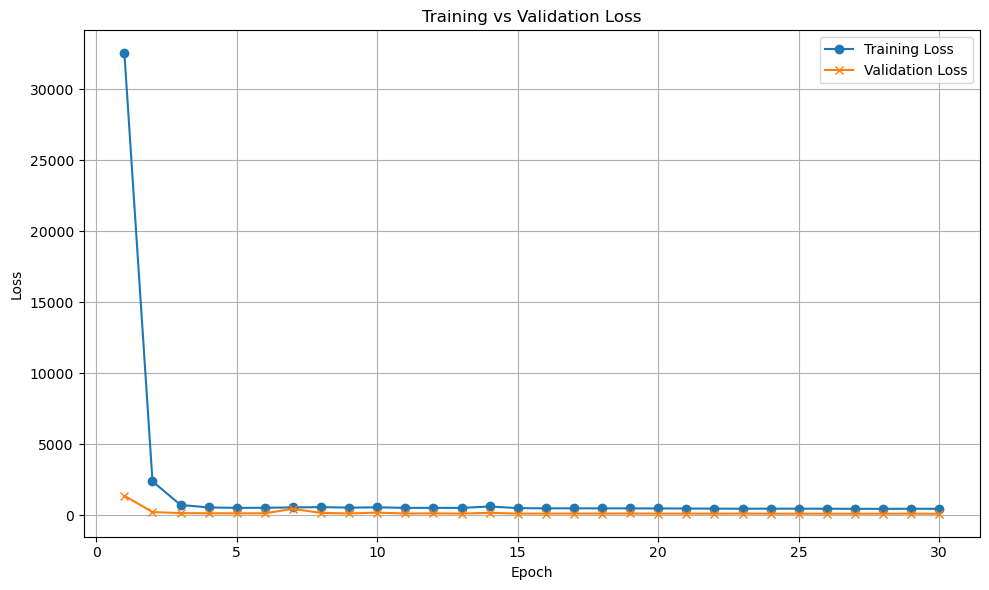

In [350]:
# Plot training and validation loss progress
# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–æ–≥—Ä–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(results_X3_ready['train_losses']) + 1), results_X3_ready['train_losses'], label='Training Loss', marker='o')
plt.plot(range(1, len(results_X3_ready['train_losses']) + 1), results_X3_ready['val_losses'], label='Validation Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### –ì—Ä–∞—Ñ–∏–∫ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ HotelRegressor: Training vs Validation Loss

#### –û–ø–∏—Å–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞:
- **–û—Å—å X** ‚Äî —ç–ø–æ—Ö–∏ –æ–±—É—á–µ–Ω–∏—è (–æ—Ç 0 –¥–æ 30).
- **–û—Å—å Y** ‚Äî –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å (Loss).
- **–°–∏–Ω—è—è –ª–∏–Ω–∏—è** ‚Äî –ø–æ—Ç–µ—Ä–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ.
- **–û—Ä–∞–Ω–∂–µ–≤–∞—è –ª–∏–Ω–∏—è** ‚Äî –ø–æ—Ç–µ—Ä–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.

#### –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
- –ù–∞ **—ç–ø–æ—Ö–µ 0** –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Ä–µ–∑–∫–∏–π —Å–∫–∞—á–æ–∫ –ø–æ—Ç–µ—Ä—å: `32532.65` ‚Äî —ç—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫ –ø–ª–æ—Ö–æ–π –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –∏–ª–∏ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
- –£–∂–µ –∫ **—ç–ø–æ—Ö–µ 1** –ø–æ—Ç–µ—Ä–∏ –ø–∞–¥–∞—é—Ç –¥–æ `2391.43`, –∑–∞—Ç–µ–º —Å—Ç–∞–±–∏–ª–∏–∑–∏—Ä—É—é—Ç—Å—è –Ω–∏–∂–µ `600`, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –±—ã—Å—Ç—Ä–æ–π –∞–¥–∞–ø—Ç–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏.
- **–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ –ø–æ—Ç–µ—Ä–∏** –æ—Å—Ç–∞—é—Ç—Å—è —Å—Ç–∞–±–∏–ª—å–Ω—ã–º–∏ –∏ –Ω–∏–∑–∫–∏–º–∏ ‚Äî –ø—Ä–∏–∑–Ω–∞–∫ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è.
- –ù–∞—á–∏–Ω–∞—è —Å **—ç–ø–æ—Ö–∏ 10**, –ø–æ—Ç–µ—Ä–∏ –∫–æ–ª–µ–±–ª—é—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ `450‚Äì550`, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —É—Å—Ç–æ–π—á–∏–≤–æ–µ –æ–±—É—á–µ–Ω–∏–µ.

#### –ó–Ω–∞—á–µ–Ω–∏—è –ø–æ—Ç–µ—Ä—å –ø–æ —ç–ø–æ—Ö–∞–º:
```python
train_losses = [
    32532.65, 2391.43, 725.87, 554.26, 519.88, 532.25, 551.64, 575.98, 538.39, 561.92,
    522.48, 522.60, 518.90, 619.34, 505.12, 487.88, 490.92, 488.41, 487.25, 481.82,
    476.32, 467.44, 464.87, 467.71, 465.84, 462.72, 455.69, 454.08, 460.15, 455.24
]


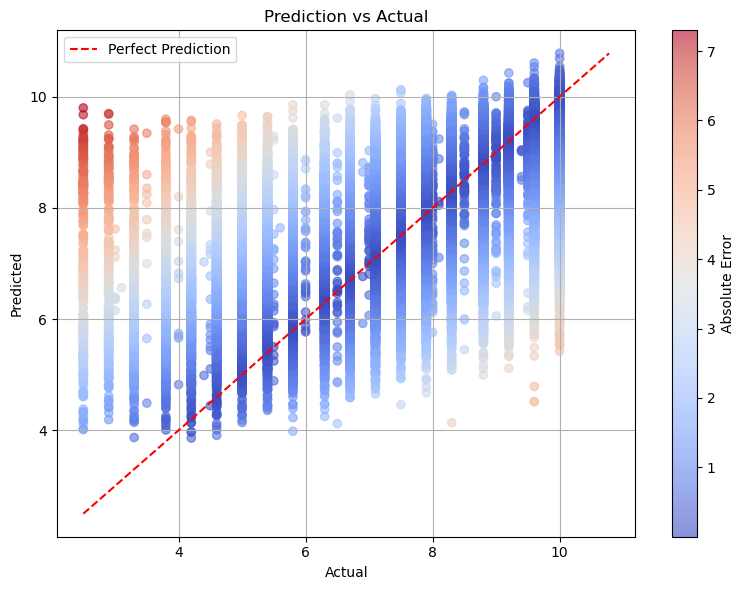

In [ ]:
# Visualization of predictions vs actual values
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∏ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π

# Calculate errors
errors = np.abs(results_X3_ready["y_pred_np"] - results_X3_ready["y_val_np"])

# Scatter plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(results_X3_ready["y_val_np"], results_X3_ready["y_pred_np"], c=errors, cmap='coolwarm', alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Prediction vs Actual")
plt.grid(True)

# Reference line for perfect prediction
min_val = min(results_X3_ready["y_val_np"].min(), results_X3_ready["y_pred_np"].min())
max_val = max(results_X3_ready["y_val_np"].max(), results_X3_ready["y_pred_np"].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
plt.legend()

plt.colorbar(label='Absolute Error')
plt.tight_layout()
plt.show()

### –ì—Ä–∞—Ñ–∏–∫ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏: Prediction vs Actual

#### –û–ø–∏—Å–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞:
- **–û—Å—å X** ‚Äî —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è (`y_true`).
- **–û—Å—å Y** ‚Äî –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è (`y_pred`).
- **–¶–≤–µ—Ç —Ç–æ—á–µ–∫** ‚Äî –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞: –æ—Ç —Å–∏–Ω–µ–≥–æ (–Ω–∏–∑–∫–∞—è –æ—à–∏–±–∫–∞) –¥–æ –∫—Ä–∞—Å–Ω–æ–≥–æ (–≤—ã—Å–æ–∫–∞—è –æ—à–∏–±–∫–∞).
- **–ö—Ä–∞—Å–Ω–∞—è –ø—É–Ω–∫—Ç–∏—Ä–Ω–∞—è –ª–∏–Ω–∏—è** ‚Äî –∏–¥–µ–∞–ª—å–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ (`y = x`), –≥–¥–µ –º–æ–¥–µ–ª—å –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å —Ä–µ–∞–ª—å–Ω–æ—Å—Ç—å—é.

#### –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
- –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Ç–æ—á–µ–∫ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã **–≤–±–ª–∏–∑–∏ –ª–∏–Ω–∏–∏ `y = x`**, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –≤—ã—Å–æ–∫–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏.
- **–°–∏–Ω–∏–µ —Ç–æ—á–∫–∏** ‚Äî –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π –æ—à–∏–±–∫–æ–π, –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–æ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è.
- **–ö—Ä–∞—Å–Ω—ã–µ —Ç–æ—á–∫–∏** ‚Äî —É—á–∞—Å—Ç–∫–∏ —Å –≤—ã—Å–æ–∫–æ–π –æ—à–∏–±–∫–æ–π, –≤–æ–∑–º–æ–∂–Ω—ã –≤—ã–±—Ä–æ—Å—ã –∏–ª–∏ –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–∞—è –æ–±—É—á–µ–Ω–Ω–æ—Å—Ç—å.
- –û—à–∏–±–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã **—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –ø–æ –¥–∏–∞–ø–∞–∑–æ–Ω—É –∑–Ω–∞—á–µ–Ω–∏–π**, –±–µ–∑ —è–≤–Ω–æ–≥–æ —Å–º–µ—â–µ–Ω–∏—è ‚Äî —ç—Ç–æ –ø—Ä–∏–∑–Ω–∞–∫ —Å—Ç–∞–±–∏–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏.

#### –í—ã–≤–æ–¥:
- –ú–æ–¥–µ–ª—å –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —Ö–æ—Ä–æ—à—É—é —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –º–µ–∂–¥—É –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏ –∏ —Ä–µ–∞–ª—å–Ω–æ—Å—Ç—å—é.


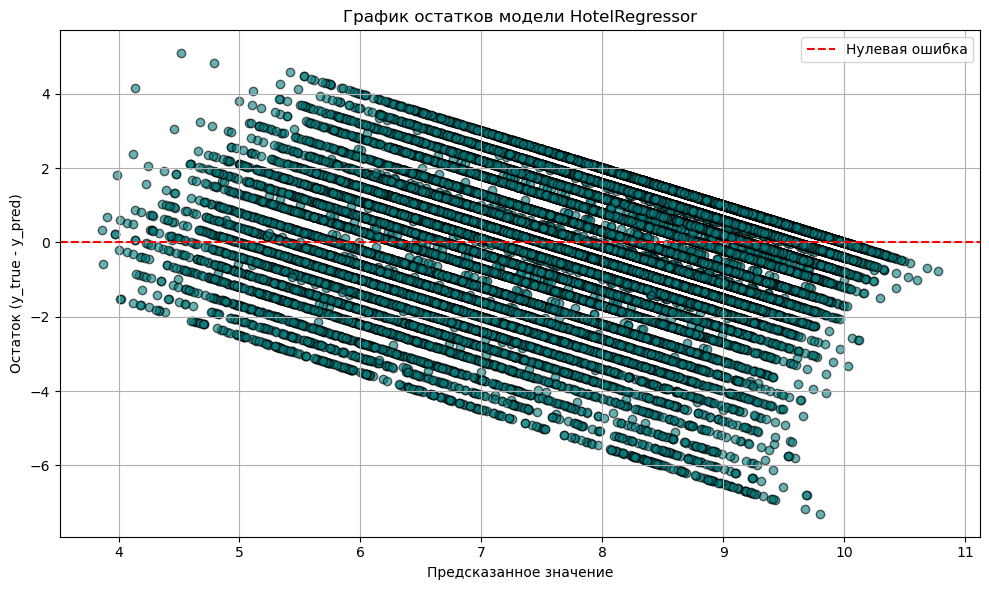

In [356]:


# –ò–∑–≤–ª–µ–∫–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
y_val = results_X3_ready["y_val_np"]       # –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
val_preds = results_X3_ready["y_pred_np"]  # –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏

# –í—ã—á–∏—Å–ª—è–µ–º –æ—Å—Ç–∞—Ç–∫–∏
residuals = y_val - val_preds

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫: –æ—Å—Ç–∞—Ç–∫–∏ vs –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
plt.figure(figsize=(10, 6))
plt.scatter(val_preds, residuals, alpha=0.6, c='teal', edgecolors='k')
plt.axhline(0, color='red', linestyle='--', label='–ù—É–ª–µ–≤–∞—è –æ—à–∏–±–∫–∞')
plt.xlabel("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ")
plt.ylabel("–û—Å—Ç–∞—Ç–æ–∫ (y_true - y_pred)")
plt.title("–ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤ –º–æ–¥–µ–ª–∏ HotelRegressor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤ –º–æ–¥–µ–ª–∏ HotelRegressor

#### –û–ø–∏—Å–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞:
- **–û—Å—å X** ‚Äî –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ (`y_pred`).
- **–û—Å—å Y** ‚Äî –æ—Å—Ç–∞—Ç–∫–∏ (`y_true - y_pred`), –æ—Ç—Ä–∞–∂–∞—é—â–∏–µ –æ—à–∏–±–∫—É –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.
- **–ö—Ä–∞—Å–Ω–∞—è –ø—É–Ω–∫—Ç–∏—Ä–Ω–∞—è –ª–∏–Ω–∏—è** ‚Äî –Ω—É–ª–µ–≤–∞—è –æ—à–∏–±–∫–∞: –∏–¥–µ–∞–ª—å–Ω–æ–µ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å —Ä–µ–∞–ª—å–Ω–æ—Å—Ç—å—é.

#### –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
- –¢–æ—á–∫–∏ **—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –≤–æ–∫—Ä—É–≥ –Ω—É–ª—è**, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ–± –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–∏ —Å–∏—Å—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –æ—à–∏–±–æ–∫.
- –ù–µ—Ç –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –∏–ª–∏ —Ç—Ä–µ–Ω–¥–∞ –≤ –æ—Å—Ç–∞—Ç–∫–∞—Ö ‚Äî –ø—Ä–∏–∑–Ω–∞–∫ —Ö–æ—Ä–æ—à–µ–π –æ–±–æ–±—â–∞—é—â–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏.
- –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ **–≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏** (—É–≤–µ–ª–∏—á–µ–Ω–∏—è —Ä–∞–∑–±—Ä–æ—Å–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ –ø—Ä–∏ —Ä–æ—Å—Ç–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π) –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.
- –í–æ–∑–º–æ–∂–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã (—Ç–æ—á–∫–∏ –¥–∞–ª–µ–∫–æ –æ—Ç –Ω—É–ª—è) —Ç—Ä–µ–±—É—é—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ ‚Äî –≤–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–æ —Ä–µ–¥–∫–∏–µ —Å–ª—É—á–∞–∏ –∏–ª–∏ —à—É–º –≤ –¥–∞–Ω–Ω—ã—Ö.

#### –í—ã–≤–æ–¥:
- –ú–æ–¥–µ–ª—å HotelRegressor –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —É—Å—Ç–æ–π—á–∏–≤–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ.
- –ì—Ä–∞—Ñ–∏–∫ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∞ –∏ –Ω–µ –∏–º–µ–µ—Ç —è–≤–Ω—ã—Ö —Å–º–µ—â–µ–Ω–∏–π.



## –ó–∞–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–∞—è —á–∞—Å—Ç—å –ø–æ—Å–≤—è—â–µ–Ω–∞ —Ä–µ—à–µ–Ω–∏—é –∑–∞–¥–∞—á—å –ø–æ –ø—Ä–æ–≥—Ä–∞–º–º–µ –ø—Ä–æ–µ–∫—Ç–∞

–ó–∞–¥–∞—á–∏ 4.2 - 4.6


In [ ]:
hotels = pd.read_csv('data/hotels.csv')
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [ ]:
# Task 4.2
hotels['hotel_name'].nunique()

1492

In [ ]:
# Task 4.3
hotels['review_date'] = pd.to_datetime(hotels['review_date'], errors='coerce')
hotels['review_date'].describe()

count                           386803
mean     2016-08-13 14:41:18.712936704
min                2015-08-04 00:00:00
25%                2016-02-23 00:00:00
50%                2016-08-15 00:00:00
75%                2017-02-09 00:00:00
max                2017-08-03 00:00:00
Name: review_date, dtype: object

In [ ]:
# Task 4.4
hotels['tags'].nunique()

47135

**–ß–∏—Å–ª–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ç—ç–≥–æ–≤**

–ü—Ä–∏–≤–µ–¥–µ–Ω–Ω–æ–µ –≤—ã—à–µ –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ —á–∏—Å–ª–æ —Ç—ç–≥–æ–≤ (47135) –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–≥–æ.

In [ ]:
# Task 4.5
hotels['tags'].mode()

0    [' Leisure trip ', ' Couple ', ' Double Room '...
Name: tags, dtype: object

In [ ]:
# Task 4.6

# Extract number of nights from 'tags' using regex
# –ò–∑–≤–ª–µ–∫–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–æ—á–µ–π –∏–∑ 'tags' —Å –ø–æ–º–æ—â—å—é —Ä–µ–≥—É–ª—è—Ä–Ω–æ–≥–æ –≤—ã—Ä–∞–∂–µ–Ω–∏—è
hotels['nights_stayed'] = hotels['tags'].str.extract(r'(\d+)\s+night')

# Drop missing values and convert to integer
# –£–¥–∞–ª—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –∏ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —Ü–µ–ª–æ–µ —á–∏—Å–ª–æ
hotels['nights_stayed'] = hotels['nights_stayed'].dropna().astype(int)

# Count frequency of each stay duration
# –ü–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º —á–∞—Å—Ç–æ—Ç—É –∫–∞–∂–¥–æ–π –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–µ–±—ã–≤–∞–Ω–∏—è
most_common_nights = hotels['nights_stayed'].value_counts().sort_index()

# Display the most frequent stay
# –í—ã–≤–æ–¥–∏–º –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–µ–±—ã–≤–∞–Ω–∏—è
print("Most frequent nights stayed:")
print(most_common_nights.head(10))
